In [38]:
import AbacusCosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import Counter
import scipy.ndimage as scpimg
import h5py
from matplotlib import cm

import glob

In [2]:
def find_watershed(divergence_filename):
    print("processing: {}".format(divergence_filename))
    f = h5py.File(divergence_filename, 'r')
    divergence_field = f['divergence'][...]
    f.close()
    
    sort_index = np.argsort(divergence_field.flatten(order='C'))
    watershed_group = np.ones(np.shape(divergence_field), dtype=int)*-1
    N_side = np.shape(divergence_field)[0]
    print("N_side={}".format(N_side))
    n_total = len(sort_index)

    n_group = 0
    n_cell = 0
    for l in range(len(sort_index)):
        n_cell += 1
        ijk = np.unravel_index(sort_index[l], np.shape(divergence_field), order='C')
        groups = []
        for i in [-1,0, 1]:
            for j in [-1,0, 1]:
                for k in [-1,0, 1]:
                    ijk_test = tuple((np.array(ijk)+(i, j, k))%N_side)
                    groups.append(watershed_group[ijk_test])
        c = Counter(groups)
    
        if -1 in c.keys():
            c.pop(-1)
        if len(c)==0:
            watershed_group[ijk] = n_group
            n_group += 1
        else:
            g = c.most_common(1)
            watershed_group[ijk] = g[0][0]
        
        if((n_cell%100000)==0):
            print("{:.2f} % of total. {} groups".format(100*n_cell/n_total,n_group))
    watershed_group.reshape((N_side, N_side, N_side))
    output_filename = divergence_filename.replace("velocity_", "watershed_")
    h5f = h5py.File(output_filename, 'w')
    h5f.create_dataset('watershed_group', data=watershed_group)
    h5f.close()
    print("Finished writing to {}".format(output_filename))
    return 

In [3]:
compute_all = True

if compute_all:
    div_files = glob.glob("C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion*/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5")
    print(div_files)
    for div_file in div_files:
        find_watershed(div_file)

['C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo\\Simulacion1\\fields\\velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5', 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo\\Simulacion2\\fields\\velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5', 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo\\Simulacion3\\fields\\velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5', 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo\\Simulacion4\\fields\\velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5']
processing: C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo\Simulacion1\fields\velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5
N_side=360
0.21 % of total. 369 groups
0.43 % of total. 563 groups
0.64 % of total. 714 group

52.73 % of total. 4981 groups
52.94 % of total. 4984 groups
53.16 % of total. 4988 groups
53.37 % of total. 4991 groups
53.58 % of total. 4993 groups
53.80 % of total. 4994 groups
54.01 % of total. 4996 groups
54.23 % of total. 4998 groups
54.44 % of total. 5001 groups
54.66 % of total. 5001 groups
54.87 % of total. 5006 groups
55.08 % of total. 5009 groups
55.30 % of total. 5012 groups
55.51 % of total. 5012 groups
55.73 % of total. 5013 groups
55.94 % of total. 5016 groups
56.16 % of total. 5017 groups
56.37 % of total. 5018 groups
56.58 % of total. 5019 groups
56.80 % of total. 5020 groups
57.01 % of total. 5020 groups
57.23 % of total. 5020 groups
57.44 % of total. 5021 groups
57.66 % of total. 5022 groups
57.87 % of total. 5022 groups
58.08 % of total. 5023 groups
58.30 % of total. 5024 groups
58.51 % of total. 5026 groups
58.73 % of total. 5027 groups
58.94 % of total. 5027 groups
59.16 % of total. 5029 groups
59.37 % of total. 5030 groups
59.59 % of total. 5031 groups
59.80 % of

9.00 % of total. 2852 groups
9.22 % of total. 2893 groups
9.43 % of total. 2927 groups
9.65 % of total. 2967 groups
9.86 % of total. 2990 groups
10.07 % of total. 3019 groups
10.29 % of total. 3054 groups
10.50 % of total. 3083 groups
10.72 % of total. 3110 groups
10.93 % of total. 3133 groups
11.15 % of total. 3152 groups
11.36 % of total. 3175 groups
11.57 % of total. 3205 groups
11.79 % of total. 3227 groups
12.00 % of total. 3250 groups
12.22 % of total. 3280 groups
12.43 % of total. 3309 groups
12.65 % of total. 3329 groups
12.86 % of total. 3354 groups
13.07 % of total. 3372 groups
13.29 % of total. 3391 groups
13.50 % of total. 3416 groups
13.72 % of total. 3439 groups
13.93 % of total. 3465 groups
14.15 % of total. 3483 groups
14.36 % of total. 3498 groups
14.57 % of total. 3511 groups
14.79 % of total. 3529 groups
15.00 % of total. 3542 groups
15.22 % of total. 3555 groups
15.43 % of total. 3569 groups
15.65 % of total. 3594 groups
15.86 % of total. 3616 groups
16.08 % of tota

67.73 % of total. 5095 groups
67.94 % of total. 5095 groups
68.16 % of total. 5096 groups
68.37 % of total. 5096 groups
68.59 % of total. 5096 groups
68.80 % of total. 5096 groups
69.02 % of total. 5096 groups
69.23 % of total. 5096 groups
69.44 % of total. 5096 groups
69.66 % of total. 5096 groups
69.87 % of total. 5096 groups
70.09 % of total. 5096 groups
70.30 % of total. 5096 groups
70.52 % of total. 5096 groups
70.73 % of total. 5096 groups
70.94 % of total. 5098 groups
71.16 % of total. 5098 groups
71.37 % of total. 5098 groups
71.59 % of total. 5098 groups
71.80 % of total. 5098 groups
72.02 % of total. 5098 groups
72.23 % of total. 5098 groups
72.45 % of total. 5098 groups
72.66 % of total. 5098 groups
72.87 % of total. 5098 groups
73.09 % of total. 5098 groups
73.30 % of total. 5098 groups
73.52 % of total. 5098 groups
73.73 % of total. 5098 groups
73.95 % of total. 5098 groups
74.16 % of total. 5098 groups
74.37 % of total. 5098 groups
74.59 % of total. 5098 groups
74.80 % of

24.01 % of total. 3998 groups
24.22 % of total. 4014 groups
24.43 % of total. 4019 groups
24.65 % of total. 4031 groups
24.86 % of total. 4039 groups
25.08 % of total. 4048 groups
25.29 % of total. 4061 groups
25.51 % of total. 4070 groups
25.72 % of total. 4079 groups
25.93 % of total. 4088 groups
26.15 % of total. 4098 groups
26.36 % of total. 4113 groups
26.58 % of total. 4119 groups
26.79 % of total. 4127 groups
27.01 % of total. 4138 groups
27.22 % of total. 4147 groups
27.43 % of total. 4157 groups
27.65 % of total. 4166 groups
27.86 % of total. 4171 groups
28.08 % of total. 4180 groups
28.29 % of total. 4191 groups
28.51 % of total. 4207 groups
28.72 % of total. 4214 groups
28.94 % of total. 4221 groups
29.15 % of total. 4229 groups
29.36 % of total. 4241 groups
29.58 % of total. 4261 groups
29.79 % of total. 4273 groups
30.01 % of total. 4280 groups
30.22 % of total. 4288 groups
30.44 % of total. 4298 groups
30.65 % of total. 4304 groups
30.86 % of total. 4310 groups
31.08 % of

82.73 % of total. 4932 groups
82.95 % of total. 4932 groups
83.16 % of total. 4932 groups
83.38 % of total. 4932 groups
83.59 % of total. 4932 groups
83.80 % of total. 4932 groups
84.02 % of total. 4932 groups
84.23 % of total. 4932 groups
84.45 % of total. 4932 groups
84.66 % of total. 4932 groups
84.88 % of total. 4932 groups
85.09 % of total. 4932 groups
85.31 % of total. 4932 groups
85.52 % of total. 4932 groups
85.73 % of total. 4932 groups
85.95 % of total. 4932 groups
86.16 % of total. 4932 groups
86.38 % of total. 4932 groups
86.59 % of total. 4932 groups
86.81 % of total. 4932 groups
87.02 % of total. 4932 groups
87.23 % of total. 4932 groups
87.45 % of total. 4932 groups
87.66 % of total. 4932 groups
87.88 % of total. 4932 groups
88.09 % of total. 4932 groups
88.31 % of total. 4932 groups
88.52 % of total. 4932 groups
88.73 % of total. 4932 groups
88.95 % of total. 4932 groups
89.16 % of total. 4932 groups
89.38 % of total. 4932 groups
89.59 % of total. 4932 groups
89.81 % of

39.01 % of total. 4718 groups
39.22 % of total. 4725 groups
39.44 % of total. 4729 groups
39.65 % of total. 4734 groups
39.87 % of total. 4742 groups
40.08 % of total. 4745 groups
40.29 % of total. 4755 groups
40.51 % of total. 4760 groups
40.72 % of total. 4765 groups
40.94 % of total. 4775 groups
41.15 % of total. 4780 groups
41.37 % of total. 4788 groups
41.58 % of total. 4793 groups
41.80 % of total. 4797 groups
42.01 % of total. 4799 groups
42.22 % of total. 4801 groups
42.44 % of total. 4805 groups
42.65 % of total. 4810 groups
42.87 % of total. 4817 groups
43.08 % of total. 4822 groups
43.30 % of total. 4827 groups
43.51 % of total. 4830 groups
43.72 % of total. 4835 groups
43.94 % of total. 4841 groups
44.15 % of total. 4844 groups
44.37 % of total. 4848 groups
44.58 % of total. 4850 groups
44.80 % of total. 4853 groups
45.01 % of total. 4857 groups
45.22 % of total. 4859 groups
45.44 % of total. 4861 groups
45.65 % of total. 4864 groups
45.87 % of total. 4867 groups
46.08 % of

97.74 % of total. 5012 groups
97.95 % of total. 5012 groups
98.17 % of total. 5012 groups
98.38 % of total. 5012 groups
98.59 % of total. 5012 groups
98.81 % of total. 5012 groups
99.02 % of total. 5012 groups
99.24 % of total. 5012 groups
99.45 % of total. 5012 groups
99.67 % of total. 5012 groups
99.88 % of total. 5012 groups
Finished writing to C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo\Simulacion4\fields\watershed_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5


In [2]:
archivos = range(5)
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion{}/fields/watershed_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5'

grupos = []

aleatorio = np.random.randint(0,360)
for i in archivos:
    with h5py.File(filename.format(i), 'r') as f:
        print(f.keys())
        watershed_groups_key = list(f.keys())[0]
        watershed_groups = np.array(f[watershed_groups_key])
        
    grupos.append(watershed_groups)
    

<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>


In [3]:
volumen = 8
ordenes = []
for i in grupos:
    ordenes.append(len(list(set(i.flatten()))))


volumenes = []
for orden in range(len(ordenes)):
    volumen_actual = []
    for i in range(ordenes[orden]):
        if(i%100==0):
            print(i)
        volumen_actual.append(len(grupos[orden][grupos[orden]==i])*volumen)
    volumenes.append(volumen_actual)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0
100
200
300
400
500
600
700
800
900


In [4]:
import AbacusCosmos.Halos as ach
from astropy.table import Table
from collections import Counter
import scipy.ndimage as scpimg
masa_particula = 1.E10

In [5]:
path = "C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion{}"
N = []
pos_x = []
pos_y = []
pos_z = []
for i in archivos:
    halo_data = ach.read_halos_FoF(path.format(i))
    N.append(halo_data['N'])
    posiciones = halo_data['pos']
    pos_x.append(posiciones[:,0])
    pos_y.append(posiciones[:,1])
    pos_z.append(posiciones[:,2])

C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion0\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion1\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion2\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion3\halos_\d+$
C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/Simulacion4\halos_\d+$


In [6]:
masas_simulaciones = []
for arch in archivos:
    masas_original = np.zeros((360,360,360))
    pos_x_mod = (pos_x[arch]*0.4999+180)//1
    pos_y_mod = (pos_y[arch]*0.4999+180)//1
    pos_z_mod = (pos_z[arch]*0.4999+180)//1
    pos_mod = np.array([pos_x_mod,pos_y_mod,pos_z_mod]).T
    
    for i in range(len(pos_mod)):
        if(i%100==0):
            print(i)
        masas_original[int(pos_mod[i][0]),int(pos_mod[i][1]),int(pos_mod[i][2])] += N[arch][i]
    masas = []
    for i in range(ordenes[arch]):
        if(i%100==0):
            print(i)
        ubicaciones= np.array(np.where(grupos[arch] == i)).T
        masa_grupo = []
        for j in ubicaciones:
            masa_grupo.append(masas_original[j[0],j[1],j[2]])
        masas.append(np.sum(masa_grupo))
    masas2 = np.array([int(x) for x in masas])
    masas_simulaciones.append(masas2)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200
147300
147400
147500
147600
147700
147800
147900
148000
148100
148200
148300
148400
148500
148600
148700
148800
148900
149000
149100
149200
149300
149400
149500
149600
149700
149800
149900
150000
150100
150200
150300
150400
150500
150600
150700
150800
150900
151000
151100
151200
151300
151400
151500
151600
151700
151800
151900
152000
152100
152200
152300
152400

256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300
264400
264500
264600
264700
264800
264900
265000
265100
265200
265300
265400
265500
265600
265700
265800
265900
266000
266100
266200
266300
266400
266500
266600
266700
266800
266900
267000
267100
267200
267300
267400
267500
267600
267700
267800
267900
268000
268100
268200
268300
268400
268500
268600
268700
268800
268900
269000
269100
269200
269300
269400
269500
269600
269700
269800
269900
270000
270100
270200
270300
270400
270500
270600
270700
270800
270900

386500
386600
386700
386800
386900
387000
387100
387200
387300
387400
387500
387600
387700
387800
387900
388000
388100
388200
388300
388400
388500
388600
388700
388800
388900
389000
389100
389200
389300
389400
389500
389600
389700
389800
389900
390000
390100
390200
390300
390400
390500
390600
390700
390800
390900
391000
391100
391200
391300
391400
391500
391600
391700
391800
391900
392000
392100
392200
392300
392400
392500
392600
392700
392800
392900
393000
393100
393200
393300
393400
393500
393600
393700
393800
393900
394000
394100
394200
394300
394400
394500
394600
394700
394800
394900
395000
395100
395200
395300
395400
395500
395600
395700
395800
395900
396000
396100
396200
396300
396400
396500
396600
396700
396800
396900
397000
397100
397200
397300
397400
397500
397600
397700
397800
397900
398000
398100
398200
398300
398400
398500
398600
398700
398800
398900
399000
399100
399200
399300
399400
399500
399600
399700
399800
399900
400000
400100
400200
400300
400400
400500
400600
400700

506500
506600
506700
506800
506900
507000
507100
507200
507300
507400
507500
507600
507700
507800
507900
508000
508100
508200
508300
508400
508500
508600
508700
508800
508900
509000
509100
509200
509300
509400
509500
509600
509700
509800
509900
510000
510100
510200
510300
510400
510500
510600
510700
510800
510900
511000
511100
511200
511300
511400
511500
511600
511700
511800
511900
512000
512100
512200
512300
512400
512500
512600
512700
512800
512900
513000
513100
513200
513300
513400
513500
513600
513700
513800
513900
514000
514100
514200
514300
514400
514500
514600
514700
514800
514900
515000
515100
515200
515300
515400
515500
515600
515700
515800
515900
516000
516100
516200
516300
516400
516500
516600
516700
516800
516900
517000
517100
517200
517300
517400
517500
517600
517700
517800
517900
518000
518100
518200
518300
518400
518500
518600
518700
518800
518900
519000
519100
519200
519300
519400
519500
519600
519700
519800
519900
520000
520100
520200
520300
520400
520500
520600
520700

651200
651300
651400
651500
651600
651700
651800
651900
652000
652100
652200
652300
652400
652500
652600
652700
652800
652900
653000
653100
653200
653300
653400
653500
653600
653700
653800
653900
654000
654100
654200
654300
654400
654500
654600
654700
654800
654900
655000
655100
655200
655300
655400
655500
655600
655700
655800
655900
656000
656100
656200
656300
656400
656500
656600
656700
656800
656900
657000
657100
657200
657300
657400
657500
657600
657700
657800
657900
658000
658100
658200
658300
658400
658500
658600
658700
658800
658900
659000
659100
659200
659300
659400
659500
659600
659700
659800
659900
660000
660100
660200
660300
660400
660500
660600
660700
660800
660900
661000
661100
661200
661300
661400
661500
661600
661700
661800
661900
662000
662100
662200
662300
662400
662500
662600
662700
662800
662900
663000
663100
663200
663300
663400
663500
663600
663700
663800
663900
664000
664100
664200
664300
664400
664500
664600
664700
664800
664900
665000
665100
665200
665300
665400

854500
854600
854700
854800
854900
855000
855100
855200
855300
855400
855500
855600
855700
855800
855900
856000
856100
856200
856300
856400
856500
856600
856700
856800
856900
857000
857100
857200
857300
857400
857500
857600
857700
857800
857900
858000
858100
858200
858300
858400
858500
858600
858700
858800
858900
859000
859100
859200
859300
859400
859500
859600
859700
859800
859900
860000
860100
860200
860300
860400
860500
860600
860700
860800
860900
861000
861100
861200
861300
861400
861500
861600
861700
861800
861900
862000
862100
862200
862300
862400
862500
862600
862700
862800
862900
863000
863100
863200
863300
863400
863500
863600
863700
863800
863900
864000
864100
864200
864300
864400
864500
864600
864700
864800
864900
865000
865100
865200
865300
865400
865500
865600
865700
865800
865900
866000
866100
866200
866300
866400
866500
866600
866700
866800
866900
867000
867100
867200
867300
867400
867500
867600
867700
867800
867900
868000
868100
868200
868300
868400
868500
868600
868700

1032600
1032700
1032800
1032900
1033000
1033100
1033200
1033300
1033400
1033500
1033600
1033700
1033800
1033900
1034000
1034100
1034200
1034300
1034400
1034500
1034600
1034700
1034800
1034900
1035000
1035100
1035200
1035300
1035400
1035500
1035600
1035700
1035800
1035900
1036000
1036100
1036200
1036300
1036400
1036500
1036600
1036700
1036800
1036900
1037000
1037100
1037200
1037300
1037400
1037500
1037600
1037700
1037800
1037900
1038000
1038100
1038200
1038300
1038400
1038500
1038600
1038700
1038800
1038900
1039000
1039100
1039200
1039300
1039400
1039500
1039600
1039700
1039800
1039900
1040000
1040100
1040200
1040300
1040400
1040500
1040600
1040700
1040800
1040900
1041000
1041100
1041200
1041300
1041400
1041500
1041600
1041700
1041800
1041900
1042000
1042100
1042200
1042300
1042400
1042500
1042600
1042700
1042800
1042900
1043000
1043100
1043200
1043300
1043400
1043500
1043600
1043700
1043800
1043900
1044000
1044100
1044200
1044300
1044400
1044500
1044600
1044700
1044800
1044900
1045000


1138700
1138800
1138900
1139000
1139100
1139200
1139300
1139400
1139500
1139600
1139700
1139800
1139900
1140000
1140100
1140200
1140300
1140400
1140500
1140600
1140700
1140800
1140900
1141000
1141100
1141200
1141300
1141400
1141500
1141600
1141700
1141800
1141900
1142000
1142100
1142200
1142300
1142400
1142500
1142600
1142700
1142800
1142900
1143000
1143100
1143200
1143300
1143400
1143500
1143600
1143700
1143800
1143900
1144000
1144100
1144200
1144300
1144400
1144500
1144600
1144700
1144800
1144900
1145000
1145100
1145200
1145300
1145400
1145500
1145600
1145700
1145800
1145900
1146000
1146100
1146200
1146300
1146400
1146500
1146600
1146700
1146800
1146900
1147000
1147100
1147200
1147300
1147400
1147500
1147600
1147700
1147800
1147900
1148000
1148100
1148200
1148300
1148400
1148500
1148600
1148700
1148800
1148900
1149000
1149100
1149200
1149300
1149400
1149500
1149600
1149700
1149800
1149900
1150000
1150100
1150200
1150300
1150400
1150500
1150600
1150700
1150800
1150900
1151000
1151100


1255900
1256000
1256100
1256200
1256300
1256400
1256500
1256600
1256700
1256800
1256900
1257000
1257100
1257200
1257300
1257400
1257500
1257600
1257700
1257800
1257900
1258000
1258100
1258200
1258300
1258400
1258500
1258600
1258700
1258800
1258900
1259000
1259100
1259200
1259300
1259400
1259500
1259600
1259700
1259800
1259900
1260000
1260100
1260200
1260300
1260400
1260500
1260600
1260700
1260800
1260900
1261000
1261100
1261200
1261300
1261400
1261500
1261600
1261700
1261800
1261900
1262000
1262100
1262200
1262300
1262400
1262500
1262600
1262700
1262800
1262900
1263000
1263100
1263200
1263300
1263400
1263500
1263600
1263700
1263800
1263900
1264000
1264100
1264200
1264300
1264400
1264500
1264600
1264700
1264800
1264900
1265000
1265100
1265200
1265300
1265400
1265500
1265600
1265700
1265800
1265900
1266000
1266100
1266200
1266300
1266400
1266500
1266600
1266700
1266800
1266900
1267000
1267100
1267200
1267300
1267400
1267500
1267600
1267700
1267800
1267900
1268000
1268100
1268200
1268300


1405800
1405900
1406000
1406100
1406200
1406300
1406400
1406500
1406600
1406700
1406800
1406900
1407000
1407100
1407200
1407300
1407400
1407500
1407600
1407700
1407800
1407900
1408000
1408100
1408200
1408300
1408400
1408500
1408600
1408700
1408800
1408900
1409000
1409100
1409200
1409300
1409400
1409500
1409600
1409700
1409800
1409900
1410000
1410100
1410200
1410300
1410400
1410500
1410600
1410700
1410800
1410900
1411000
1411100
1411200
1411300
1411400
1411500
1411600
1411700
1411800
1411900
1412000
1412100
1412200
1412300
1412400
1412500
1412600
1412700
1412800
1412900
1413000
1413100
1413200
1413300
1413400
1413500
1413600
1413700
1413800
1413900
1414000
1414100
1414200
1414300
1414400
1414500
1414600
1414700
1414800
1414900
1415000
1415100
1415200
1415300
1415400
1415500
1415600
1415700
1415800
1415900
1416000
1416100
1416200
1416300
1416400
1416500
1416600
1416700
1416800
1416900
1417000
1417100
1417200
1417300
1417400
1417500
1417600
1417700
1417800
1417900
1418000
1418100
1418200


1517700
1517800
1517900
1518000
1518100
1518200
1518300
1518400
1518500
1518600
1518700
1518800
1518900
1519000
1519100
1519200
1519300
1519400
1519500
1519600
1519700
1519800
1519900
1520000
1520100
1520200
1520300
1520400
1520500
1520600
1520700
1520800
1520900
1521000
1521100
1521200
1521300
1521400
1521500
1521600
1521700
1521800
1521900
1522000
1522100
1522200
1522300
1522400
1522500
1522600
1522700
1522800
1522900
1523000
1523100
1523200
1523300
1523400
1523500
1523600
1523700
1523800
1523900
1524000
1524100
1524200
1524300
1524400
1524500
1524600
1524700
1524800
1524900
1525000
1525100
1525200
1525300
1525400
1525500
1525600
1525700
1525800
1525900
1526000
1526100
1526200
1526300
1526400
1526500
1526600
1526700
1526800
1526900
1527000
1527100
1527200
1527300
1527400
1527500
1527600
1527700
1527800
1527900
1528000
1528100
1528200
1528300
1528400
1528500
1528600
1528700
1528800
1528900
1529000
1529100
1529200
1529300
1529400
1529500
1529600
1529700
1529800
1529900
1530000
1530100


1648600
1648700
1648800
1648900
1649000
1649100
1649200
1649300
1649400
1649500
1649600
1649700
1649800
1649900
1650000
1650100
1650200
1650300
1650400
1650500
1650600
1650700
1650800
1650900
1651000
1651100
1651200
1651300
1651400
1651500
1651600
1651700
1651800
1651900
1652000
1652100
1652200
1652300
1652400
1652500
1652600
1652700
1652800
1652900
1653000
1653100
1653200
1653300
1653400
1653500
1653600
1653700
1653800
1653900
1654000
1654100
1654200
1654300
1654400
1654500
1654600
1654700
1654800
1654900
1655000
1655100
1655200
1655300
1655400
1655500
1655600
1655700
1655800
1655900
1656000
1656100
1656200
1656300
1656400
1656500
1656600
1656700
1656800
1656900
1657000
1657100
1657200
1657300
1657400
1657500
1657600
1657700
1657800
1657900
1658000
1658100
1658200
1658300
1658400
1658500
1658600
1658700
1658800
1658900
1659000
1659100
1659200
1659300
1659400
1659500
1659600
1659700
1659800
1659900
1660000
1660100
1660200
1660300
1660400
1660500
1660600
1660700
1660800
1660900
1661000


1755500
1755600
1755700
1755800
1755900
1756000
1756100
1756200
1756300
1756400
1756500
1756600
1756700
1756800
1756900
1757000
1757100
1757200
1757300
1757400
1757500
1757600
1757700
1757800
1757900
1758000
1758100
1758200
1758300
1758400
1758500
1758600
1758700
1758800
1758900
1759000
1759100
1759200
1759300
1759400
1759500
1759600
1759700
1759800
1759900
1760000
1760100
1760200
1760300
1760400
1760500
1760600
1760700
1760800
1760900
1761000
1761100
1761200
1761300
1761400
1761500
1761600
1761700
1761800
1761900
1762000
1762100
1762200
1762300
1762400
1762500
1762600
1762700
1762800
1762900
1763000
1763100
1763200
1763300
1763400
1763500
1763600
1763700
1763800
1763900
1764000
1764100
1764200
1764300
1764400
1764500
1764600
1764700
1764800
1764900
1765000
1765100
1765200
1765300
1765400
1765500
1765600
1765700
1765800
1765900
1766000
1766100
1766200
1766300
1766400
1766500
1766600
1766700
1766800
1766900
1767000
1767100
1767200
1767300
1767400
1767500
1767600
1767700
1767800
1767900


1881800
1881900
1882000
1882100
1882200
1882300
1882400
1882500
1882600
1882700
1882800
1882900
1883000
1883100
1883200
1883300
1883400
1883500
1883600
1883700
1883800
1883900
1884000
1884100
1884200
1884300
1884400
1884500
1884600
1884700
1884800
1884900
1885000
1885100
1885200
1885300
1885400
1885500
1885600
1885700
1885800
1885900
1886000
1886100
1886200
1886300
1886400
1886500
1886600
1886700
1886800
1886900
1887000
1887100
1887200
1887300
1887400
1887500
1887600
1887700
1887800
1887900
1888000
1888100
1888200
1888300
1888400
1888500
1888600
1888700
1888800
1888900
1889000
1889100
1889200
1889300
1889400
1889500
1889600
1889700
1889800
1889900
1890000
1890100
1890200
1890300
1890400
1890500
1890600
1890700
1890800
1890900
1891000
1891100
1891200
1891300
1891400
1891500
1891600
1891700
1891800
1891900
1892000
1892100
1892200
1892300
1892400
1892500
1892600
1892700
1892800
1892900
1893000
1893100
1893200
1893300
1893400
1893500
1893600
1893700
1893800
1893900
1894000
1894100
1894200


2052300
2052400
2052500
2052600
2052700
2052800
2052900
2053000
2053100
2053200
2053300
2053400
2053500
2053600
2053700
2053800
2053900
2054000
2054100
2054200
2054300
2054400
2054500
2054600
2054700
2054800
2054900
2055000
2055100
2055200
2055300
2055400
2055500
2055600
2055700
2055800
2055900
2056000
2056100
2056200
2056300
2056400
2056500
2056600
2056700
2056800
2056900
2057000
2057100
2057200
2057300
2057400
2057500
2057600
2057700
2057800
2057900
2058000
2058100
2058200
2058300
2058400
2058500
2058600
2058700
2058800
2058900
2059000
2059100
2059200
2059300
2059400
2059500
2059600
2059700
2059800
2059900
2060000
2060100
2060200
2060300
2060400
2060500
2060600
2060700
2060800
2060900
2061000
2061100
2061200
2061300
2061400
2061500
2061600
2061700
2061800
2061900
2062000
2062100
2062200
2062300
2062400
2062500
2062600
2062700
2062800
2062900
2063000
2063100
2063200
2063300
2063400
2063500
2063600
2063700
2063800
2063900
2064000
2064100
2064200
2064300
2064400
2064500
2064600
2064700


2165300
2165400
2165500
2165600
2165700
2165800
2165900
2166000
2166100
2166200
2166300
2166400
2166500
2166600
2166700
2166800
2166900
2167000
2167100
2167200
2167300
2167400
2167500
2167600
2167700
2167800
2167900
2168000
2168100
2168200
2168300
2168400
2168500
2168600
2168700
2168800
2168900
2169000
2169100
2169200
2169300
2169400
2169500
2169600
2169700
2169800
2169900
2170000
2170100
2170200
2170300
2170400
2170500
2170600
2170700
2170800
2170900
2171000
2171100
2171200
2171300
2171400
2171500
2171600
2171700
2171800
2171900
2172000
2172100
2172200
2172300
2172400
2172500
2172600
2172700
2172800
2172900
2173000
2173100
2173200
2173300
2173400
2173500
2173600
2173700
2173800
2173900
2174000
2174100
2174200
2174300
2174400
2174500
2174600
2174700
2174800
2174900
2175000
2175100
2175200
2175300
2175400
2175500
2175600
2175700
2175800
2175900
2176000
2176100
2176200
2176300
2176400
2176500
2176600
2176700
2176800
2176900
2177000
2177100
2177200
2177300
2177400
2177500
2177600
2177700


2299300
2299400
2299500
2299600
2299700
2299800
2299900
2300000
2300100
2300200
2300300
2300400
2300500
2300600
2300700
2300800
2300900
2301000
2301100
2301200
2301300
2301400
2301500
2301600
2301700
2301800
2301900
2302000
2302100
2302200
2302300
2302400
2302500
2302600
2302700
2302800
2302900
2303000
2303100
2303200
2303300
2303400
2303500
2303600
2303700
2303800
2303900
2304000
2304100
2304200
2304300
2304400
2304500
2304600
2304700
2304800
2304900
2305000
2305100
2305200
2305300
2305400
2305500
2305600
2305700
2305800
2305900
2306000
2306100
2306200
2306300
2306400
2306500
2306600
2306700
2306800
2306900
2307000
2307100
2307200
2307300
2307400
2307500
2307600
2307700
2307800
2307900
2308000
2308100
2308200
2308300
2308400
2308500
2308600
2308700
2308800
2308900
2309000
2309100
2309200
2309300
2309400
2309500
2309600
2309700
2309800
2309900
2310000
2310100
2310200
2310300
2310400
2310500
2310600
2310700
2310800
2310900
2311000
2311100
2311200
2311300
2311400
2311500
2311600
2311700


2404100
2404200
2404300
2404400
2404500
2404600
2404700
2404800
2404900
2405000
2405100
2405200
2405300
2405400
2405500
2405600
2405700
2405800
2405900
2406000
2406100
2406200
2406300
2406400
2406500
2406600
2406700
2406800
2406900
2407000
2407100
2407200
2407300
2407400
2407500
2407600
2407700
2407800
2407900
2408000
2408100
2408200
2408300
2408400
2408500
2408600
2408700
2408800
2408900
2409000
2409100
2409200
2409300
2409400
2409500
2409600
2409700
2409800
2409900
2410000
2410100
2410200
2410300
2410400
2410500
2410600
2410700
2410800
2410900
2411000
2411100
2411200
2411300
2411400
2411500
2411600
2411700
2411800
2411900
2412000
2412100
2412200
2412300
2412400
2412500
2412600
2412700
2412800
2412900
2413000
2413100
2413200
2413300
2413400
2413500
2413600
2413700
2413800
2413900
2414000
2414100
2414200
2414300
2414400
2414500
2414600
2414700
2414800
2414900
2415000
2415100
2415200
2415300
2415400
2415500
2415600
2415700
2415800
2415900
2416000
2416100
2416200
2416300
2416400
2416500


2568500
2568600
2568700
2568800
2568900
2569000
2569100
2569200
2569300
2569400
2569500
2569600
2569700
2569800
2569900
2570000
2570100
2570200
2570300
2570400
2570500
2570600
2570700
2570800
2570900
2571000
2571100
2571200
2571300
2571400
2571500
2571600
2571700
2571800
2571900
2572000
2572100
2572200
2572300
2572400
2572500
2572600
2572700
2572800
2572900
2573000
2573100
2573200
2573300
2573400
2573500
2573600
2573700
2573800
2573900
2574000
2574100
2574200
2574300
2574400
2574500
2574600
2574700
2574800
2574900
2575000
2575100
2575200
2575300
2575400
2575500
2575600
2575700
2575800
2575900
2576000
2576100
2576200
2576300
2576400
2576500
2576600
2576700
2576800
2576900
2577000
2577100
2577200
2577300
2577400
2577500
2577600
2577700
2577800
2577900
2578000
2578100
2578200
2578300
2578400
2578500
2578600
2578700
2578800
2578900
2579000
2579100
2579200
2579300
2579400
2579500
2579600
2579700
2579800
2579900
2580000
2580100
2580200
2580300
2580400
2580500
2580600
2580700
2580800
2580900


2704700
2704800
2704900
2705000
2705100
2705200
2705300
2705400
2705500
2705600
2705700
2705800
2705900
2706000
2706100
2706200
2706300
2706400
2706500
2706600
2706700
2706800
2706900
2707000
2707100
2707200
2707300
2707400
2707500
2707600
2707700
2707800
2707900
2708000
2708100
2708200
2708300
2708400
2708500
2708600
2708700
2708800
2708900
2709000
2709100
2709200
2709300
2709400
2709500
2709600
2709700
2709800
2709900
2710000
2710100
2710200
2710300
2710400
2710500
2710600
2710700
2710800
2710900
2711000
2711100
2711200
2711300
2711400
2711500
2711600
2711700
2711800
2711900
2712000
2712100
2712200
2712300
2712400
2712500
2712600
2712700
2712800
2712900
2713000
2713100
2713200
2713300
2713400
2713500
2713600
2713700
2713800
2713900
2714000
2714100
2714200
2714300
2714400
2714500
2714600
2714700
2714800
2714900
2715000
2715100
2715200
2715300
2715400
2715500
2715600
2715700
2715800
2715900
2716000
2716100
2716200
2716300
2716400
2716500
2716600
2716700
2716800
2716900
2717000
2717100


2854600
2854700
2854800
2854900
2855000
2855100
2855200
2855300
2855400
2855500
2855600
2855700
2855800
2855900
2856000
2856100
2856200
2856300
2856400
2856500
2856600
2856700
2856800
2856900
2857000
2857100
2857200
2857300
2857400
2857500
2857600
2857700
2857800
2857900
2858000
2858100
2858200
2858300
2858400
2858500
2858600
2858700
2858800
2858900
2859000
2859100
2859200
2859300
2859400
2859500
2859600
2859700
2859800
2859900
2860000
2860100
2860200
2860300
2860400
2860500
2860600
2860700
2860800
2860900
2861000
2861100
2861200
2861300
2861400
2861500
2861600
2861700
2861800
2861900
2862000
2862100
2862200
2862300
2862400
2862500
2862600
2862700
2862800
2862900
2863000
2863100
2863200
2863300
2863400
2863500
2863600
2863700
2863800
2863900
2864000
2864100
2864200
2864300
2864400
2864500
2864600
2864700
2864800
2864900
2865000
2865100
2865200
2865300
2865400
2865500
2865600
2865700
2865800
2865900
2866000
2866100
2866200
2866300
2866400
2866500
2866600
2866700
2866800
2866900
2867000


3021800
3021900
3022000
3022100
3022200
3022300
3022400
3022500
3022600
3022700
3022800
3022900
3023000
3023100
3023200
3023300
3023400
3023500
3023600
3023700
3023800
3023900
3024000
3024100
3024200
3024300
3024400
3024500
3024600
3024700
3024800
3024900
3025000
3025100
3025200
3025300
3025400
3025500
3025600
3025700
3025800
3025900
3026000
3026100
3026200
3026300
3026400
3026500
3026600
3026700
3026800
3026900
3027000
3027100
3027200
3027300
3027400
3027500
3027600
3027700
3027800
3027900
3028000
3028100
3028200
3028300
3028400
3028500
3028600
3028700
3028800
3028900
3029000
3029100
3029200
3029300
3029400
3029500
3029600
3029700
3029800
3029900
3030000
3030100
3030200
3030300
3030400
3030500
3030600
3030700
3030800
3030900
3031000
3031100
3031200
3031300
3031400
3031500
3031600
3031700
3031800
3031900
3032000
3032100
3032200
3032300
3032400
3032500
3032600
3032700
3032800
3032900
3033000
3033100
3033200
3033300
3033400
3033500
3033600
3033700
3033800
3033900
3034000
3034100
3034200


3141000
3141100
3141200
3141300
3141400
3141500
3141600
3141700
3141800
3141900
3142000
3142100
3142200
3142300
3142400
3142500
3142600
3142700
3142800
3142900
3143000
3143100
3143200
3143300
3143400
3143500
3143600
3143700
3143800
3143900
3144000
3144100
3144200
3144300
3144400
3144500
3144600
3144700
3144800
3144900
3145000
3145100
3145200
3145300
3145400
3145500
3145600
3145700
3145800
3145900
3146000
3146100
3146200
3146300
3146400
3146500
3146600
3146700
3146800
3146900
3147000
3147100
3147200
3147300
3147400
3147500
3147600
3147700
3147800
3147900
3148000
3148100
3148200
3148300
3148400
3148500
3148600
3148700
3148800
3148900
3149000
3149100
3149200
3149300
3149400
3149500
3149600
3149700
3149800
3149900
3150000
3150100
3150200
3150300
3150400
3150500
3150600
3150700
3150800
3150900
3151000
3151100
3151200
3151300
3151400
3151500
3151600
3151700
3151800
3151900
3152000
3152100
3152200
3152300
3152400
3152500
3152600
3152700
3152800
3152900
3153000
3153100
3153200
3153300
3153400


3254200
3254300
3254400
3254500
3254600
3254700
3254800
3254900
3255000
3255100
3255200
3255300
3255400
3255500
3255600
3255700
3255800
3255900
3256000
3256100
3256200
3256300
3256400
3256500
3256600
3256700
3256800
3256900
3257000
3257100
3257200
3257300
3257400
3257500
3257600
3257700
3257800
3257900
3258000
3258100
3258200
3258300
3258400
3258500
3258600
3258700
3258800
3258900
3259000
3259100
3259200
3259300
3259400
3259500
3259600
3259700
3259800
3259900
3260000
3260100
3260200
3260300
3260400
3260500
3260600
3260700
3260800
3260900
3261000
3261100
3261200
3261300
3261400
3261500
3261600
3261700
3261800
3261900
3262000
3262100
3262200
3262300
3262400
3262500
3262600
3262700
3262800
3262900
3263000
3263100
3263200
3263300
3263400
3263500
3263600
3263700
3263800
3263900
3264000
3264100
3264200
3264300
3264400
3264500
3264600
3264700
3264800
3264900
3265000
3265100
3265200
3265300
3265400
3265500
3265600
3265700
3265800
3265900
3266000
3266100
3266200
3266300
3266400
3266500
3266600


3381900
3382000
3382100
3382200
3382300
3382400
3382500
3382600
3382700
3382800
3382900
3383000
3383100
3383200
3383300
3383400
3383500
3383600
3383700
3383800
3383900
3384000
3384100
3384200
3384300
3384400
3384500
3384600
3384700
3384800
3384900
3385000
3385100
3385200
3385300
3385400
3385500
3385600
3385700
3385800
3385900
3386000
3386100
3386200
3386300
3386400
3386500
3386600
3386700
3386800
3386900
3387000
3387100
3387200
3387300
3387400
3387500
3387600
3387700
3387800
3387900
3388000
3388100
3388200
3388300
3388400
3388500
3388600
3388700
3388800
3388900
3389000
3389100
3389200
3389300
3389400
3389500
3389600
3389700
3389800
3389900
3390000
3390100
3390200
3390300
3390400
3390500
3390600
3390700
3390800
3390900
3391000
3391100
3391200
3391300
3391400
3391500
3391600
3391700
3391800
3391900
3392000
3392100
3392200
3392300
3392400
3392500
3392600
3392700
3392800
3392900
3393000
3393100
3393200
3393300
3393400
3393500
3393600
3393700
3393800
3393900
3394000
3394100
3394200
3394300


3500200
3500300
3500400
3500500
3500600
3500700
3500800
3500900
3501000
3501100
3501200
3501300
3501400
3501500
3501600
3501700
3501800
3501900
3502000
3502100
3502200
3502300
3502400
3502500
3502600
3502700
3502800
3502900
3503000
3503100
3503200
3503300
3503400
3503500
3503600
3503700
3503800
3503900
3504000
3504100
3504200
3504300
3504400
3504500
3504600
3504700
3504800
3504900
3505000
3505100
3505200
3505300
3505400
3505500
3505600
3505700
3505800
3505900
3506000
3506100
3506200
3506300
3506400
3506500
3506600
3506700
3506800
3506900
3507000
3507100
3507200
3507300
3507400
3507500
3507600
3507700
3507800
3507900
3508000
3508100
3508200
3508300
3508400
3508500
3508600
3508700
3508800
3508900
3509000
3509100
3509200
3509300
3509400
3509500
3509600
3509700
3509800
3509900
3510000
3510100
3510200
3510300
3510400
3510500
3510600
3510700
3510800
3510900
3511000
3511100
3511200
3511300
3511400
3511500
3511600
3511700
3511800
3511900
3512000
3512100
3512200
3512300
3512400
3512500
3512600


3603900
3604000
3604100
3604200
3604300
3604400
3604500
3604600
3604700
3604800
3604900
3605000
3605100
3605200
3605300
3605400
3605500
3605600
3605700
3605800
3605900
3606000
3606100
3606200
3606300
3606400
3606500
3606600
3606700
3606800
3606900
3607000
3607100
3607200
3607300
3607400
3607500
3607600
3607700
3607800
3607900
3608000
3608100
3608200
3608300
3608400
3608500
3608600
3608700
3608800
3608900
3609000
3609100
3609200
3609300
3609400
3609500
3609600
3609700
3609800
3609900
3610000
3610100
3610200
3610300
3610400
3610500
3610600
3610700
3610800
3610900
3611000
3611100
3611200
3611300
3611400
3611500
3611600
3611700
3611800
3611900
3612000
3612100
3612200
3612300
3612400
3612500
3612600
3612700
3612800
3612900
3613000
3613100
3613200
3613300
3613400
3613500
3613600
3613700
3613800
3613900
3614000
3614100
3614200
3614300
3614400
3614500
3614600
3614700
3614800
3614900
3615000
3615100
3615200
3615300
3615400
3615500
3615600
3615700
3615800
3615900
3616000
3616100
3616200
3616300


3753800
3753900
3754000
3754100
3754200
3754300
3754400
3754500
3754600
3754700
3754800
3754900
3755000
3755100
3755200
3755300
3755400
3755500
3755600
3755700
3755800
3755900
3756000
3756100
3756200
3756300
3756400
3756500
3756600
3756700
3756800
3756900
3757000
3757100
3757200
3757300
3757400
3757500
3757600
3757700
3757800
3757900
3758000
3758100
3758200
3758300
3758400
3758500
3758600
3758700
3758800
3758900
3759000
3759100
3759200
3759300
3759400
3759500
3759600
3759700
3759800
3759900
3760000
3760100
3760200
3760300
3760400
3760500
3760600
3760700
3760800
3760900
3761000
3761100
3761200
3761300
3761400
3761500
3761600
3761700
3761800
3761900
3762000
3762100
3762200
3762300
3762400
3762500
3762600
3762700
3762800
3762900
3763000
3763100
3763200
3763300
3763400
3763500
3763600
3763700
3763800
3763900
3764000
3764100
3764200
3764300
3764400
3764500
3764600
3764700
3764800
3764900
3765000
3765100
3765200
3765300
3765400
3765500
3765600
3765700
3765800
3765900
3766000
3766100
3766200


3888800
3888900
3889000
3889100
3889200
3889300
3889400
3889500
3889600
3889700
3889800
3889900
3890000
3890100
3890200
3890300
3890400
3890500
3890600
3890700
3890800
3890900
3891000
3891100
3891200
3891300
3891400
3891500
3891600
3891700
3891800
3891900
3892000
3892100
3892200
3892300
3892400
3892500
3892600
3892700
3892800
3892900
3893000
3893100
3893200
3893300
3893400
3893500
3893600
3893700
3893800
3893900
3894000
3894100
3894200
3894300
3894400
3894500
3894600
3894700
3894800
3894900
3895000
3895100
3895200
3895300
3895400
3895500
3895600
3895700
3895800
3895900
3896000
3896100
3896200
3896300
3896400
3896500
3896600
3896700
3896800
3896900
3897000
3897100
3897200
3897300
3897400
3897500
3897600
3897700
3897800
3897900
3898000
3898100
3898200
3898300
3898400
3898500
3898600
3898700
3898800
3898900
3899000
3899100
3899200
3899300
3899400
3899500
3899600
3899700
3899800
3899900
3900000
3900100
3900200
3900300
3900400
3900500
3900600
3900700
3900800
3900900
3901000
3901100
3901200


4022800
4022900
4023000
4023100
4023200
4023300
4023400
4023500
4023600
4023700
4023800
4023900
4024000
4024100
4024200
4024300
4024400
4024500
4024600
4024700
4024800
4024900
4025000
4025100
4025200
4025300
4025400
4025500
4025600
4025700
4025800
4025900
4026000
4026100
4026200
4026300
4026400
4026500
4026600
4026700
4026800
4026900
4027000
4027100
4027200
4027300
4027400
4027500
4027600
4027700
4027800
4027900
4028000
4028100
4028200
4028300
4028400
4028500
4028600
4028700
4028800
4028900
4029000
4029100
4029200
4029300
4029400
4029500
4029600
4029700
4029800
4029900
4030000
4030100
4030200
4030300
4030400
4030500
4030600
4030700
4030800
4030900
4031000
4031100
4031200
4031300
4031400
4031500
4031600
4031700
4031800
4031900
4032000
4032100
4032200
4032300
4032400
4032500
4032600
4032700
4032800
4032900
4033000
4033100
4033200
4033300
4033400
4033500
4033600
4033700
4033800
4033900
4034000
4034100
4034200
4034300
4034400
4034500
4034600
4034700
4034800
4034900
4035000
4035100
4035200


4156900
4157000
4157100
4157200
4157300
4157400
4157500
4157600
4157700
4157800
4157900
4158000
4158100
4158200
4158300
4158400
4158500
4158600
4158700
4158800
4158900
4159000
4159100
4159200
4159300
4159400
4159500
4159600
4159700
4159800
4159900
4160000
4160100
4160200
4160300
4160400
4160500
4160600
4160700
4160800
4160900
4161000
4161100
4161200
4161300
4161400
4161500
4161600
4161700
4161800
4161900
4162000
4162100
4162200
4162300
4162400
4162500
4162600
4162700
4162800
4162900
4163000
4163100
4163200
4163300
4163400
4163500
4163600
4163700
4163800
4163900
4164000
4164100
4164200
4164300
4164400
4164500
4164600
4164700
4164800
4164900
4165000
4165100
4165200
4165300
4165400
4165500
4165600
4165700
4165800
4165900
4166000
4166100
4166200
4166300
4166400
4166500
4166600
4166700
4166800
4166900
4167000
4167100
4167200
4167300
4167400
4167500
4167600
4167700
4167800
4167900
4168000
4168100
4168200
4168300
4168400
4168500
4168600
4168700
4168800
4168900
4169000
4169100
4169200
4169300


4303400
4303500
4303600
4303700
4303800
4303900
4304000
4304100
4304200
4304300
4304400
4304500
4304600
4304700
4304800
4304900
4305000
4305100
4305200
4305300
4305400
4305500
4305600
4305700
4305800
4305900
4306000
4306100
4306200
4306300
4306400
4306500
4306600
4306700
4306800
4306900
4307000
4307100
4307200
4307300
4307400
4307500
4307600
4307700
4307800
4307900
4308000
4308100
4308200
4308300
4308400
4308500
4308600
4308700
4308800
4308900
4309000
4309100
4309200
4309300
4309400
4309500
4309600
4309700
4309800
4309900
4310000
4310100
4310200
4310300
4310400
4310500
4310600
4310700
4310800
4310900
4311000
4311100
4311200
4311300
4311400
4311500
4311600
4311700
4311800
4311900
4312000
4312100
4312200
4312300
4312400
4312500
4312600
4312700
4312800
4312900
4313000
4313100
4313200
4313300
4313400
4313500
4313600
4313700
4313800
4313900
4314000
4314100
4314200
4314300
4314400
4314500
4314600
4314700
4314800
4314900
4315000
4315100
4315200
4315300
4315400
4315500
4315600
4315700
4315800


4455500
4455600
4455700
4455800
4455900
4456000
4456100
4456200
4456300
4456400
4456500
4456600
4456700
4456800
4456900
4457000
4457100
4457200
4457300
4457400
4457500
4457600
4457700
4457800
4457900
4458000
4458100
4458200
4458300
4458400
4458500
4458600
4458700
4458800
4458900
4459000
4459100
4459200
4459300
4459400
4459500
4459600
4459700
4459800
4459900
4460000
4460100
4460200
4460300
4460400
4460500
4460600
4460700
4460800
4460900
4461000
4461100
4461200
4461300
4461400
4461500
4461600
4461700
4461800
4461900
4462000
4462100
4462200
4462300
4462400
4462500
4462600
4462700
4462800
4462900
4463000
4463100
4463200
4463300
4463400
4463500
4463600
4463700
4463800
4463900
4464000
4464100
4464200
4464300
4464400
4464500
4464600
4464700
4464800
4464900
4465000
4465100
4465200
4465300
4465400
4465500
4465600
4465700
4465800
4465900
4466000
4466100
4466200
4466300
4466400
4466500
4466600
4466700
4466800
4466900
4467000
4467100
4467200
4467300
4467400
4467500
4467600
4467700
4467800
4467900


4579000
4579100
4579200
4579300
4579400
4579500
4579600
4579700
4579800
4579900
4580000
4580100
4580200
4580300
4580400
4580500
4580600
4580700
4580800
4580900
4581000
4581100
4581200
4581300
4581400
4581500
4581600
4581700
4581800
4581900
4582000
4582100
4582200
4582300
4582400
4582500
4582600
4582700
4582800
4582900
4583000
4583100
4583200
4583300
4583400
4583500
4583600
4583700
4583800
4583900
4584000
4584100
4584200
4584300
4584400
4584500
4584600
4584700
4584800
4584900
4585000
4585100
4585200
4585300
4585400
4585500
4585600
4585700
4585800
4585900
4586000
4586100
4586200
4586300
4586400
4586500
4586600
4586700
4586800
4586900
4587000
4587100
4587200
4587300
4587400
4587500
4587600
4587700
4587800
4587900
4588000
4588100
4588200
4588300
4588400
4588500
4588600
4588700
4588800
4588900
4589000
4589100
4589200
4589300
4589400
4589500
4589600
4589700
4589800
4589900
4590000
4590100
4590200
4590300
4590400
4590500
4590600
4590700
4590800
4590900
4591000
4591100
4591200
4591300
4591400


4703100
4703200
4703300
4703400
4703500
4703600
4703700
4703800
4703900
4704000
4704100
4704200
4704300
4704400
4704500
4704600
4704700
4704800
4704900
4705000
4705100
4705200
4705300
4705400
4705500
4705600
4705700
4705800
4705900
4706000
4706100
4706200
4706300
4706400
4706500
4706600
4706700
4706800
4706900
4707000
4707100
4707200
4707300
4707400
4707500
4707600
4707700
4707800
4707900
4708000
4708100
4708200
4708300
4708400
4708500
4708600
4708700
4708800
4708900
4709000
4709100
4709200
4709300
4709400
4709500
4709600
4709700
4709800
4709900
4710000
4710100
4710200
4710300
4710400
4710500
4710600
4710700
4710800
4710900
4711000
4711100
4711200
4711300
4711400
4711500
4711600
4711700
4711800
4711900
4712000
4712100
4712200
4712300
4712400
4712500
4712600
4712700
4712800
4712900
4713000
4713100
4713200
4713300
4713400
4713500
4713600
4713700
4713800
4713900
4714000
4714100
4714200
4714300
4714400
4714500
4714600
4714700
4714800
4714900
4715000
4715100
4715200
4715300
4715400
4715500


4813300
4813400
4813500
4813600
4813700
4813800
4813900
4814000
4814100
4814200
4814300
4814400
4814500
4814600
4814700
4814800
4814900
4815000
4815100
4815200
4815300
4815400
4815500
4815600
4815700
4815800
4815900
4816000
4816100
4816200
4816300
4816400
4816500
4816600
4816700
4816800
4816900
4817000
4817100
4817200
4817300
4817400
4817500
4817600
4817700
4817800
4817900
4818000
4818100
4818200
4818300
4818400
4818500
4818600
4818700
4818800
4818900
4819000
4819100
4819200
4819300
4819400
4819500
4819600
4819700
4819800
4819900
4820000
4820100
4820200
4820300
4820400
4820500
4820600
4820700
4820800
4820900
4821000
4821100
4821200
4821300
4821400
4821500
4821600
4821700
4821800
4821900
4822000
4822100
4822200
4822300
4822400
4822500
4822600
4822700
4822800
4822900
4823000
4823100
4823200
4823300
4823400
4823500
4823600
4823700
4823800
4823900
4824000
4824100
4824200
4824300
4824400
4824500
4824600
4824700
4824800
4824900
4825000
4825100
4825200
4825300
4825400
4825500
4825600
4825700


4929200
4929300
4929400
4929500
4929600
4929700
4929800
4929900
4930000
4930100
4930200
4930300
4930400
4930500
4930600
4930700
4930800
4930900
4931000
4931100
4931200
4931300
4931400
4931500
4931600
4931700
4931800
4931900
4932000
4932100
4932200
4932300
4932400
4932500
4932600
4932700
4932800
4932900
4933000
4933100
4933200
4933300
4933400
4933500
4933600
4933700
4933800
4933900
4934000
4934100
4934200
4934300
4934400
4934500
4934600
4934700
4934800
4934900
4935000
4935100
4935200
4935300
4935400
4935500
4935600
4935700
4935800
4935900
4936000
4936100
4936200
4936300
4936400
4936500
4936600
4936700
4936800
4936900
4937000
4937100
4937200
4937300
4937400
4937500
4937600
4937700
4937800
4937900
4938000
4938100
4938200
4938300
4938400
4938500
4938600
4938700
4938800
4938900
4939000
4939100
4939200
4939300
4939400
4939500
4939600
4939700
4939800
4939900
4940000
4940100
4940200
4940300
4940400
4940500
4940600
4940700
4940800
4940900
4941000
4941100
4941200
4941300
4941400
4941500
4941600


5052800
5052900
5053000
5053100
5053200
5053300
5053400
5053500
5053600
5053700
5053800
5053900
5054000
5054100
5054200
5054300
5054400
5054500
5054600
5054700
5054800
5054900
5055000
5055100
5055200
5055300
5055400
5055500
5055600
5055700
5055800
5055900
5056000
5056100
5056200
5056300
5056400
5056500
5056600
5056700
5056800
5056900
5057000
5057100
5057200
5057300
5057400
5057500
5057600
5057700
5057800
5057900
5058000
5058100
5058200
5058300
5058400
5058500
5058600
5058700
5058800
5058900
5059000
5059100
5059200
5059300
5059400
5059500
5059600
5059700
5059800
5059900
5060000
5060100
5060200
5060300
5060400
5060500
5060600
5060700
5060800
5060900
5061000
5061100
5061200
5061300
5061400
5061500
5061600
5061700
5061800
5061900
5062000
5062100
5062200
5062300
5062400
5062500
5062600
5062700
5062800
5062900
5063000
5063100
5063200
5063300
5063400
5063500
5063600
5063700
5063800
5063900
5064000
5064100
5064200
5064300
5064400
5064500
5064600
5064700
5064800
5064900
5065000
5065100
5065200


5156600
5156700
5156800
5156900
5157000
5157100
5157200
5157300
5157400
5157500
5157600
5157700
5157800
5157900
5158000
5158100
5158200
5158300
5158400
5158500
5158600
5158700
5158800
5158900
5159000
5159100
5159200
5159300
5159400
5159500
5159600
5159700
5159800
5159900
5160000
5160100
5160200
5160300
5160400
5160500
5160600
5160700
5160800
5160900
5161000
5161100
5161200
5161300
5161400
5161500
5161600
5161700
5161800
5161900
5162000
5162100
5162200
5162300
5162400
5162500
5162600
5162700
5162800
5162900
5163000
5163100
5163200
5163300
5163400
5163500
5163600
5163700
5163800
5163900
5164000
5164100
5164200
5164300
5164400
5164500
5164600
5164700
5164800
5164900
5165000
5165100
5165200
5165300
5165400
5165500
5165600
5165700
5165800
5165900
5166000
5166100
5166200
5166300
5166400
5166500
5166600
5166700
5166800
5166900
5167000
5167100
5167200
5167300
5167400
5167500
5167600
5167700
5167800
5167900
5168000
5168100
5168200
5168300
5168400
5168500
5168600
5168700
5168800
5168900
5169000


5300800
5300900
5301000
5301100
5301200
5301300
5301400
5301500
5301600
5301700
5301800
5301900
5302000
5302100
5302200
5302300
5302400
5302500
5302600
5302700
5302800
5302900
5303000
5303100
5303200
5303300
5303400
5303500
5303600
5303700
5303800
5303900
5304000
5304100
5304200
5304300
5304400
5304500
5304600
5304700
5304800
5304900
5305000
5305100
5305200
5305300
5305400
5305500
5305600
5305700
5305800
5305900
5306000
5306100
5306200
5306300
5306400
5306500
5306600
5306700
5306800
5306900
5307000
5307100
5307200
5307300
5307400
5307500
5307600
5307700
5307800
5307900
5308000
5308100
5308200
5308300
5308400
5308500
5308600
5308700
5308800
5308900
5309000
5309100
5309200
5309300
5309400
5309500
5309600
5309700
5309800
5309900
5310000
5310100
5310200
5310300
5310400
5310500
5310600
5310700
5310800
5310900
5311000
5311100
5311200
5311300
5311400
5311500
5311600
5311700
5311800
5311900
5312000
5312100
5312200
5312300
5312400
5312500
5312600
5312700
5312800
5312900
5313000
5313100
5313200


5452400
5452500
5452600
5452700
5452800
5452900
5453000
5453100
5453200
5453300
5453400
5453500
5453600
5453700
5453800
5453900
5454000
5454100
5454200
5454300
5454400
5454500
5454600
5454700
5454800
5454900
5455000
5455100
5455200
5455300
5455400
5455500
5455600
5455700
5455800
5455900
5456000
5456100
5456200
5456300
5456400
5456500
5456600
5456700
5456800
5456900
5457000
5457100
5457200
5457300
5457400
5457500
5457600
5457700
5457800
5457900
5458000
5458100
5458200
5458300
5458400
5458500
5458600
5458700
5458800
5458900
5459000
5459100
5459200
5459300
5459400
5459500
5459600
5459700
5459800
5459900
5460000
5460100
5460200
5460300
5460400
5460500
5460600
5460700
5460800
5460900
5461000
5461100
5461200
5461300
5461400
5461500
5461600
5461700
5461800
5461900
5462000
5462100
5462200
5462300
5462400
5462500
5462600
5462700
5462800
5462900
5463000
5463100
5463200
5463300
5463400
5463500
5463600
5463700
5463800
5463900
5464000
5464100
5464200
5464300
5464400
5464500
5464600
5464700
5464800


5573900
5574000
5574100
5574200
5574300
5574400
5574500
5574600
5574700
5574800
5574900
5575000
5575100
5575200
5575300
5575400
5575500
5575600
5575700
5575800
5575900
5576000
5576100
5576200
5576300
5576400
5576500
5576600
5576700
5576800
5576900
5577000
5577100
5577200
5577300
5577400
5577500
5577600
5577700
5577800
5577900
5578000
5578100
5578200
5578300
5578400
5578500
5578600
5578700
5578800
5578900
5579000
5579100
5579200
5579300
5579400
5579500
5579600
5579700
5579800
5579900
5580000
5580100
5580200
5580300
5580400
5580500
5580600
5580700
5580800
5580900
5581000
5581100
5581200
5581300
5581400
5581500
5581600
5581700
5581800
5581900
5582000
5582100
5582200
5582300
5582400
5582500
5582600
5582700
5582800
5582900
5583000
5583100
5583200
5583300
5583400
5583500
5583600
5583700
5583800
5583900
5584000
5584100
5584200
5584300
5584400
5584500
5584600
5584700
5584800
5584900
5585000
5585100
5585200
5585300
5585400
5585500
5585600
5585700
5585800
5585900
5586000
5586100
5586200
5586300


5691600
5691700
5691800
5691900
5692000
5692100
5692200
5692300
5692400
5692500
5692600
5692700
5692800
5692900
5693000
5693100
5693200
5693300
5693400
5693500
5693600
5693700
5693800
5693900
5694000
5694100
5694200
5694300
5694400
5694500
5694600
5694700
5694800
5694900
5695000
5695100
5695200
5695300
5695400
5695500
5695600
5695700
5695800
5695900
5696000
5696100
5696200
5696300
5696400
5696500
5696600
5696700
5696800
5696900
5697000
5697100
5697200
5697300
5697400
5697500
5697600
5697700
5697800
5697900
5698000
5698100
5698200
5698300
5698400
5698500
5698600
5698700
5698800
5698900
5699000
5699100
5699200
5699300
5699400
5699500
5699600
5699700
5699800
5699900
5700000
5700100
5700200
5700300
5700400
5700500
5700600
5700700
5700800
5700900
5701000
5701100
5701200
5701300
5701400
5701500
5701600
5701700
5701800
5701900
5702000
5702100
5702200
5702300
5702400
5702500
5702600
5702700
5702800
5702900
5703000
5703100
5703200
5703300
5703400
5703500
5703600
5703700
5703800
5703900
5704000


5802000
5802100
5802200
5802300
5802400
5802500
5802600
5802700
5802800
5802900
5803000
5803100
5803200
5803300
5803400
5803500
5803600
5803700
5803800
5803900
5804000
5804100
5804200
5804300
5804400
5804500
5804600
5804700
5804800
5804900
5805000
5805100
5805200
5805300
5805400
5805500
5805600
5805700
5805800
5805900
5806000
5806100
5806200
5806300
5806400
5806500
5806600
5806700
5806800
5806900
5807000
5807100
5807200
5807300
5807400
5807500
5807600
5807700
5807800
5807900
5808000
5808100
5808200
5808300
5808400
5808500
5808600
5808700
5808800
5808900
5809000
5809100
5809200
5809300
5809400
5809500
5809600
5809700
5809800
5809900
5810000
5810100
5810200
5810300
5810400
5810500
5810600
5810700
5810800
5810900
5811000
5811100
5811200
5811300
5811400
5811500
5811600
5811700
5811800
5811900
5812000
5812100
5812200
5812300
5812400
5812500
5812600
5812700
5812800
5812900
5813000
5813100
5813200
5813300
5813400
5813500
5813600
5813700
5813800
5813900
5814000
5814100
5814200
5814300
5814400


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500


206000
206100
206200
206300
206400
206500
206600
206700
206800
206900
207000
207100
207200
207300
207400
207500
207600
207700
207800
207900
208000
208100
208200
208300
208400
208500
208600
208700
208800
208900
209000
209100
209200
209300
209400
209500
209600
209700
209800
209900
210000
210100
210200
210300
210400
210500
210600
210700
210800
210900
211000
211100
211200
211300
211400
211500
211600
211700
211800
211900
212000
212100
212200
212300
212400
212500
212600
212700
212800
212900
213000
213100
213200
213300
213400
213500
213600
213700
213800
213900
214000
214100
214200
214300
214400
214500
214600
214700
214800
214900
215000
215100
215200
215300
215400
215500
215600
215700
215800
215900
216000
216100
216200
216300
216400
216500
216600
216700
216800
216900
217000
217100
217200
217300
217400
217500
217600
217700
217800
217900
218000
218100
218200
218300
218400
218500
218600
218700
218800
218900
219000
219100
219200
219300
219400
219500
219600
219700
219800
219900
220000
220100
220200

327100
327200
327300
327400
327500
327600
327700
327800
327900
328000
328100
328200
328300
328400
328500
328600
328700
328800
328900
329000
329100
329200
329300
329400
329500
329600
329700
329800
329900
330000
330100
330200
330300
330400
330500
330600
330700
330800
330900
331000
331100
331200
331300
331400
331500
331600
331700
331800
331900
332000
332100
332200
332300
332400
332500
332600
332700
332800
332900
333000
333100
333200
333300
333400
333500
333600
333700
333800
333900
334000
334100
334200
334300
334400
334500
334600
334700
334800
334900
335000
335100
335200
335300
335400
335500
335600
335700
335800
335900
336000
336100
336200
336300
336400
336500
336600
336700
336800
336900
337000
337100
337200
337300
337400
337500
337600
337700
337800
337900
338000
338100
338200
338300
338400
338500
338600
338700
338800
338900
339000
339100
339200
339300
339400
339500
339600
339700
339800
339900
340000
340100
340200
340300
340400
340500
340600
340700
340800
340900
341000
341100
341200
341300

476600
476700
476800
476900
477000
477100
477200
477300
477400
477500
477600
477700
477800
477900
478000
478100
478200
478300
478400
478500
478600
478700
478800
478900
479000
479100
479200
479300
479400
479500
479600
479700
479800
479900
480000
480100
480200
480300
480400
480500
480600
480700
480800
480900
481000
481100
481200
481300
481400
481500
481600
481700
481800
481900
482000
482100
482200
482300
482400
482500
482600
482700
482800
482900
483000
483100
483200
483300
483400
483500
483600
483700
483800
483900
484000
484100
484200
484300
484400
484500
484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800

629700
629800
629900
630000
630100
630200
630300
630400
630500
630600
630700
630800
630900
631000
631100
631200
631300
631400
631500
631600
631700
631800
631900
632000
632100
632200
632300
632400
632500
632600
632700
632800
632900
633000
633100
633200
633300
633400
633500
633600
633700
633800
633900
634000
634100
634200
634300
634400
634500
634600
634700
634800
634900
635000
635100
635200
635300
635400
635500
635600
635700
635800
635900
636000
636100
636200
636300
636400
636500
636600
636700
636800
636900
637000
637100
637200
637300
637400
637500
637600
637700
637800
637900
638000
638100
638200
638300
638400
638500
638600
638700
638800
638900
639000
639100
639200
639300
639400
639500
639600
639700
639800
639900
640000
640100
640200
640300
640400
640500
640600
640700
640800
640900
641000
641100
641200
641300
641400
641500
641600
641700
641800
641900
642000
642100
642200
642300
642400
642500
642600
642700
642800
642900
643000
643100
643200
643300
643400
643500
643600
643700
643800
643900

761700
761800
761900
762000
762100
762200
762300
762400
762500
762600
762700
762800
762900
763000
763100
763200
763300
763400
763500
763600
763700
763800
763900
764000
764100
764200
764300
764400
764500
764600
764700
764800
764900
765000
765100
765200
765300
765400
765500
765600
765700
765800
765900
766000
766100
766200
766300
766400
766500
766600
766700
766800
766900
767000
767100
767200
767300
767400
767500
767600
767700
767800
767900
768000
768100
768200
768300
768400
768500
768600
768700
768800
768900
769000
769100
769200
769300
769400
769500
769600
769700
769800
769900
770000
770100
770200
770300
770400
770500
770600
770700
770800
770900
771000
771100
771200
771300
771400
771500
771600
771700
771800
771900
772000
772100
772200
772300
772400
772500
772600
772700
772800
772900
773000
773100
773200
773300
773400
773500
773600
773700
773800
773900
774000
774100
774200
774300
774400
774500
774600
774700
774800
774900
775000
775100
775200
775300
775400
775500
775600
775700
775800
775900

926600
926700
926800
926900
927000
927100
927200
927300
927400
927500
927600
927700
927800
927900
928000
928100
928200
928300
928400
928500
928600
928700
928800
928900
929000
929100
929200
929300
929400
929500
929600
929700
929800
929900
930000
930100
930200
930300
930400
930500
930600
930700
930800
930900
931000
931100
931200
931300
931400
931500
931600
931700
931800
931900
932000
932100
932200
932300
932400
932500
932600
932700
932800
932900
933000
933100
933200
933300
933400
933500
933600
933700
933800
933900
934000
934100
934200
934300
934400
934500
934600
934700
934800
934900
935000
935100
935200
935300
935400
935500
935600
935700
935800
935900
936000
936100
936200
936300
936400
936500
936600
936700
936800
936900
937000
937100
937200
937300
937400
937500
937600
937700
937800
937900
938000
938100
938200
938300
938400
938500
938600
938700
938800
938900
939000
939100
939200
939300
939400
939500
939600
939700
939800
939900
940000
940100
940200
940300
940400
940500
940600
940700
940800

1044500
1044600
1044700
1044800
1044900
1045000
1045100
1045200
1045300
1045400
1045500
1045600
1045700
1045800
1045900
1046000
1046100
1046200
1046300
1046400
1046500
1046600
1046700
1046800
1046900
1047000
1047100
1047200
1047300
1047400
1047500
1047600
1047700
1047800
1047900
1048000
1048100
1048200
1048300
1048400
1048500
1048600
1048700
1048800
1048900
1049000
1049100
1049200
1049300
1049400
1049500
1049600
1049700
1049800
1049900
1050000
1050100
1050200
1050300
1050400
1050500
1050600
1050700
1050800
1050900
1051000
1051100
1051200
1051300
1051400
1051500
1051600
1051700
1051800
1051900
1052000
1052100
1052200
1052300
1052400
1052500
1052600
1052700
1052800
1052900
1053000
1053100
1053200
1053300
1053400
1053500
1053600
1053700
1053800
1053900
1054000
1054100
1054200
1054300
1054400
1054500
1054600
1054700
1054800
1054900
1055000
1055100
1055200
1055300
1055400
1055500
1055600
1055700
1055800
1055900
1056000
1056100
1056200
1056300
1056400
1056500
1056600
1056700
1056800
1056900


1183500
1183600
1183700
1183800
1183900
1184000
1184100
1184200
1184300
1184400
1184500
1184600
1184700
1184800
1184900
1185000
1185100
1185200
1185300
1185400
1185500
1185600
1185700
1185800
1185900
1186000
1186100
1186200
1186300
1186400
1186500
1186600
1186700
1186800
1186900
1187000
1187100
1187200
1187300
1187400
1187500
1187600
1187700
1187800
1187900
1188000
1188100
1188200
1188300
1188400
1188500
1188600
1188700
1188800
1188900
1189000
1189100
1189200
1189300
1189400
1189500
1189600
1189700
1189800
1189900
1190000
1190100
1190200
1190300
1190400
1190500
1190600
1190700
1190800
1190900
1191000
1191100
1191200
1191300
1191400
1191500
1191600
1191700
1191800
1191900
1192000
1192100
1192200
1192300
1192400
1192500
1192600
1192700
1192800
1192900
1193000
1193100
1193200
1193300
1193400
1193500
1193600
1193700
1193800
1193900
1194000
1194100
1194200
1194300
1194400
1194500
1194600
1194700
1194800
1194900
1195000
1195100
1195200
1195300
1195400
1195500
1195600
1195700
1195800
1195900


1313900
1314000
1314100
1314200
1314300
1314400
1314500
1314600
1314700
1314800
1314900
1315000
1315100
1315200
1315300
1315400
1315500
1315600
1315700
1315800
1315900
1316000
1316100
1316200
1316300
1316400
1316500
1316600
1316700
1316800
1316900
1317000
1317100
1317200
1317300
1317400
1317500
1317600
1317700
1317800
1317900
1318000
1318100
1318200
1318300
1318400
1318500
1318600
1318700
1318800
1318900
1319000
1319100
1319200
1319300
1319400
1319500
1319600
1319700
1319800
1319900
1320000
1320100
1320200
1320300
1320400
1320500
1320600
1320700
1320800
1320900
1321000
1321100
1321200
1321300
1321400
1321500
1321600
1321700
1321800
1321900
1322000
1322100
1322200
1322300
1322400
1322500
1322600
1322700
1322800
1322900
1323000
1323100
1323200
1323300
1323400
1323500
1323600
1323700
1323800
1323900
1324000
1324100
1324200
1324300
1324400
1324500
1324600
1324700
1324800
1324900
1325000
1325100
1325200
1325300
1325400
1325500
1325600
1325700
1325800
1325900
1326000
1326100
1326200
1326300


1433500
1433600
1433700
1433800
1433900
1434000
1434100
1434200
1434300
1434400
1434500
1434600
1434700
1434800
1434900
1435000
1435100
1435200
1435300
1435400
1435500
1435600
1435700
1435800
1435900
1436000
1436100
1436200
1436300
1436400
1436500
1436600
1436700
1436800
1436900
1437000
1437100
1437200
1437300
1437400
1437500
1437600
1437700
1437800
1437900
1438000
1438100
1438200
1438300
1438400
1438500
1438600
1438700
1438800
1438900
1439000
1439100
1439200
1439300
1439400
1439500
1439600
1439700
1439800
1439900
1440000
1440100
1440200
1440300
1440400
1440500
1440600
1440700
1440800
1440900
1441000
1441100
1441200
1441300
1441400
1441500
1441600
1441700
1441800
1441900
1442000
1442100
1442200
1442300
1442400
1442500
1442600
1442700
1442800
1442900
1443000
1443100
1443200
1443300
1443400
1443500
1443600
1443700
1443800
1443900
1444000
1444100
1444200
1444300
1444400
1444500
1444600
1444700
1444800
1444900
1445000
1445100
1445200
1445300
1445400
1445500
1445600
1445700
1445800
1445900


1576100
1576200
1576300
1576400
1576500
1576600
1576700
1576800
1576900
1577000
1577100
1577200
1577300
1577400
1577500
1577600
1577700
1577800
1577900
1578000
1578100
1578200
1578300
1578400
1578500
1578600
1578700
1578800
1578900
1579000
1579100
1579200
1579300
1579400
1579500
1579600
1579700
1579800
1579900
1580000
1580100
1580200
1580300
1580400
1580500
1580600
1580700
1580800
1580900
1581000
1581100
1581200
1581300
1581400
1581500
1581600
1581700
1581800
1581900
1582000
1582100
1582200
1582300
1582400
1582500
1582600
1582700
1582800
1582900
1583000
1583100
1583200
1583300
1583400
1583500
1583600
1583700
1583800
1583900
1584000
1584100
1584200
1584300
1584400
1584500
1584600
1584700
1584800
1584900
1585000
1585100
1585200
1585300
1585400
1585500
1585600
1585700
1585800
1585900
1586000
1586100
1586200
1586300
1586400
1586500
1586600
1586700
1586800
1586900
1587000
1587100
1587200
1587300
1587400
1587500
1587600
1587700
1587800
1587900
1588000
1588100
1588200
1588300
1588400
1588500


1714000
1714100
1714200
1714300
1714400
1714500
1714600
1714700
1714800
1714900
1715000
1715100
1715200
1715300
1715400
1715500
1715600
1715700
1715800
1715900
1716000
1716100
1716200
1716300
1716400
1716500
1716600
1716700
1716800
1716900
1717000
1717100
1717200
1717300
1717400
1717500
1717600
1717700
1717800
1717900
1718000
1718100
1718200
1718300
1718400
1718500
1718600
1718700
1718800
1718900
1719000
1719100
1719200
1719300
1719400
1719500
1719600
1719700
1719800
1719900
1720000
1720100
1720200
1720300
1720400
1720500
1720600
1720700
1720800
1720900
1721000
1721100
1721200
1721300
1721400
1721500
1721600
1721700
1721800
1721900
1722000
1722100
1722200
1722300
1722400
1722500
1722600
1722700
1722800
1722900
1723000
1723100
1723200
1723300
1723400
1723500
1723600
1723700
1723800
1723900
1724000
1724100
1724200
1724300
1724400
1724500
1724600
1724700
1724800
1724900
1725000
1725100
1725200
1725300
1725400
1725500
1725600
1725700
1725800
1725900
1726000
1726100
1726200
1726300
1726400


1825900
1826000
1826100
1826200
1826300
1826400
1826500
1826600
1826700
1826800
1826900
1827000
1827100
1827200
1827300
1827400
1827500
1827600
1827700
1827800
1827900
1828000
1828100
1828200
1828300
1828400
1828500
1828600
1828700
1828800
1828900
1829000
1829100
1829200
1829300
1829400
1829500
1829600
1829700
1829800
1829900
1830000
1830100
1830200
1830300
1830400
1830500
1830600
1830700
1830800
1830900
1831000
1831100
1831200
1831300
1831400
1831500
1831600
1831700
1831800
1831900
1832000
1832100
1832200
1832300
1832400
1832500
1832600
1832700
1832800
1832900
1833000
1833100
1833200
1833300
1833400
1833500
1833600
1833700
1833800
1833900
1834000
1834100
1834200
1834300
1834400
1834500
1834600
1834700
1834800
1834900
1835000
1835100
1835200
1835300
1835400
1835500
1835600
1835700
1835800
1835900
1836000
1836100
1836200
1836300
1836400
1836500
1836600
1836700
1836800
1836900
1837000
1837100
1837200
1837300
1837400
1837500
1837600
1837700
1837800
1837900
1838000
1838100
1838200
1838300


1958700
1958800
1958900
1959000
1959100
1959200
1959300
1959400
1959500
1959600
1959700
1959800
1959900
1960000
1960100
1960200
1960300
1960400
1960500
1960600
1960700
1960800
1960900
1961000
1961100
1961200
1961300
1961400
1961500
1961600
1961700
1961800
1961900
1962000
1962100
1962200
1962300
1962400
1962500
1962600
1962700
1962800
1962900
1963000
1963100
1963200
1963300
1963400
1963500
1963600
1963700
1963800
1963900
1964000
1964100
1964200
1964300
1964400
1964500
1964600
1964700
1964800
1964900
1965000
1965100
1965200
1965300
1965400
1965500
1965600
1965700
1965800
1965900
1966000
1966100
1966200
1966300
1966400
1966500
1966600
1966700
1966800
1966900
1967000
1967100
1967200
1967300
1967400
1967500
1967600
1967700
1967800
1967900
1968000
1968100
1968200
1968300
1968400
1968500
1968600
1968700
1968800
1968900
1969000
1969100
1969200
1969300
1969400
1969500
1969600
1969700
1969800
1969900
1970000
1970100
1970200
1970300
1970400
1970500
1970600
1970700
1970800
1970900
1971000
1971100


2075700
2075800
2075900
2076000
2076100
2076200
2076300
2076400
2076500
2076600
2076700
2076800
2076900
2077000
2077100
2077200
2077300
2077400
2077500
2077600
2077700
2077800
2077900
2078000
2078100
2078200
2078300
2078400
2078500
2078600
2078700
2078800
2078900
2079000
2079100
2079200
2079300
2079400
2079500
2079600
2079700
2079800
2079900
2080000
2080100
2080200
2080300
2080400
2080500
2080600
2080700
2080800
2080900
2081000
2081100
2081200
2081300
2081400
2081500
2081600
2081700
2081800
2081900
2082000
2082100
2082200
2082300
2082400
2082500
2082600
2082700
2082800
2082900
2083000
2083100
2083200
2083300
2083400
2083500
2083600
2083700
2083800
2083900
2084000
2084100
2084200
2084300
2084400
2084500
2084600
2084700
2084800
2084900
2085000
2085100
2085200
2085300
2085400
2085500
2085600
2085700
2085800
2085900
2086000
2086100
2086200
2086300
2086400
2086500
2086600
2086700
2086800
2086900
2087000
2087100
2087200
2087300
2087400
2087500
2087600
2087700
2087800
2087900
2088000
2088100


2261500
2261600
2261700
2261800
2261900
2262000
2262100
2262200
2262300
2262400
2262500
2262600
2262700
2262800
2262900
2263000
2263100
2263200
2263300
2263400
2263500
2263600
2263700
2263800
2263900
2264000
2264100
2264200
2264300
2264400
2264500
2264600
2264700
2264800
2264900
2265000
2265100
2265200
2265300
2265400
2265500
2265600
2265700
2265800
2265900
2266000
2266100
2266200
2266300
2266400
2266500
2266600
2266700
2266800
2266900
2267000
2267100
2267200
2267300
2267400
2267500
2267600
2267700
2267800
2267900
2268000
2268100
2268200
2268300
2268400
2268500
2268600
2268700
2268800
2268900
2269000
2269100
2269200
2269300
2269400
2269500
2269600
2269700
2269800
2269900
2270000
2270100
2270200
2270300
2270400
2270500
2270600
2270700
2270800
2270900
2271000
2271100
2271200
2271300
2271400
2271500
2271600
2271700
2271800
2271900
2272000
2272100
2272200
2272300
2272400
2272500
2272600
2272700
2272800
2272900
2273000
2273100
2273200
2273300
2273400
2273500
2273600
2273700
2273800
2273900


2375500
2375600
2375700
2375800
2375900
2376000
2376100
2376200
2376300
2376400
2376500
2376600
2376700
2376800
2376900
2377000
2377100
2377200
2377300
2377400
2377500
2377600
2377700
2377800
2377900
2378000
2378100
2378200
2378300
2378400
2378500
2378600
2378700
2378800
2378900
2379000
2379100
2379200
2379300
2379400
2379500
2379600
2379700
2379800
2379900
2380000
2380100
2380200
2380300
2380400
2380500
2380600
2380700
2380800
2380900
2381000
2381100
2381200
2381300
2381400
2381500
2381600
2381700
2381800
2381900
2382000
2382100
2382200
2382300
2382400
2382500
2382600
2382700
2382800
2382900
2383000
2383100
2383200
2383300
2383400
2383500
2383600
2383700
2383800
2383900
2384000
2384100
2384200
2384300
2384400
2384500
2384600
2384700
2384800
2384900
2385000
2385100
2385200
2385300
2385400
2385500
2385600
2385700
2385800
2385900
2386000
2386100
2386200
2386300
2386400
2386500
2386600
2386700
2386800
2386900
2387000
2387100
2387200
2387300
2387400
2387500
2387600
2387700
2387800
2387900


2509400
2509500
2509600
2509700
2509800
2509900
2510000
2510100
2510200
2510300
2510400
2510500
2510600
2510700
2510800
2510900
2511000
2511100
2511200
2511300
2511400
2511500
2511600
2511700
2511800
2511900
2512000
2512100
2512200
2512300
2512400
2512500
2512600
2512700
2512800
2512900
2513000
2513100
2513200
2513300
2513400
2513500
2513600
2513700
2513800
2513900
2514000
2514100
2514200
2514300
2514400
2514500
2514600
2514700
2514800
2514900
2515000
2515100
2515200
2515300
2515400
2515500
2515600
2515700
2515800
2515900
2516000
2516100
2516200
2516300
2516400
2516500
2516600
2516700
2516800
2516900
2517000
2517100
2517200
2517300
2517400
2517500
2517600
2517700
2517800
2517900
2518000
2518100
2518200
2518300
2518400
2518500
2518600
2518700
2518800
2518900
2519000
2519100
2519200
2519300
2519400
2519500
2519600
2519700
2519800
2519900
2520000
2520100
2520200
2520300
2520400
2520500
2520600
2520700
2520800
2520900
2521000
2521100
2521200
2521300
2521400
2521500
2521600
2521700
2521800


2625300
2625400
2625500
2625600
2625700
2625800
2625900
2626000
2626100
2626200
2626300
2626400
2626500
2626600
2626700
2626800
2626900
2627000
2627100
2627200
2627300
2627400
2627500
2627600
2627700
2627800
2627900
2628000
2628100
2628200
2628300
2628400
2628500
2628600
2628700
2628800
2628900
2629000
2629100
2629200
2629300
2629400
2629500
2629600
2629700
2629800
2629900
2630000
2630100
2630200
2630300
2630400
2630500
2630600
2630700
2630800
2630900
2631000
2631100
2631200
2631300
2631400
2631500
2631600
2631700
2631800
2631900
2632000
2632100
2632200
2632300
2632400
2632500
2632600
2632700
2632800
2632900
2633000
2633100
2633200
2633300
2633400
2633500
2633600
2633700
2633800
2633900
2634000
2634100
2634200
2634300
2634400
2634500
2634600
2634700
2634800
2634900
2635000
2635100
2635200
2635300
2635400
2635500
2635600
2635700
2635800
2635900
2636000
2636100
2636200
2636300
2636400
2636500
2636600
2636700
2636800
2636900
2637000
2637100
2637200
2637300
2637400
2637500
2637600
2637700


2762000
2762100
2762200
2762300
2762400
2762500
2762600
2762700
2762800
2762900
2763000
2763100
2763200
2763300
2763400
2763500
2763600
2763700
2763800
2763900
2764000
2764100
2764200
2764300
2764400
2764500
2764600
2764700
2764800
2764900
2765000
2765100
2765200
2765300
2765400
2765500
2765600
2765700
2765800
2765900
2766000
2766100
2766200
2766300
2766400
2766500
2766600
2766700
2766800
2766900
2767000
2767100
2767200
2767300
2767400
2767500
2767600
2767700
2767800
2767900
2768000
2768100
2768200
2768300
2768400
2768500
2768600
2768700
2768800
2768900
2769000
2769100
2769200
2769300
2769400
2769500
2769600
2769700
2769800
2769900
2770000
2770100
2770200
2770300
2770400
2770500
2770600
2770700
2770800
2770900
2771000
2771100
2771200
2771300
2771400
2771500
2771600
2771700
2771800
2771900
2772000
2772100
2772200
2772300
2772400
2772500
2772600
2772700
2772800
2772900
2773000
2773100
2773200
2773300
2773400
2773500
2773600
2773700
2773800
2773900
2774000
2774100
2774200
2774300
2774400


2875100
2875200
2875300
2875400
2875500
2875600
2875700
2875800
2875900
2876000
2876100
2876200
2876300
2876400
2876500
2876600
2876700
2876800
2876900
2877000
2877100
2877200
2877300
2877400
2877500
2877600
2877700
2877800
2877900
2878000
2878100
2878200
2878300
2878400
2878500
2878600
2878700
2878800
2878900
2879000
2879100
2879200
2879300
2879400
2879500
2879600
2879700
2879800
2879900
2880000
2880100
2880200
2880300
2880400
2880500
2880600
2880700
2880800
2880900
2881000
2881100
2881200
2881300
2881400
2881500
2881600
2881700
2881800
2881900
2882000
2882100
2882200
2882300
2882400
2882500
2882600
2882700
2882800
2882900
2883000
2883100
2883200
2883300
2883400
2883500
2883600
2883700
2883800
2883900
2884000
2884100
2884200
2884300
2884400
2884500
2884600
2884700
2884800
2884900
2885000
2885100
2885200
2885300
2885400
2885500
2885600
2885700
2885800
2885900
2886000
2886100
2886200
2886300
2886400
2886500
2886600
2886700
2886800
2886900
2887000
2887100
2887200
2887300
2887400
2887500


3065300
3065400
3065500
3065600
3065700
3065800
3065900
3066000
3066100
3066200
3066300
3066400
3066500
3066600
3066700
3066800
3066900
3067000
3067100
3067200
3067300
3067400
3067500
3067600
3067700
3067800
3067900
3068000
3068100
3068200
3068300
3068400
3068500
3068600
3068700
3068800
3068900
3069000
3069100
3069200
3069300
3069400
3069500
3069600
3069700
3069800
3069900
3070000
3070100
3070200
3070300
3070400
3070500
3070600
3070700
3070800
3070900
3071000
3071100
3071200
3071300
3071400
3071500
3071600
3071700
3071800
3071900
3072000
3072100
3072200
3072300
3072400
3072500
3072600
3072700
3072800
3072900
3073000
3073100
3073200
3073300
3073400
3073500
3073600
3073700
3073800
3073900
3074000
3074100
3074200
3074300
3074400
3074500
3074600
3074700
3074800
3074900
3075000
3075100
3075200
3075300
3075400
3075500
3075600
3075700
3075800
3075900
3076000
3076100
3076200
3076300
3076400
3076500
3076600
3076700
3076800
3076900
3077000
3077100
3077200
3077300
3077400
3077500
3077600
3077700


3174800
3174900
3175000
3175100
3175200
3175300
3175400
3175500
3175600
3175700
3175800
3175900
3176000
3176100
3176200
3176300
3176400
3176500
3176600
3176700
3176800
3176900
3177000
3177100
3177200
3177300
3177400
3177500
3177600
3177700
3177800
3177900
3178000
3178100
3178200
3178300
3178400
3178500
3178600
3178700
3178800
3178900
3179000
3179100
3179200
3179300
3179400
3179500
3179600
3179700
3179800
3179900
3180000
3180100
3180200
3180300
3180400
3180500
3180600
3180700
3180800
3180900
3181000
3181100
3181200
3181300
3181400
3181500
3181600
3181700
3181800
3181900
3182000
3182100
3182200
3182300
3182400
3182500
3182600
3182700
3182800
3182900
3183000
3183100
3183200
3183300
3183400
3183500
3183600
3183700
3183800
3183900
3184000
3184100
3184200
3184300
3184400
3184500
3184600
3184700
3184800
3184900
3185000
3185100
3185200
3185300
3185400
3185500
3185600
3185700
3185800
3185900
3186000
3186100
3186200
3186300
3186400
3186500
3186600
3186700
3186800
3186900
3187000
3187100
3187200


3324700
3324800
3324900
3325000
3325100
3325200
3325300
3325400
3325500
3325600
3325700
3325800
3325900
3326000
3326100
3326200
3326300
3326400
3326500
3326600
3326700
3326800
3326900
3327000
3327100
3327200
3327300
3327400
3327500
3327600
3327700
3327800
3327900
3328000
3328100
3328200
3328300
3328400
3328500
3328600
3328700
3328800
3328900
3329000
3329100
3329200
3329300
3329400
3329500
3329600
3329700
3329800
3329900
3330000
3330100
3330200
3330300
3330400
3330500
3330600
3330700
3330800
3330900
3331000
3331100
3331200
3331300
3331400
3331500
3331600
3331700
3331800
3331900
3332000
3332100
3332200
3332300
3332400
3332500
3332600
3332700
3332800
3332900
3333000
3333100
3333200
3333300
3333400
3333500
3333600
3333700
3333800
3333900
3334000
3334100
3334200
3334300
3334400
3334500
3334600
3334700
3334800
3334900
3335000
3335100
3335200
3335300
3335400
3335500
3335600
3335700
3335800
3335900
3336000
3336100
3336200
3336300
3336400
3336500
3336600
3336700
3336800
3336900
3337000
3337100


3444200
3444300
3444400
3444500
3444600
3444700
3444800
3444900
3445000
3445100
3445200
3445300
3445400
3445500
3445600
3445700
3445800
3445900
3446000
3446100
3446200
3446300
3446400
3446500
3446600
3446700
3446800
3446900
3447000
3447100
3447200
3447300
3447400
3447500
3447600
3447700
3447800
3447900
3448000
3448100
3448200
3448300
3448400
3448500
3448600
3448700
3448800
3448900
3449000
3449100
3449200
3449300
3449400
3449500
3449600
3449700
3449800
3449900
3450000
3450100
3450200
3450300
3450400
3450500
3450600
3450700
3450800
3450900
3451000
3451100
3451200
3451300
3451400
3451500
3451600
3451700
3451800
3451900
3452000
3452100
3452200
3452300
3452400
3452500
3452600
3452700
3452800
3452900
3453000
3453100
3453200
3453300
3453400
3453500
3453600
3453700
3453800
3453900
3454000
3454100
3454200
3454300
3454400
3454500
3454600
3454700
3454800
3454900
3455000
3455100
3455200
3455300
3455400
3455500
3455600
3455700
3455800
3455900
3456000
3456100
3456200
3456300
3456400
3456500
3456600


3566500
3566600
3566700
3566800
3566900
3567000
3567100
3567200
3567300
3567400
3567500
3567600
3567700
3567800
3567900
3568000
3568100
3568200
3568300
3568400
3568500
3568600
3568700
3568800
3568900
3569000
3569100
3569200
3569300
3569400
3569500
3569600
3569700
3569800
3569900
3570000
3570100
3570200
3570300
3570400
3570500
3570600
3570700
3570800
3570900
3571000
3571100
3571200
3571300
3571400
3571500
3571600
3571700
3571800
3571900
3572000
3572100
3572200
3572300
3572400
3572500
3572600
3572700
3572800
3572900
3573000
3573100
3573200
3573300
3573400
3573500
3573600
3573700
3573800
3573900
3574000
3574100
3574200
3574300
3574400
3574500
3574600
3574700
3574800
3574900
3575000
3575100
3575200
3575300
3575400
3575500
3575600
3575700
3575800
3575900
3576000
3576100
3576200
3576300
3576400
3576500
3576600
3576700
3576800
3576900
3577000
3577100
3577200
3577300
3577400
3577500
3577600
3577700
3577800
3577900
3578000
3578100
3578200
3578300
3578400
3578500
3578600
3578700
3578800
3578900


3674400
3674500
3674600
3674700
3674800
3674900
3675000
3675100
3675200
3675300
3675400
3675500
3675600
3675700
3675800
3675900
3676000
3676100
3676200
3676300
3676400
3676500
3676600
3676700
3676800
3676900
3677000
3677100
3677200
3677300
3677400
3677500
3677600
3677700
3677800
3677900
3678000
3678100
3678200
3678300
3678400
3678500
3678600
3678700
3678800
3678900
3679000
3679100
3679200
3679300
3679400
3679500
3679600
3679700
3679800
3679900
3680000
3680100
3680200
3680300
3680400
3680500
3680600
3680700
3680800
3680900
3681000
3681100
3681200
3681300
3681400
3681500
3681600
3681700
3681800
3681900
3682000
3682100
3682200
3682300
3682400
3682500
3682600
3682700
3682800
3682900
3683000
3683100
3683200
3683300
3683400
3683500
3683600
3683700
3683800
3683900
3684000
3684100
3684200
3684300
3684400
3684500
3684600
3684700
3684800
3684900
3685000
3685100
3685200
3685300
3685400
3685500
3685600
3685700
3685800
3685900
3686000
3686100
3686200
3686300
3686400
3686500
3686600
3686700
3686800


3786200
3786300
3786400
3786500
3786600
3786700
3786800
3786900
3787000
3787100
3787200
3787300
3787400
3787500
3787600
3787700
3787800
3787900
3788000
3788100
3788200
3788300
3788400
3788500
3788600
3788700
3788800
3788900
3789000
3789100
3789200
3789300
3789400
3789500
3789600
3789700
3789800
3789900
3790000
3790100
3790200
3790300
3790400
3790500
3790600
3790700
3790800
3790900
3791000
3791100
3791200
3791300
3791400
3791500
3791600
3791700
3791800
3791900
3792000
3792100
3792200
3792300
3792400
3792500
3792600
3792700
3792800
3792900
3793000
3793100
3793200
3793300
3793400
3793500
3793600
3793700
3793800
3793900
3794000
3794100
3794200
3794300
3794400
3794500
3794600
3794700
3794800
3794900
3795000
3795100
3795200
3795300
3795400
3795500
3795600
3795700
3795800
3795900
3796000
3796100
3796200
3796300
3796400
3796500
3796600
3796700
3796800
3796900
3797000
3797100
3797200
3797300
3797400
3797500
3797600
3797700
3797800
3797900
3798000
3798100
3798200
3798300
3798400
3798500
3798600


3953600
3953700
3953800
3953900
3954000
3954100
3954200
3954300
3954400
3954500
3954600
3954700
3954800
3954900
3955000
3955100
3955200
3955300
3955400
3955500
3955600
3955700
3955800
3955900
3956000
3956100
3956200
3956300
3956400
3956500
3956600
3956700
3956800
3956900
3957000
3957100
3957200
3957300
3957400
3957500
3957600
3957700
3957800
3957900
3958000
3958100
3958200
3958300
3958400
3958500
3958600
3958700
3958800
3958900
3959000
3959100
3959200
3959300
3959400
3959500
3959600
3959700
3959800
3959900
3960000
3960100
3960200
3960300
3960400
3960500
3960600
3960700
3960800
3960900
3961000
3961100
3961200
3961300
3961400
3961500
3961600
3961700
3961800
3961900
3962000
3962100
3962200
3962300
3962400
3962500
3962600
3962700
3962800
3962900
3963000
3963100
3963200
3963300
3963400
3963500
3963600
3963700
3963800
3963900
3964000
3964100
3964200
3964300
3964400
3964500
3964600
3964700
3964800
3964900
3965000
3965100
3965200
3965300
3965400
3965500
3965600
3965700
3965800
3965900
3966000


4072600
4072700
4072800
4072900
4073000
4073100
4073200
4073300
4073400
4073500
4073600
4073700
4073800
4073900
4074000
4074100
4074200
4074300
4074400
4074500
4074600
4074700
4074800
4074900
4075000
4075100
4075200
4075300
4075400
4075500
4075600
4075700
4075800
4075900
4076000
4076100
4076200
4076300
4076400
4076500
4076600
4076700
4076800
4076900
4077000
4077100
4077200
4077300
4077400
4077500
4077600
4077700
4077800
4077900
4078000
4078100
4078200
4078300
4078400
4078500
4078600
4078700
4078800
4078900
4079000
4079100
4079200
4079300
4079400
4079500
4079600
4079700
4079800
4079900
4080000
4080100
4080200
4080300
4080400
4080500
4080600
4080700
4080800
4080900
4081000
4081100
4081200
4081300
4081400
4081500
4081600
4081700
4081800
4081900
4082000
4082100
4082200
4082300
4082400
4082500
4082600
4082700
4082800
4082900
4083000
4083100
4083200
4083300
4083400
4083500
4083600
4083700
4083800
4083900
4084000
4084100
4084200
4084300
4084400
4084500
4084600
4084700
4084800
4084900
4085000


4221300
4221400
4221500
4221600
4221700
4221800
4221900
4222000
4222100
4222200
4222300
4222400
4222500
4222600
4222700
4222800
4222900
4223000
4223100
4223200
4223300
4223400
4223500
4223600
4223700
4223800
4223900
4224000
4224100
4224200
4224300
4224400
4224500
4224600
4224700
4224800
4224900
4225000
4225100
4225200
4225300
4225400
4225500
4225600
4225700
4225800
4225900
4226000
4226100
4226200
4226300
4226400
4226500
4226600
4226700
4226800
4226900
4227000
4227100
4227200
4227300
4227400
4227500
4227600
4227700
4227800
4227900
4228000
4228100
4228200
4228300
4228400
4228500
4228600
4228700
4228800
4228900
4229000
4229100
4229200
4229300
4229400
4229500
4229600
4229700
4229800
4229900
4230000
4230100
4230200
4230300
4230400
4230500
4230600
4230700
4230800
4230900
4231000
4231100
4231200
4231300
4231400
4231500
4231600
4231700
4231800
4231900
4232000
4232100
4232200
4232300
4232400
4232500
4232600
4232700
4232800
4232900
4233000
4233100
4233200
4233300
4233400
4233500
4233600
4233700


4351600
4351700
4351800
4351900
4352000
4352100
4352200
4352300
4352400
4352500
4352600
4352700
4352800
4352900
4353000
4353100
4353200
4353300
4353400
4353500
4353600
4353700
4353800
4353900
4354000
4354100
4354200
4354300
4354400
4354500
4354600
4354700
4354800
4354900
4355000
4355100
4355200
4355300
4355400
4355500
4355600
4355700
4355800
4355900
4356000
4356100
4356200
4356300
4356400
4356500
4356600
4356700
4356800
4356900
4357000
4357100
4357200
4357300
4357400
4357500
4357600
4357700
4357800
4357900
4358000
4358100
4358200
4358300
4358400
4358500
4358600
4358700
4358800
4358900
4359000
4359100
4359200
4359300
4359400
4359500
4359600
4359700
4359800
4359900
4360000
4360100
4360200
4360300
4360400
4360500
4360600
4360700
4360800
4360900
4361000
4361100
4361200
4361300
4361400
4361500
4361600
4361700
4361800
4361900
4362000
4362100
4362200
4362300
4362400
4362500
4362600
4362700
4362800
4362900
4363000
4363100
4363200
4363300
4363400
4363500
4363600
4363700
4363800
4363900
4364000


4473700
4473800
4473900
4474000
4474100
4474200
4474300
4474400
4474500
4474600
4474700
4474800
4474900
4475000
4475100
4475200
4475300
4475400
4475500
4475600
4475700
4475800
4475900
4476000
4476100
4476200
4476300
4476400
4476500
4476600
4476700
4476800
4476900
4477000
4477100
4477200
4477300
4477400
4477500
4477600
4477700
4477800
4477900
4478000
4478100
4478200
4478300
4478400
4478500
4478600
4478700
4478800
4478900
4479000
4479100
4479200
4479300
4479400
4479500
4479600
4479700
4479800
4479900
4480000
4480100
4480200
4480300
4480400
4480500
4480600
4480700
4480800
4480900
4481000
4481100
4481200
4481300
4481400
4481500
4481600
4481700
4481800
4481900
4482000
4482100
4482200
4482300
4482400
4482500
4482600
4482700
4482800
4482900
4483000
4483100
4483200
4483300
4483400
4483500
4483600
4483700
4483800
4483900
4484000
4484100
4484200
4484300
4484400
4484500
4484600
4484700
4484800
4484900
4485000
4485100
4485200
4485300
4485400
4485500
4485600
4485700
4485800
4485900
4486000
4486100


4623600
4623700
4623800
4623900
4624000
4624100
4624200
4624300
4624400
4624500
4624600
4624700
4624800
4624900
4625000
4625100
4625200
4625300
4625400
4625500
4625600
4625700
4625800
4625900
4626000
4626100
4626200
4626300
4626400
4626500
4626600
4626700
4626800
4626900
4627000
4627100
4627200
4627300
4627400
4627500
4627600
4627700
4627800
4627900
4628000
4628100
4628200
4628300
4628400
4628500
4628600
4628700
4628800
4628900
4629000
4629100
4629200
4629300
4629400
4629500
4629600
4629700
4629800
4629900
4630000
4630100
4630200
4630300
4630400
4630500
4630600
4630700
4630800
4630900
4631000
4631100
4631200
4631300
4631400
4631500
4631600
4631700
4631800
4631900
4632000
4632100
4632200
4632300
4632400
4632500
4632600
4632700
4632800
4632900
4633000
4633100
4633200
4633300
4633400
4633500
4633600
4633700
4633800
4633900
4634000
4634100
4634200
4634300
4634400
4634500
4634600
4634700
4634800
4634900
4635000
4635100
4635200
4635300
4635400
4635500
4635600
4635700
4635800
4635900
4636000


4730000
4730100
4730200
4730300
4730400
4730500
4730600
4730700
4730800
4730900
4731000
4731100
4731200
4731300
4731400
4731500
4731600
4731700
4731800
4731900
4732000
4732100
4732200
4732300
4732400
4732500
4732600
4732700
4732800
4732900
4733000
4733100
4733200
4733300
4733400
4733500
4733600
4733700
4733800
4733900
4734000
4734100
4734200
4734300
4734400
4734500
4734600
4734700
4734800
4734900
4735000
4735100
4735200
4735300
4735400
4735500
4735600
4735700
4735800
4735900
4736000
4736100
4736200
4736300
4736400
4736500
4736600
4736700
4736800
4736900
4737000
4737100
4737200
4737300
4737400
4737500
4737600
4737700
4737800
4737900
4738000
4738100
4738200
4738300
4738400
4738500
4738600
4738700
4738800
4738900
4739000
4739100
4739200
4739300
4739400
4739500
4739600
4739700
4739800
4739900
4740000
4740100
4740200
4740300
4740400
4740500
4740600
4740700
4740800
4740900
4741000
4741100
4741200
4741300
4741400
4741500
4741600
4741700
4741800
4741900
4742000
4742100
4742200
4742300
4742400


4845500
4845600
4845700
4845800
4845900
4846000
4846100
4846200
4846300
4846400
4846500
4846600
4846700
4846800
4846900
4847000
4847100
4847200
4847300
4847400
4847500
4847600
4847700
4847800
4847900
4848000
4848100
4848200
4848300
4848400
4848500
4848600
4848700
4848800
4848900
4849000
4849100
4849200
4849300
4849400
4849500
4849600
4849700
4849800
4849900
4850000
4850100
4850200
4850300
4850400
4850500
4850600
4850700
4850800
4850900
4851000
4851100
4851200
4851300
4851400
4851500
4851600
4851700
4851800
4851900
4852000
4852100
4852200
4852300
4852400
4852500
4852600
4852700
4852800
4852900
4853000
4853100
4853200
4853300
4853400
4853500
4853600
4853700
4853800
4853900
4854000
4854100
4854200
4854300
4854400
4854500
4854600
4854700
4854800
4854900
4855000
4855100
4855200
4855300
4855400
4855500
4855600
4855700
4855800
4855900
4856000
4856100
4856200
4856300
4856400
4856500
4856600
4856700
4856800
4856900
4857000
4857100
4857200
4857300
4857400
4857500
4857600
4857700
4857800
4857900


4983800
4983900
4984000
4984100
4984200
4984300
4984400
4984500
4984600
4984700
4984800
4984900
4985000
4985100
4985200
4985300
4985400
4985500
4985600
4985700
4985800
4985900
4986000
4986100
4986200
4986300
4986400
4986500
4986600
4986700
4986800
4986900
4987000
4987100
4987200
4987300
4987400
4987500
4987600
4987700
4987800
4987900
4988000
4988100
4988200
4988300
4988400
4988500
4988600
4988700
4988800
4988900
4989000
4989100
4989200
4989300
4989400
4989500
4989600
4989700
4989800
4989900
4990000
4990100
4990200
4990300
4990400
4990500
4990600
4990700
4990800
4990900
4991000
4991100
4991200
4991300
4991400
4991500
4991600
4991700
4991800
4991900
4992000
4992100
4992200
4992300
4992400
4992500
4992600
4992700
4992800
4992900
4993000
4993100
4993200
4993300
4993400
4993500
4993600
4993700
4993800
4993900
4994000
4994100
4994200
4994300
4994400
4994500
4994600
4994700
4994800
4994900
4995000
4995100
4995200
4995300
4995400
4995500
4995600
4995700
4995800
4995900
4996000
4996100
4996200


5096900
5097000
5097100
5097200
5097300
5097400
5097500
5097600
5097700
5097800
5097900
5098000
5098100
5098200
5098300
5098400
5098500
5098600
5098700
5098800
5098900
5099000
5099100
5099200
5099300
5099400
5099500
5099600
5099700
5099800
5099900
5100000
5100100
5100200
5100300
5100400
5100500
5100600
5100700
5100800
5100900
5101000
5101100
5101200
5101300
5101400
5101500
5101600
5101700
5101800
5101900
5102000
5102100
5102200
5102300
5102400
5102500
5102600
5102700
5102800
5102900
5103000
5103100
5103200
5103300
5103400
5103500
5103600
5103700
5103800
5103900
5104000
5104100
5104200
5104300
5104400
5104500
5104600
5104700
5104800
5104900
5105000
5105100
5105200
5105300
5105400
5105500
5105600
5105700
5105800
5105900
5106000
5106100
5106200
5106300
5106400
5106500
5106600
5106700
5106800
5106900
5107000
5107100
5107200
5107300
5107400
5107500
5107600
5107700
5107800
5107900
5108000
5108100
5108200
5108300
5108400
5108500
5108600
5108700
5108800
5108900
5109000
5109100
5109200
5109300


5224600
5224700
5224800
5224900
5225000
5225100
5225200
5225300
5225400
5225500
5225600
5225700
5225800
5225900
5226000
5226100
5226200
5226300
5226400
5226500
5226600
5226700
5226800
5226900
5227000
5227100
5227200
5227300
5227400
5227500
5227600
5227700
5227800
5227900
5228000
5228100
5228200
5228300
5228400
5228500
5228600
5228700
5228800
5228900
5229000
5229100
5229200
5229300
5229400
5229500
5229600
5229700
5229800
5229900
5230000
5230100
5230200
5230300
5230400
5230500
5230600
5230700
5230800
5230900
5231000
5231100
5231200
5231300
5231400
5231500
5231600
5231700
5231800
5231900
5232000
5232100
5232200
5232300
5232400
5232500
5232600
5232700
5232800
5232900
5233000
5233100
5233200
5233300
5233400
5233500
5233600
5233700
5233800
5233900
5234000
5234100
5234200
5234300
5234400
5234500
5234600
5234700
5234800
5234900
5235000
5235100
5235200
5235300
5235400
5235500
5235600
5235700
5235800
5235900
5236000
5236100
5236200
5236300
5236400
5236500
5236600
5236700
5236800
5236900
5237000


5345100
5345200
5345300
5345400
5345500
5345600
5345700
5345800
5345900
5346000
5346100
5346200
5346300
5346400
5346500
5346600
5346700
5346800
5346900
5347000
5347100
5347200
5347300
5347400
5347500
5347600
5347700
5347800
5347900
5348000
5348100
5348200
5348300
5348400
5348500
5348600
5348700
5348800
5348900
5349000
5349100
5349200
5349300
5349400
5349500
5349600
5349700
5349800
5349900
5350000
5350100
5350200
5350300
5350400
5350500
5350600
5350700
5350800
5350900
5351000
5351100
5351200
5351300
5351400
5351500
5351600
5351700
5351800
5351900
5352000
5352100
5352200
5352300
5352400
5352500
5352600
5352700
5352800
5352900
5353000
5353100
5353200
5353300
5353400
5353500
5353600
5353700
5353800
5353900
5354000
5354100
5354200
5354300
5354400
5354500
5354600
5354700
5354800
5354900
5355000
5355100
5355200
5355300
5355400
5355500
5355600
5355700
5355800
5355900
5356000
5356100
5356200
5356300
5356400
5356500
5356600
5356700
5356800
5356900
5357000
5357100
5357200
5357300
5357400
5357500


5477400
5477500
5477600
5477700
5477800
5477900
5478000
5478100
5478200
5478300
5478400
5478500
5478600
5478700
5478800
5478900
5479000
5479100
5479200
5479300
5479400
5479500
5479600
5479700
5479800
5479900
5480000
5480100
5480200
5480300
5480400
5480500
5480600
5480700
5480800
5480900
5481000
5481100
5481200
5481300
5481400
5481500
5481600
5481700
5481800
5481900
5482000
5482100
5482200
5482300
5482400
5482500
5482600
5482700
5482800
5482900
5483000
5483100
5483200
5483300
5483400
5483500
5483600
5483700
5483800
5483900
5484000
5484100
5484200
5484300
5484400
5484500
5484600
5484700
5484800
5484900
5485000
5485100
5485200
5485300
5485400
5485500
5485600
5485700
5485800
5485900
5486000
5486100
5486200
5486300
5486400
5486500
5486600
5486700
5486800
5486900
5487000
5487100
5487200
5487300
5487400
5487500
5487600
5487700
5487800
5487900
5488000
5488100
5488200
5488300
5488400
5488500
5488600
5488700
5488800
5488900
5489000
5489100
5489200
5489300
5489400
5489500
5489600
5489700
5489800


5622500
5622600
5622700
5622800
5622900
5623000
5623100
5623200
5623300
5623400
5623500
5623600
5623700
5623800
5623900
5624000
5624100
5624200
5624300
5624400
5624500
5624600
5624700
5624800
5624900
5625000
5625100
5625200
5625300
5625400
5625500
5625600
5625700
5625800
5625900
5626000
5626100
5626200
5626300
5626400
5626500
5626600
5626700
5626800
5626900
5627000
5627100
5627200
5627300
5627400
5627500
5627600
5627700
5627800
5627900
5628000
5628100
5628200
5628300
5628400
5628500
5628600
5628700
5628800
5628900
5629000
5629100
5629200
5629300
5629400
5629500
5629600
5629700
5629800
5629900
5630000
5630100
5630200
5630300
5630400
5630500
5630600
5630700
5630800
5630900
5631000
5631100
5631200
5631300
5631400
5631500
5631600
5631700
5631800
5631900
5632000
5632100
5632200
5632300
5632400
5632500
5632600
5632700
5632800
5632900
5633000
5633100
5633200
5633300
5633400
5633500
5633600
5633700
5633800
5633900
5634000
5634100
5634200
5634300
5634400
5634500
5634600
5634700
5634800
5634900


5726300
5726400
5726500
5726600
5726700
5726800
5726900
5727000
5727100
5727200
5727300
5727400
5727500
5727600
5727700
5727800
5727900
5728000
5728100
5728200
5728300
5728400
5728500
5728600
5728700
5728800
5728900
5729000
5729100
5729200
5729300
5729400
5729500
5729600
5729700
5729800
5729900
5730000
5730100
5730200
5730300
5730400
5730500
5730600
5730700
5730800
5730900
5731000
5731100
5731200
5731300
5731400
5731500
5731600
5731700
5731800
5731900
5732000
5732100
5732200
5732300
5732400
5732500
5732600
5732700
5732800
5732900
5733000
5733100
5733200
5733300
5733400
5733500
5733600
5733700
5733800
5733900
5734000
5734100
5734200
5734300
5734400
5734500
5734600
5734700
5734800
5734900
5735000
5735100
5735200
5735300
5735400
5735500
5735600
5735700
5735800
5735900
5736000
5736100
5736200
5736300
5736400
5736500
5736600
5736700
5736800
5736900
5737000
5737100
5737200
5737300
5737400
5737500
5737600
5737700
5737800
5737900
5738000
5738100
5738200
5738300
5738400
5738500
5738600
5738700


5872300
5872400
5872500
5872600
5872700
5872800
5872900
5873000
5873100
5873200
5873300
5873400
5873500
5873600
5873700
5873800
5873900
5874000
5874100
5874200
5874300
5874400
5874500
5874600
5874700
5874800
5874900
5875000
5875100
5875200
5875300
5875400
5875500
5875600
5875700
5875800
5875900
5876000
5876100
5876200
5876300
5876400
5876500
5876600
5876700
5876800
5876900
5877000
5877100
5877200
5877300
5877400
5877500
5877600
5877700
5877800
5877900
5878000
5878100
5878200
5878300
5878400
5878500
5878600
5878700
5878800
5878900
5879000
5879100
5879200
5879300
5879400
5879500
5879600
5879700
5879800
5879900
5880000
5880100
5880200
5880300
5880400
5880500
5880600
5880700
5880800
5880900
5881000
5881100
5881200
5881300
5881400
5881500
5881600
5881700
5881800
5881900
5882000
5882100
5882200
5882300
5882400
5882500
5882600
5882700
5882800
5882900
5883000
5883100
5883200
5883300
5883400
5883500
5883600
5883700
5883800
5883900
5884000
5884100
5884200
5884300
5884400
5884500
5884600
5884700


5978000
5978100
5978200
5978300
5978400
5978500
5978600
5978700
5978800
5978900
5979000
5979100
5979200
5979300
5979400
5979500
5979600
5979700
5979800
5979900
5980000
5980100
5980200
5980300
5980400
5980500
5980600
5980700
5980800
5980900
5981000
5981100
5981200
5981300
5981400
5981500
5981600
5981700
5981800
5981900
5982000
5982100
5982200
5982300
5982400
5982500
5982600
5982700
5982800
5982900
5983000
5983100
5983200
5983300
5983400
5983500
5983600
5983700
5983800
5983900
5984000
5984100
5984200
5984300
5984400
5984500
5984600
5984700
5984800
5984900
5985000
5985100
5985200
5985300
5985400
5985500
5985600
5985700
5985800
5985900
5986000
5986100
5986200
5986300
5986400
5986500
5986600
5986700
5986800
5986900
5987000
5987100
5987200
5987300
5987400
5987500
5987600
5987700
5987800
5987900
5988000
5988100
5988200
5988300
5988400
5988500
5988600
5988700
5988800
5988900
5989000
5989100
5989200
5989300
5989400
5989500
5989600
5989700
5989800
5989900
5990000
5990100
5990200
5990300
5990400


6114900
6115000
6115100
6115200
6115300
6115400
6115500
6115600
6115700
6115800
6115900
6116000
6116100
6116200
6116300
6116400
6116500
6116600
6116700
6116800
6116900
6117000
6117100
6117200
6117300
6117400
6117500
6117600
6117700
6117800
6117900
6118000
6118100
6118200
6118300
6118400
6118500
6118600
6118700
6118800
6118900
6119000
6119100
6119200
6119300
6119400
6119500
6119600
6119700
6119800
6119900
6120000
6120100
6120200
6120300
6120400
6120500
6120600
6120700
6120800
6120900
6121000
6121100
6121200
6121300
6121400
6121500
6121600
6121700
6121800
6121900
6122000
6122100
6122200
6122300
6122400
6122500
6122600
6122700
6122800
6122900
6123000
6123100
6123200
6123300
6123400
6123500
6123600
6123700
6123800
6123900
6124000
6124100
6124200
6124300
6124400
6124500
6124600
6124700
6124800
6124900
6125000
6125100
6125200
6125300
6125400
6125500
6125600
6125700
6125800
6125900
6126000
6126100
6126200
6126300
6126400
6126500
6126600
6126700
6126800
6126900
6127000
6127100
6127200
6127300


49600
49700
49800
49900
50000
50100
50200
50300
50400
50500
50600
50700
50800
50900
51000
51100
51200
51300
51400
51500
51600
51700
51800
51900
52000
52100
52200
52300
52400
52500
52600
52700
52800
52900
53000
53100
53200
53300
53400
53500
53600
53700
53800
53900
54000
54100
54200
54300
54400
54500
54600
54700
54800
54900
55000
55100
55200
55300
55400
55500
55600
55700
55800
55900
56000
56100
56200
56300
56400
56500
56600
56700
56800
56900
57000
57100
57200
57300
57400
57500
57600
57700
57800
57900
58000
58100
58200
58300
58400
58500
58600
58700
58800
58900
59000
59100
59200
59300
59400
59500
59600
59700
59800
59900
60000
60100
60200
60300
60400
60500
60600
60700
60800
60900
61000
61100
61200
61300
61400
61500
61600
61700
61800
61900
62000
62100
62200
62300
62400
62500
62600
62700
62800
62900
63000
63100
63200
63300
63400
63500
63600
63700
63800
63900
64000
64100
64200
64300
64400
64500
64600
64700
64800
64900
65000
65100
65200
65300
65400
65500
65600
65700
65800
65900
66000
66100
6620

210000
210100
210200
210300
210400
210500
210600
210700
210800
210900
211000
211100
211200
211300
211400
211500
211600
211700
211800
211900
212000
212100
212200
212300
212400
212500
212600
212700
212800
212900
213000
213100
213200
213300
213400
213500
213600
213700
213800
213900
214000
214100
214200
214300
214400
214500
214600
214700
214800
214900
215000
215100
215200
215300
215400
215500
215600
215700
215800
215900
216000
216100
216200
216300
216400
216500
216600
216700
216800
216900
217000
217100
217200
217300
217400
217500
217600
217700
217800
217900
218000
218100
218200
218300
218400
218500
218600
218700
218800
218900
219000
219100
219200
219300
219400
219500
219600
219700
219800
219900
220000
220100
220200
220300
220400
220500
220600
220700
220800
220900
221000
221100
221200
221300
221400
221500
221600
221700
221800
221900
222000
222100
222200
222300
222400
222500
222600
222700
222800
222900
223000
223100
223200
223300
223400
223500
223600
223700
223800
223900
224000
224100
224200

385600
385700
385800
385900
386000
386100
386200
386300
386400
386500
386600
386700
386800
386900
387000
387100
387200
387300
387400
387500
387600
387700
387800
387900
388000
388100
388200
388300
388400
388500
388600
388700
388800
388900
389000
389100
389200
389300
389400
389500
389600
389700
389800
389900
390000
390100
390200
390300
390400
390500
390600
390700
390800
390900
391000
391100
391200
391300
391400
391500
391600
391700
391800
391900
392000
392100
392200
392300
392400
392500
392600
392700
392800
392900
393000
393100
393200
393300
393400
393500
393600
393700
393800
393900
394000
394100
394200
394300
394400
394500
394600
394700
394800
394900
395000
395100
395200
395300
395400
395500
395600
395700
395800
395900
396000
396100
396200
396300
396400
396500
396600
396700
396800
396900
397000
397100
397200
397300
397400
397500
397600
397700
397800
397900
398000
398100
398200
398300
398400
398500
398600
398700
398800
398900
399000
399100
399200
399300
399400
399500
399600
399700
399800

523900
524000
524100
524200
524300
524400
524500
524600
524700
524800
524900
525000
525100
525200
525300
525400
525500
525600
525700
525800
525900
526000
526100
526200
526300
526400
526500
526600
526700
526800
526900
527000
527100
527200
527300
527400
527500
527600
527700
527800
527900
528000
528100
528200
528300
528400
528500
528600
528700
528800
528900
529000
529100
529200
529300
529400
529500
529600
529700
529800
529900
530000
530100
530200
530300
530400
530500
530600
530700
530800
530900
531000
531100
531200
531300
531400
531500
531600
531700
531800
531900
532000
532100
532200
532300
532400
532500
532600
532700
532800
532900
533000
533100
533200
533300
533400
533500
533600
533700
533800
533900
534000
534100
534200
534300
534400
534500
534600
534700
534800
534900
535000
535100
535200
535300
535400
535500
535600
535700
535800
535900
536000
536100
536200
536300
536400
536500
536600
536700
536800
536900
537000
537100
537200
537300
537400
537500
537600
537700
537800
537900
538000
538100

663900
664000
664100
664200
664300
664400
664500
664600
664700
664800
664900
665000
665100
665200
665300
665400
665500
665600
665700
665800
665900
666000
666100
666200
666300
666400
666500
666600
666700
666800
666900
667000
667100
667200
667300
667400
667500
667600
667700
667800
667900
668000
668100
668200
668300
668400
668500
668600
668700
668800
668900
669000
669100
669200
669300
669400
669500
669600
669700
669800
669900
670000
670100
670200
670300
670400
670500
670600
670700
670800
670900
671000
671100
671200
671300
671400
671500
671600
671700
671800
671900
672000
672100
672200
672300
672400
672500
672600
672700
672800
672900
673000
673100
673200
673300
673400
673500
673600
673700
673800
673900
674000
674100
674200
674300
674400
674500
674600
674700
674800
674900
675000
675100
675200
675300
675400
675500
675600
675700
675800
675900
676000
676100
676200
676300
676400
676500
676600
676700
676800
676900
677000
677100
677200
677300
677400
677500
677600
677700
677800
677900
678000
678100

797900
798000
798100
798200
798300
798400
798500
798600
798700
798800
798900
799000
799100
799200
799300
799400
799500
799600
799700
799800
799900
800000
800100
800200
800300
800400
800500
800600
800700
800800
800900
801000
801100
801200
801300
801400
801500
801600
801700
801800
801900
802000
802100
802200
802300
802400
802500
802600
802700
802800
802900
803000
803100
803200
803300
803400
803500
803600
803700
803800
803900
804000
804100
804200
804300
804400
804500
804600
804700
804800
804900
805000
805100
805200
805300
805400
805500
805600
805700
805800
805900
806000
806100
806200
806300
806400
806500
806600
806700
806800
806900
807000
807100
807200
807300
807400
807500
807600
807700
807800
807900
808000
808100
808200
808300
808400
808500
808600
808700
808800
808900
809000
809100
809200
809300
809400
809500
809600
809700
809800
809900
810000
810100
810200
810300
810400
810500
810600
810700
810800
810900
811000
811100
811200
811300
811400
811500
811600
811700
811800
811900
812000
812100

937000
937100
937200
937300
937400
937500
937600
937700
937800
937900
938000
938100
938200
938300
938400
938500
938600
938700
938800
938900
939000
939100
939200
939300
939400
939500
939600
939700
939800
939900
940000
940100
940200
940300
940400
940500
940600
940700
940800
940900
941000
941100
941200
941300
941400
941500
941600
941700
941800
941900
942000
942100
942200
942300
942400
942500
942600
942700
942800
942900
943000
943100
943200
943300
943400
943500
943600
943700
943800
943900
944000
944100
944200
944300
944400
944500
944600
944700
944800
944900
945000
945100
945200
945300
945400
945500
945600
945700
945800
945900
946000
946100
946200
946300
946400
946500
946600
946700
946800
946900
947000
947100
947200
947300
947400
947500
947600
947700
947800
947900
948000
948100
948200
948300
948400
948500
948600
948700
948800
948900
949000
949100
949200
949300
949400
949500
949600
949700
949800
949900
950000
950100
950200
950300
950400
950500
950600
950700
950800
950900
951000
951100
951200

1061100
1061200
1061300
1061400
1061500
1061600
1061700
1061800
1061900
1062000
1062100
1062200
1062300
1062400
1062500
1062600
1062700
1062800
1062900
1063000
1063100
1063200
1063300
1063400
1063500
1063600
1063700
1063800
1063900
1064000
1064100
1064200
1064300
1064400
1064500
1064600
1064700
1064800
1064900
1065000
1065100
1065200
1065300
1065400
1065500
1065600
1065700
1065800
1065900
1066000
1066100
1066200
1066300
1066400
1066500
1066600
1066700
1066800
1066900
1067000
1067100
1067200
1067300
1067400
1067500
1067600
1067700
1067800
1067900
1068000
1068100
1068200
1068300
1068400
1068500
1068600
1068700
1068800
1068900
1069000
1069100
1069200
1069300
1069400
1069500
1069600
1069700
1069800
1069900
1070000
1070100
1070200
1070300
1070400
1070500
1070600
1070700
1070800
1070900
1071000
1071100
1071200
1071300
1071400
1071500
1071600
1071700
1071800
1071900
1072000
1072100
1072200
1072300
1072400
1072500
1072600
1072700
1072800
1072900
1073000
1073100
1073200
1073300
1073400
1073500


1167200
1167300
1167400
1167500
1167600
1167700
1167800
1167900
1168000
1168100
1168200
1168300
1168400
1168500
1168600
1168700
1168800
1168900
1169000
1169100
1169200
1169300
1169400
1169500
1169600
1169700
1169800
1169900
1170000
1170100
1170200
1170300
1170400
1170500
1170600
1170700
1170800
1170900
1171000
1171100
1171200
1171300
1171400
1171500
1171600
1171700
1171800
1171900
1172000
1172100
1172200
1172300
1172400
1172500
1172600
1172700
1172800
1172900
1173000
1173100
1173200
1173300
1173400
1173500
1173600
1173700
1173800
1173900
1174000
1174100
1174200
1174300
1174400
1174500
1174600
1174700
1174800
1174900
1175000
1175100
1175200
1175300
1175400
1175500
1175600
1175700
1175800
1175900
1176000
1176100
1176200
1176300
1176400
1176500
1176600
1176700
1176800
1176900
1177000
1177100
1177200
1177300
1177400
1177500
1177600
1177700
1177800
1177900
1178000
1178100
1178200
1178300
1178400
1178500
1178600
1178700
1178800
1178900
1179000
1179100
1179200
1179300
1179400
1179500
1179600


1273000
1273100
1273200
1273300
1273400
1273500
1273600
1273700
1273800
1273900
1274000
1274100
1274200
1274300
1274400
1274500
1274600
1274700
1274800
1274900
1275000
1275100
1275200
1275300
1275400
1275500
1275600
1275700
1275800
1275900
1276000
1276100
1276200
1276300
1276400
1276500
1276600
1276700
1276800
1276900
1277000
1277100
1277200
1277300
1277400
1277500
1277600
1277700
1277800
1277900
1278000
1278100
1278200
1278300
1278400
1278500
1278600
1278700
1278800
1278900
1279000
1279100
1279200
1279300
1279400
1279500
1279600
1279700
1279800
1279900
1280000
1280100
1280200
1280300
1280400
1280500
1280600
1280700
1280800
1280900
1281000
1281100
1281200
1281300
1281400
1281500
1281600
1281700
1281800
1281900
1282000
1282100
1282200
1282300
1282400
1282500
1282600
1282700
1282800
1282900
1283000
1283100
1283200
1283300
1283400
1283500
1283600
1283700
1283800
1283900
1284000
1284100
1284200
1284300
1284400
1284500
1284600
1284700
1284800
1284900
1285000
1285100
1285200
1285300
1285400


1384900
1385000
1385100
1385200
1385300
1385400
1385500
1385600
1385700
1385800
1385900
1386000
1386100
1386200
1386300
1386400
1386500
1386600
1386700
1386800
1386900
1387000
1387100
1387200
1387300
1387400
1387500
1387600
1387700
1387800
1387900
1388000
1388100
1388200
1388300
1388400
1388500
1388600
1388700
1388800
1388900
1389000
1389100
1389200
1389300
1389400
1389500
1389600
1389700
1389800
1389900
1390000
1390100
1390200
1390300
1390400
1390500
1390600
1390700
1390800
1390900
1391000
1391100
1391200
1391300
1391400
1391500
1391600
1391700
1391800
1391900
1392000
1392100
1392200
1392300
1392400
1392500
1392600
1392700
1392800
1392900
1393000
1393100
1393200
1393300
1393400
1393500
1393600
1393700
1393800
1393900
1394000
1394100
1394200
1394300
1394400
1394500
1394600
1394700
1394800
1394900
1395000
1395100
1395200
1395300
1395400
1395500
1395600
1395700
1395800
1395900
1396000
1396100
1396200
1396300
1396400
1396500
1396600
1396700
1396800
1396900
1397000
1397100
1397200
1397300


1535400
1535500
1535600
1535700
1535800
1535900
1536000
1536100
1536200
1536300
1536400
1536500
1536600
1536700
1536800
1536900
1537000
1537100
1537200
1537300
1537400
1537500
1537600
1537700
1537800
1537900
1538000
1538100
1538200
1538300
1538400
1538500
1538600
1538700
1538800
1538900
1539000
1539100
1539200
1539300
1539400
1539500
1539600
1539700
1539800
1539900
1540000
1540100
1540200
1540300
1540400
1540500
1540600
1540700
1540800
1540900
1541000
1541100
1541200
1541300
1541400
1541500
1541600
1541700
1541800
1541900
1542000
1542100
1542200
1542300
1542400
1542500
1542600
1542700
1542800
1542900
1543000
1543100
1543200
1543300
1543400
1543500
1543600
1543700
1543800
1543900
1544000
1544100
1544200
1544300
1544400
1544500
1544600
1544700
1544800
1544900
1545000
1545100
1545200
1545300
1545400
1545500
1545600
1545700
1545800
1545900
1546000
1546100
1546200
1546300
1546400
1546500
1546600
1546700
1546800
1546900
1547000
1547100
1547200
1547300
1547400
1547500
1547600
1547700
1547800


1666700
1666800
1666900
1667000
1667100
1667200
1667300
1667400
1667500
1667600
1667700
1667800
1667900
1668000
1668100
1668200
1668300
1668400
1668500
1668600
1668700
1668800
1668900
1669000
1669100
1669200
1669300
1669400
1669500
1669600
1669700
1669800
1669900
1670000
1670100
1670200
1670300
1670400
1670500
1670600
1670700
1670800
1670900
1671000
1671100
1671200
1671300
1671400
1671500
1671600
1671700
1671800
1671900
1672000
1672100
1672200
1672300
1672400
1672500
1672600
1672700
1672800
1672900
1673000
1673100
1673200
1673300
1673400
1673500
1673600
1673700
1673800
1673900
1674000
1674100
1674200
1674300
1674400
1674500
1674600
1674700
1674800
1674900
1675000
1675100
1675200
1675300
1675400
1675500
1675600
1675700
1675800
1675900
1676000
1676100
1676200
1676300
1676400
1676500
1676600
1676700
1676800
1676900
1677000
1677100
1677200
1677300
1677400
1677500
1677600
1677700
1677800
1677900
1678000
1678100
1678200
1678300
1678400
1678500
1678600
1678700
1678800
1678900
1679000
1679100


1813200
1813300
1813400
1813500
1813600
1813700
1813800
1813900
1814000
1814100
1814200
1814300
1814400
1814500
1814600
1814700
1814800
1814900
1815000
1815100
1815200
1815300
1815400
1815500
1815600
1815700
1815800
1815900
1816000
1816100
1816200
1816300
1816400
1816500
1816600
1816700
1816800
1816900
1817000
1817100
1817200
1817300
1817400
1817500
1817600
1817700
1817800
1817900
1818000
1818100
1818200
1818300
1818400
1818500
1818600
1818700
1818800
1818900
1819000
1819100
1819200
1819300
1819400
1819500
1819600
1819700
1819800
1819900
1820000
1820100
1820200
1820300
1820400
1820500
1820600
1820700
1820800
1820900
1821000
1821100
1821200
1821300
1821400
1821500
1821600
1821700
1821800
1821900
1822000
1822100
1822200
1822300
1822400
1822500
1822600
1822700
1822800
1822900
1823000
1823100
1823200
1823300
1823400
1823500
1823600
1823700
1823800
1823900
1824000
1824100
1824200
1824300
1824400
1824500
1824600
1824700
1824800
1824900
1825000
1825100
1825200
1825300
1825400
1825500
1825600


1943200
1943300
1943400
1943500
1943600
1943700
1943800
1943900
1944000
1944100
1944200
1944300
1944400
1944500
1944600
1944700
1944800
1944900
1945000
1945100
1945200
1945300
1945400
1945500
1945600
1945700
1945800
1945900
1946000
1946100
1946200
1946300
1946400
1946500
1946600
1946700
1946800
1946900
1947000
1947100
1947200
1947300
1947400
1947500
1947600
1947700
1947800
1947900
1948000
1948100
1948200
1948300
1948400
1948500
1948600
1948700
1948800
1948900
1949000
1949100
1949200
1949300
1949400
1949500
1949600
1949700
1949800
1949900
1950000
1950100
1950200
1950300
1950400
1950500
1950600
1950700
1950800
1950900
1951000
1951100
1951200
1951300
1951400
1951500
1951600
1951700
1951800
1951900
1952000
1952100
1952200
1952300
1952400
1952500
1952600
1952700
1952800
1952900
1953000
1953100
1953200
1953300
1953400
1953500
1953600
1953700
1953800
1953900
1954000
1954100
1954200
1954300
1954400
1954500
1954600
1954700
1954800
1954900
1955000
1955100
1955200
1955300
1955400
1955500
1955600


2066400
2066500
2066600
2066700
2066800
2066900
2067000
2067100
2067200
2067300
2067400
2067500
2067600
2067700
2067800
2067900
2068000
2068100
2068200
2068300
2068400
2068500
2068600
2068700
2068800
2068900
2069000
2069100
2069200
2069300
2069400
2069500
2069600
2069700
2069800
2069900
2070000
2070100
2070200
2070300
2070400
2070500
2070600
2070700
2070800
2070900
2071000
2071100
2071200
2071300
2071400
2071500
2071600
2071700
2071800
2071900
2072000
2072100
2072200
2072300
2072400
2072500
2072600
2072700
2072800
2072900
2073000
2073100
2073200
2073300
2073400
2073500
2073600
2073700
2073800
2073900
2074000
2074100
2074200
2074300
2074400
2074500
2074600
2074700
2074800
2074900
2075000
2075100
2075200
2075300
2075400
2075500
2075600
2075700
2075800
2075900
2076000
2076100
2076200
2076300
2076400
2076500
2076600
2076700
2076800
2076900
2077000
2077100
2077200
2077300
2077400
2077500
2077600
2077700
2077800
2077900
2078000
2078100
2078200
2078300
2078400
2078500
2078600
2078700
2078800


2190600
2190700
2190800
2190900
2191000
2191100
2191200
2191300
2191400
2191500
2191600
2191700
2191800
2191900
2192000
2192100
2192200
2192300
2192400
2192500
2192600
2192700
2192800
2192900
2193000
2193100
2193200
2193300
2193400
2193500
2193600
2193700
2193800
2193900
2194000
2194100
2194200
2194300
2194400
2194500
2194600
2194700
2194800
2194900
2195000
2195100
2195200
2195300
2195400
2195500
2195600
2195700
2195800
2195900
2196000
2196100
2196200
2196300
2196400
2196500
2196600
2196700
2196800
2196900
2197000
2197100
2197200
2197300
2197400
2197500
2197600
2197700
2197800
2197900
2198000
2198100
2198200
2198300
2198400
2198500
2198600
2198700
2198800
2198900
2199000
2199100
2199200
2199300
2199400
2199500
2199600
2199700
2199800
2199900
2200000
2200100
2200200
2200300
2200400
2200500
2200600
2200700
2200800
2200900
2201000
2201100
2201200
2201300
2201400
2201500
2201600
2201700
2201800
2201900
2202000
2202100
2202200
2202300
2202400
2202500
2202600
2202700
2202800
2202900
2203000


2314300
2314400
2314500
2314600
2314700
2314800
2314900
2315000
2315100
2315200
2315300
2315400
2315500
2315600
2315700
2315800
2315900
2316000
2316100
2316200
2316300
2316400
2316500
2316600
2316700
2316800
2316900
2317000
2317100
2317200
2317300
2317400
2317500
2317600
2317700
2317800
2317900
2318000
2318100
2318200
2318300
2318400
2318500
2318600
2318700
2318800
2318900
2319000
2319100
2319200
2319300
2319400
2319500
2319600
2319700
2319800
2319900
2320000
2320100
2320200
2320300
2320400
2320500
2320600
2320700
2320800
2320900
2321000
2321100
2321200
2321300
2321400
2321500
2321600
2321700
2321800
2321900
2322000
2322100
2322200
2322300
2322400
2322500
2322600
2322700
2322800
2322900
2323000
2323100
2323200
2323300
2323400
2323500
2323600
2323700
2323800
2323900
2324000
2324100
2324200
2324300
2324400
2324500
2324600
2324700
2324800
2324900
2325000
2325100
2325200
2325300
2325400
2325500
2325600
2325700
2325800
2325900
2326000
2326100
2326200
2326300
2326400
2326500
2326600
2326700


2496700
2496800
2496900
2497000
2497100
2497200
2497300
2497400
2497500
2497600
2497700
2497800
2497900
2498000
2498100
2498200
2498300
2498400
2498500
2498600
2498700
2498800
2498900
2499000
2499100
2499200
2499300
2499400
2499500
2499600
2499700
2499800
2499900
2500000
2500100
2500200
2500300
2500400
2500500
2500600
2500700
2500800
2500900
2501000
2501100
2501200
2501300
2501400
2501500
2501600
2501700
2501800
2501900
2502000
2502100
2502200
2502300
2502400
2502500
2502600
2502700
2502800
2502900
2503000
2503100
2503200
2503300
2503400
2503500
2503600
2503700
2503800
2503900
2504000
2504100
2504200
2504300
2504400
2504500
2504600
2504700
2504800
2504900
2505000
2505100
2505200
2505300
2505400
2505500
2505600
2505700
2505800
2505900
2506000
2506100
2506200
2506300
2506400
2506500
2506600
2506700
2506800
2506900
2507000
2507100
2507200
2507300
2507400
2507500
2507600
2507700
2507800
2507900
2508000
2508100
2508200
2508300
2508400
2508500
2508600
2508700
2508800
2508900
2509000
2509100


2615400
2615500
2615600
2615700
2615800
2615900
2616000
2616100
2616200
2616300
2616400
2616500
2616600
2616700
2616800
2616900
2617000
2617100
2617200
2617300
2617400
2617500
2617600
2617700
2617800
2617900
2618000
2618100
2618200
2618300
2618400
2618500
2618600
2618700
2618800
2618900
2619000
2619100
2619200
2619300
2619400
2619500
2619600
2619700
2619800
2619900
2620000
2620100
2620200
2620300
2620400
2620500
2620600
2620700
2620800
2620900
2621000
2621100
2621200
2621300
2621400
2621500
2621600
2621700
2621800
2621900
2622000
2622100
2622200
2622300
2622400
2622500
2622600
2622700
2622800
2622900
2623000
2623100
2623200
2623300
2623400
2623500
2623600
2623700
2623800
2623900
2624000
2624100
2624200
2624300
2624400
2624500
2624600
2624700
2624800
2624900
2625000
2625100
2625200
2625300
2625400
2625500
2625600
2625700
2625800
2625900
2626000
2626100
2626200
2626300
2626400
2626500
2626600
2626700
2626800
2626900
2627000
2627100
2627200
2627300
2627400
2627500
2627600
2627700
2627800


2765800
2765900
2766000
2766100
2766200
2766300
2766400
2766500
2766600
2766700
2766800
2766900
2767000
2767100
2767200
2767300
2767400
2767500
2767600
2767700
2767800
2767900
2768000
2768100
2768200
2768300
2768400
2768500
2768600
2768700
2768800
2768900
2769000
2769100
2769200
2769300
2769400
2769500
2769600
2769700
2769800
2769900
2770000
2770100
2770200
2770300
2770400
2770500
2770600
2770700
2770800
2770900
2771000
2771100
2771200
2771300
2771400
2771500
2771600
2771700
2771800
2771900
2772000
2772100
2772200
2772300
2772400
2772500
2772600
2772700
2772800
2772900
2773000
2773100
2773200
2773300
2773400
2773500
2773600
2773700
2773800
2773900
2774000
2774100
2774200
2774300
2774400
2774500
2774600
2774700
2774800
2774900
2775000
2775100
2775200
2775300
2775400
2775500
2775600
2775700
2775800
2775900
2776000
2776100
2776200
2776300
2776400
2776500
2776600
2776700
2776800
2776900
2777000
2777100
2777200
2777300
2777400
2777500
2777600
2777700
2777800
2777900
2778000
2778100
2778200


2916700
2916800
2916900
2917000
2917100
2917200
2917300
2917400
2917500
2917600
2917700
2917800
2917900
2918000
2918100
2918200
2918300
2918400
2918500
2918600
2918700
2918800
2918900
2919000
2919100
2919200
2919300
2919400
2919500
2919600
2919700
2919800
2919900
2920000
2920100
2920200
2920300
2920400
2920500
2920600
2920700
2920800
2920900
2921000
2921100
2921200
2921300
2921400
2921500
2921600
2921700
2921800
2921900
2922000
2922100
2922200
2922300
2922400
2922500
2922600
2922700
2922800
2922900
2923000
2923100
2923200
2923300
2923400
2923500
2923600
2923700
2923800
2923900
2924000
2924100
2924200
2924300
2924400
2924500
2924600
2924700
2924800
2924900
2925000
2925100
2925200
2925300
2925400
2925500
2925600
2925700
2925800
2925900
2926000
2926100
2926200
2926300
2926400
2926500
2926600
2926700
2926800
2926900
2927000
2927100
2927200
2927300
2927400
2927500
2927600
2927700
2927800
2927900
2928000
2928100
2928200
2928300
2928400
2928500
2928600
2928700
2928800
2928900
2929000
2929100


3031900
3032000
3032100
3032200
3032300
3032400
3032500
3032600
3032700
3032800
3032900
3033000
3033100
3033200
3033300
3033400
3033500
3033600
3033700
3033800
3033900
3034000
3034100
3034200
3034300
3034400
3034500
3034600
3034700
3034800
3034900
3035000
3035100
3035200
3035300
3035400
3035500
3035600
3035700
3035800
3035900
3036000
3036100
3036200
3036300
3036400
3036500
3036600
3036700
3036800
3036900
3037000
3037100
3037200
3037300
3037400
3037500
3037600
3037700
3037800
3037900
3038000
3038100
3038200
3038300
3038400
3038500
3038600
3038700
3038800
3038900
3039000
3039100
3039200
3039300
3039400
3039500
3039600
3039700
3039800
3039900
3040000
3040100
3040200
3040300
3040400
3040500
3040600
3040700
3040800
3040900
3041000
3041100
3041200
3041300
3041400
3041500
3041600
3041700
3041800
3041900
3042000
3042100
3042200
3042300
3042400
3042500
3042600
3042700
3042800
3042900
3043000
3043100
3043200
3043300
3043400
3043500
3043600
3043700
3043800
3043900
3044000
3044100
3044200
3044300


3183200
3183300
3183400
3183500
3183600
3183700
3183800
3183900
3184000
3184100
3184200
3184300
3184400
3184500
3184600
3184700
3184800
3184900
3185000
3185100
3185200
3185300
3185400
3185500
3185600
3185700
3185800
3185900
3186000
3186100
3186200
3186300
3186400
3186500
3186600
3186700
3186800
3186900
3187000
3187100
3187200
3187300
3187400
3187500
3187600
3187700
3187800
3187900
3188000
3188100
3188200
3188300
3188400
3188500
3188600
3188700
3188800
3188900
3189000
3189100
3189200
3189300
3189400
3189500
3189600
3189700
3189800
3189900
3190000
3190100
3190200
3190300
3190400
3190500
3190600
3190700
3190800
3190900
3191000
3191100
3191200
3191300
3191400
3191500
3191600
3191700
3191800
3191900
3192000
3192100
3192200
3192300
3192400
3192500
3192600
3192700
3192800
3192900
3193000
3193100
3193200
3193300
3193400
3193500
3193600
3193700
3193800
3193900
3194000
3194100
3194200
3194300
3194400
3194500
3194600
3194700
3194800
3194900
3195000
3195100
3195200
3195300
3195400
3195500
3195600


3357000
3357100
3357200
3357300
3357400
3357500
3357600
3357700
3357800
3357900
3358000
3358100
3358200
3358300
3358400
3358500
3358600
3358700
3358800
3358900
3359000
3359100
3359200
3359300
3359400
3359500
3359600
3359700
3359800
3359900
3360000
3360100
3360200
3360300
3360400
3360500
3360600
3360700
3360800
3360900
3361000
3361100
3361200
3361300
3361400
3361500
3361600
3361700
3361800
3361900
3362000
3362100
3362200
3362300
3362400
3362500
3362600
3362700
3362800
3362900
3363000
3363100
3363200
3363300
3363400
3363500
3363600
3363700
3363800
3363900
3364000
3364100
3364200
3364300
3364400
3364500
3364600
3364700
3364800
3364900
3365000
3365100
3365200
3365300
3365400
3365500
3365600
3365700
3365800
3365900
3366000
3366100
3366200
3366300
3366400
3366500
3366600
3366700
3366800
3366900
3367000
3367100
3367200
3367300
3367400
3367500
3367600
3367700
3367800
3367900
3368000
3368100
3368200
3368300
3368400
3368500
3368600
3368700
3368800
3368900
3369000
3369100
3369200
3369300
3369400


3500000
3500100
3500200
3500300
3500400
3500500
3500600
3500700
3500800
3500900
3501000
3501100
3501200
3501300
3501400
3501500
3501600
3501700
3501800
3501900
3502000
3502100
3502200
3502300
3502400
3502500
3502600
3502700
3502800
3502900
3503000
3503100
3503200
3503300
3503400
3503500
3503600
3503700
3503800
3503900
3504000
3504100
3504200
3504300
3504400
3504500
3504600
3504700
3504800
3504900
3505000
3505100
3505200
3505300
3505400
3505500
3505600
3505700
3505800
3505900
3506000
3506100
3506200
3506300
3506400
3506500
3506600
3506700
3506800
3506900
3507000
3507100
3507200
3507300
3507400
3507500
3507600
3507700
3507800
3507900
3508000
3508100
3508200
3508300
3508400
3508500
3508600
3508700
3508800
3508900
3509000
3509100
3509200
3509300
3509400
3509500
3509600
3509700
3509800
3509900
3510000
3510100
3510200
3510300
3510400
3510500
3510600
3510700
3510800
3510900
3511000
3511100
3511200
3511300
3511400
3511500
3511600
3511700
3511800
3511900
3512000
3512100
3512200
3512300
3512400


3603000
3603100
3603200
3603300
3603400
3603500
3603600
3603700
3603800
3603900
3604000
3604100
3604200
3604300
3604400
3604500
3604600
3604700
3604800
3604900
3605000
3605100
3605200
3605300
3605400
3605500
3605600
3605700
3605800
3605900
3606000
3606100
3606200
3606300
3606400
3606500
3606600
3606700
3606800
3606900
3607000
3607100
3607200
3607300
3607400
3607500
3607600
3607700
3607800
3607900
3608000
3608100
3608200
3608300
3608400
3608500
3608600
3608700
3608800
3608900
3609000
3609100
3609200
3609300
3609400
3609500
3609600
3609700
3609800
3609900
3610000
3610100
3610200
3610300
3610400
3610500
3610600
3610700
3610800
3610900
3611000
3611100
3611200
3611300
3611400
3611500
3611600
3611700
3611800
3611900
3612000
3612100
3612200
3612300
3612400
3612500
3612600
3612700
3612800
3612900
3613000
3613100
3613200
3613300
3613400
3613500
3613600
3613700
3613800
3613900
3614000
3614100
3614200
3614300
3614400
3614500
3614600
3614700
3614800
3614900
3615000
3615100
3615200
3615300
3615400


3714900
3715000
3715100
3715200
3715300
3715400
3715500
3715600
3715700
3715800
3715900
3716000
3716100
3716200
3716300
3716400
3716500
3716600
3716700
3716800
3716900
3717000
3717100
3717200
3717300
3717400
3717500
3717600
3717700
3717800
3717900
3718000
3718100
3718200
3718300
3718400
3718500
3718600
3718700
3718800
3718900
3719000
3719100
3719200
3719300
3719400
3719500
3719600
3719700
3719800
3719900
3720000
3720100
3720200
3720300
3720400
3720500
3720600
3720700
3720800
3720900
3721000
3721100
3721200
3721300
3721400
3721500
3721600
3721700
3721800
3721900
3722000
3722100
3722200
3722300
3722400
3722500
3722600
3722700
3722800
3722900
3723000
3723100
3723200
3723300
3723400
3723500
3723600
3723700
3723800
3723900
3724000
3724100
3724200
3724300
3724400
3724500
3724600
3724700
3724800
3724900
3725000
3725100
3725200
3725300
3725400
3725500
3725600
3725700
3725800
3725900
3726000
3726100
3726200
3726300
3726400
3726500
3726600
3726700
3726800
3726900
3727000
3727100
3727200
3727300


3847300
3847400
3847500
3847600
3847700
3847800
3847900
3848000
3848100
3848200
3848300
3848400
3848500
3848600
3848700
3848800
3848900
3849000
3849100
3849200
3849300
3849400
3849500
3849600
3849700
3849800
3849900
3850000
3850100
3850200
3850300
3850400
3850500
3850600
3850700
3850800
3850900
3851000
3851100
3851200
3851300
3851400
3851500
3851600
3851700
3851800
3851900
3852000
3852100
3852200
3852300
3852400
3852500
3852600
3852700
3852800
3852900
3853000
3853100
3853200
3853300
3853400
3853500
3853600
3853700
3853800
3853900
3854000
3854100
3854200
3854300
3854400
3854500
3854600
3854700
3854800
3854900
3855000
3855100
3855200
3855300
3855400
3855500
3855600
3855700
3855800
3855900
3856000
3856100
3856200
3856300
3856400
3856500
3856600
3856700
3856800
3856900
3857000
3857100
3857200
3857300
3857400
3857500
3857600
3857700
3857800
3857900
3858000
3858100
3858200
3858300
3858400
3858500
3858600
3858700
3858800
3858900
3859000
3859100
3859200
3859300
3859400
3859500
3859600
3859700


3990800
3990900
3991000
3991100
3991200
3991300
3991400
3991500
3991600
3991700
3991800
3991900
3992000
3992100
3992200
3992300
3992400
3992500
3992600
3992700
3992800
3992900
3993000
3993100
3993200
3993300
3993400
3993500
3993600
3993700
3993800
3993900
3994000
3994100
3994200
3994300
3994400
3994500
3994600
3994700
3994800
3994900
3995000
3995100
3995200
3995300
3995400
3995500
3995600
3995700
3995800
3995900
3996000
3996100
3996200
3996300
3996400
3996500
3996600
3996700
3996800
3996900
3997000
3997100
3997200
3997300
3997400
3997500
3997600
3997700
3997800
3997900
3998000
3998100
3998200
3998300
3998400
3998500
3998600
3998700
3998800
3998900
3999000
3999100
3999200
3999300
3999400
3999500
3999600
3999700
3999800
3999900
4000000
4000100
4000200
4000300
4000400
4000500
4000600
4000700
4000800
4000900
4001000
4001100
4001200
4001300
4001400
4001500
4001600
4001700
4001800
4001900
4002000
4002100
4002200
4002300
4002400
4002500
4002600
4002700
4002800
4002900
4003000
4003100
4003200


4114600
4114700
4114800
4114900
4115000
4115100
4115200
4115300
4115400
4115500
4115600
4115700
4115800
4115900
4116000
4116100
4116200
4116300
4116400
4116500
4116600
4116700
4116800
4116900
4117000
4117100
4117200
4117300
4117400
4117500
4117600
4117700
4117800
4117900
4118000
4118100
4118200
4118300
4118400
4118500
4118600
4118700
4118800
4118900
4119000
4119100
4119200
4119300
4119400
4119500
4119600
4119700
4119800
4119900
4120000
4120100
4120200
4120300
4120400
4120500
4120600
4120700
4120800
4120900
4121000
4121100
4121200
4121300
4121400
4121500
4121600
4121700
4121800
4121900
4122000
4122100
4122200
4122300
4122400
4122500
4122600
4122700
4122800
4122900
4123000
4123100
4123200
4123300
4123400
4123500
4123600
4123700
4123800
4123900
4124000
4124100
4124200
4124300
4124400
4124500
4124600
4124700
4124800
4124900
4125000
4125100
4125200
4125300
4125400
4125500
4125600
4125700
4125800
4125900
4126000
4126100
4126200
4126300
4126400
4126500
4126600
4126700
4126800
4126900
4127000


4282100
4282200
4282300
4282400
4282500
4282600
4282700
4282800
4282900
4283000
4283100
4283200
4283300
4283400
4283500
4283600
4283700
4283800
4283900
4284000
4284100
4284200
4284300
4284400
4284500
4284600
4284700
4284800
4284900
4285000
4285100
4285200
4285300
4285400
4285500
4285600
4285700
4285800
4285900
4286000
4286100
4286200
4286300
4286400
4286500
4286600
4286700
4286800
4286900
4287000
4287100
4287200
4287300
4287400
4287500
4287600
4287700
4287800
4287900
4288000
4288100
4288200
4288300
4288400
4288500
4288600
4288700
4288800
4288900
4289000
4289100
4289200
4289300
4289400
4289500
4289600
4289700
4289800
4289900
4290000
4290100
4290200
4290300
4290400
4290500
4290600
4290700
4290800
4290900
4291000
4291100
4291200
4291300
4291400
4291500
4291600
4291700
4291800
4291900
4292000
4292100
4292200
4292300
4292400
4292500
4292600
4292700
4292800
4292900
4293000
4293100
4293200
4293300
4293400
4293500
4293600
4293700
4293800
4293900
4294000
4294100
4294200
4294300
4294400
4294500


4393700
4393800
4393900
4394000
4394100
4394200
4394300
4394400
4394500
4394600
4394700
4394800
4394900
4395000
4395100
4395200
4395300
4395400
4395500
4395600
4395700
4395800
4395900
4396000
4396100
4396200
4396300
4396400
4396500
4396600
4396700
4396800
4396900
4397000
4397100
4397200
4397300
4397400
4397500
4397600
4397700
4397800
4397900
4398000
4398100
4398200
4398300
4398400
4398500
4398600
4398700
4398800
4398900
4399000
4399100
4399200
4399300
4399400
4399500
4399600
4399700
4399800
4399900
4400000
4400100
4400200
4400300
4400400
4400500
4400600
4400700
4400800
4400900
4401000
4401100
4401200
4401300
4401400
4401500
4401600
4401700
4401800
4401900
4402000
4402100
4402200
4402300
4402400
4402500
4402600
4402700
4402800
4402900
4403000
4403100
4403200
4403300
4403400
4403500
4403600
4403700
4403800
4403900
4404000
4404100
4404200
4404300
4404400
4404500
4404600
4404700
4404800
4404900
4405000
4405100
4405200
4405300
4405400
4405500
4405600
4405700
4405800
4405900
4406000
4406100


4557700
4557800
4557900
4558000
4558100
4558200
4558300
4558400
4558500
4558600
4558700
4558800
4558900
4559000
4559100
4559200
4559300
4559400
4559500
4559600
4559700
4559800
4559900
4560000
4560100
4560200
4560300
4560400
4560500
4560600
4560700
4560800
4560900
4561000
4561100
4561200
4561300
4561400
4561500
4561600
4561700
4561800
4561900
4562000
4562100
4562200
4562300
4562400
4562500
4562600
4562700
4562800
4562900
4563000
4563100
4563200
4563300
4563400
4563500
4563600
4563700
4563800
4563900
4564000
4564100
4564200
4564300
4564400
4564500
4564600
4564700
4564800
4564900
4565000
4565100
4565200
4565300
4565400
4565500
4565600
4565700
4565800
4565900
4566000
4566100
4566200
4566300
4566400
4566500
4566600
4566700
4566800
4566900
4567000
4567100
4567200
4567300
4567400
4567500
4567600
4567700
4567800
4567900
4568000
4568100
4568200
4568300
4568400
4568500
4568600
4568700
4568800
4568900
4569000
4569100
4569200
4569300
4569400
4569500
4569600
4569700
4569800
4569900
4570000
4570100


4664100
4664200
4664300
4664400
4664500
4664600
4664700
4664800
4664900
4665000
4665100
4665200
4665300
4665400
4665500
4665600
4665700
4665800
4665900
4666000
4666100
4666200
4666300
4666400
4666500
4666600
4666700
4666800
4666900
4667000
4667100
4667200
4667300
4667400
4667500
4667600
4667700
4667800
4667900
4668000
4668100
4668200
4668300
4668400
4668500
4668600
4668700
4668800
4668900
4669000
4669100
4669200
4669300
4669400
4669500
4669600
4669700
4669800
4669900
4670000
4670100
4670200
4670300
4670400
4670500
4670600
4670700
4670800
4670900
4671000
4671100
4671200
4671300
4671400
4671500
4671600
4671700
4671800
4671900
4672000
4672100
4672200
4672300
4672400
4672500
4672600
4672700
4672800
4672900
4673000
4673100
4673200
4673300
4673400
4673500
4673600
4673700
4673800
4673900
4674000
4674100
4674200
4674300
4674400
4674500
4674600
4674700
4674800
4674900
4675000
4675100
4675200
4675300
4675400
4675500
4675600
4675700
4675800
4675900
4676000
4676100
4676200
4676300
4676400
4676500


4832700
4832800
4832900
4833000
4833100
4833200
4833300
4833400
4833500
4833600
4833700
4833800
4833900
4834000
4834100
4834200
4834300
4834400
4834500
4834600
4834700
4834800
4834900
4835000
4835100
4835200
4835300
4835400
4835500
4835600
4835700
4835800
4835900
4836000
4836100
4836200
4836300
4836400
4836500
4836600
4836700
4836800
4836900
4837000
4837100
4837200
4837300
4837400
4837500
4837600
4837700
4837800
4837900
4838000
4838100
4838200
4838300
4838400
4838500
4838600
4838700
4838800
4838900
4839000
4839100
4839200
4839300
4839400
4839500
4839600
4839700
4839800
4839900
4840000
4840100
4840200
4840300
4840400
4840500
4840600
4840700
4840800
4840900
4841000
4841100
4841200
4841300
4841400
4841500
4841600
4841700
4841800
4841900
4842000
4842100
4842200
4842300
4842400
4842500
4842600
4842700
4842800
4842900
4843000
4843100
4843200
4843300
4843400
4843500
4843600
4843700
4843800
4843900
4844000
4844100
4844200
4844300
4844400
4844500
4844600
4844700
4844800
4844900
4845000
4845100


4954700
4954800
4954900
4955000
4955100
4955200
4955300
4955400
4955500
4955600
4955700
4955800
4955900
4956000
4956100
4956200
4956300
4956400
4956500
4956600
4956700
4956800
4956900
4957000
4957100
4957200
4957300
4957400
4957500
4957600
4957700
4957800
4957900
4958000
4958100
4958200
4958300
4958400
4958500
4958600
4958700
4958800
4958900
4959000
4959100
4959200
4959300
4959400
4959500
4959600
4959700
4959800
4959900
4960000
4960100
4960200
4960300
4960400
4960500
4960600
4960700
4960800
4960900
4961000
4961100
4961200
4961300
4961400
4961500
4961600
4961700
4961800
4961900
4962000
4962100
4962200
4962300
4962400
4962500
4962600
4962700
4962800
4962900
4963000
4963100
4963200
4963300
4963400
4963500
4963600
4963700
4963800
4963900
4964000
4964100
4964200
4964300
4964400
4964500
4964600
4964700
4964800
4964900
4965000
4965100
4965200
4965300
4965400
4965500
4965600
4965700
4965800
4965900
4966000
4966100
4966200
4966300
4966400
4966500
4966600
4966700
4966800
4966900
4967000
4967100


5077700
5077800
5077900
5078000
5078100
5078200
5078300
5078400
5078500
5078600
5078700
5078800
5078900
5079000
5079100
5079200
5079300
5079400
5079500
5079600
5079700
5079800
5079900
5080000
5080100
5080200
5080300
5080400
5080500
5080600
5080700
5080800
5080900
5081000
5081100
5081200
5081300
5081400
5081500
5081600
5081700
5081800
5081900
5082000
5082100
5082200
5082300
5082400
5082500
5082600
5082700
5082800
5082900
5083000
5083100
5083200
5083300
5083400
5083500
5083600
5083700
5083800
5083900
5084000
5084100
5084200
5084300
5084400
5084500
5084600
5084700
5084800
5084900
5085000
5085100
5085200
5085300
5085400
5085500
5085600
5085700
5085800
5085900
5086000
5086100
5086200
5086300
5086400
5086500
5086600
5086700
5086800
5086900
5087000
5087100
5087200
5087300
5087400
5087500
5087600
5087700
5087800
5087900
5088000
5088100
5088200
5088300
5088400
5088500
5088600
5088700
5088800
5088900
5089000
5089100
5089200
5089300
5089400
5089500
5089600
5089700
5089800
5089900
5090000
5090100


5211000
5211100
5211200
5211300
5211400
5211500
5211600
5211700
5211800
5211900
5212000
5212100
5212200
5212300
5212400
5212500
5212600
5212700
5212800
5212900
5213000
5213100
5213200
5213300
5213400
5213500
5213600
5213700
5213800
5213900
5214000
5214100
5214200
5214300
5214400
5214500
5214600
5214700
5214800
5214900
5215000
5215100
5215200
5215300
5215400
5215500
5215600
5215700
5215800
5215900
5216000
5216100
5216200
5216300
5216400
5216500
5216600
5216700
5216800
5216900
5217000
5217100
5217200
5217300
5217400
5217500
5217600
5217700
5217800
5217900
5218000
5218100
5218200
5218300
5218400
5218500
5218600
5218700
5218800
5218900
5219000
5219100
5219200
5219300
5219400
5219500
5219600
5219700
5219800
5219900
5220000
5220100
5220200
5220300
5220400
5220500
5220600
5220700
5220800
5220900
5221000
5221100
5221200
5221300
5221400
5221500
5221600
5221700
5221800
5221900
5222000
5222100
5222200
5222300
5222400
5222500
5222600
5222700
5222800
5222900
5223000
5223100
5223200
5223300
5223400


5363500
5363600
5363700
5363800
5363900
5364000
5364100
5364200
5364300
5364400
5364500
5364600
5364700
5364800
5364900
5365000
5365100
5365200
5365300
5365400
5365500
5365600
5365700
5365800
5365900
5366000
5366100
5366200
5366300
5366400
5366500
5366600
5366700
5366800
5366900
5367000
5367100
5367200
5367300
5367400
5367500
5367600
5367700
5367800
5367900
5368000
5368100
5368200
5368300
5368400
5368500
5368600
5368700
5368800
5368900
5369000
5369100
5369200
5369300
5369400
5369500
5369600
5369700
5369800
5369900
5370000
5370100
5370200
5370300
5370400
5370500
5370600
5370700
5370800
5370900
5371000
5371100
5371200
5371300
5371400
5371500
5371600
5371700
5371800
5371900
5372000
5372100
5372200
5372300
5372400
5372500
5372600
5372700
5372800
5372900
5373000
5373100
5373200
5373300
5373400
5373500
5373600
5373700
5373800
5373900
5374000
5374100
5374200
5374300
5374400
5374500
5374600
5374700
5374800
5374900
5375000
5375100
5375200
5375300
5375400
5375500
5375600
5375700
5375800
5375900


5511300
5511400
5511500
5511600
5511700
5511800
5511900
5512000
5512100
5512200
5512300
5512400
5512500
5512600
5512700
5512800
5512900
5513000
5513100
5513200
5513300
5513400
5513500
5513600
5513700
5513800
5513900
5514000
5514100
5514200
5514300
5514400
5514500
5514600
5514700
5514800
5514900
5515000
5515100
5515200
5515300
5515400
5515500
5515600
5515700
5515800
5515900
5516000
5516100
5516200
5516300
5516400
5516500
5516600
5516700
5516800
5516900
5517000
5517100
5517200
5517300
5517400
5517500
5517600
5517700
5517800
5517900
5518000
5518100
5518200
5518300
5518400
5518500
5518600
5518700
5518800
5518900
5519000
5519100
5519200
5519300
5519400
5519500
5519600
5519700
5519800
5519900
5520000
5520100
5520200
5520300
5520400
5520500
5520600
5520700
5520800
5520900
5521000
5521100
5521200
5521300
5521400
5521500
5521600
5521700
5521800
5521900
5522000
5522100
5522200
5522300
5522400
5522500
5522600
5522700
5522800
5522900
5523000
5523100
5523200
5523300
5523400
5523500
5523600
5523700


5663300
5663400
5663500
5663600
5663700
5663800
5663900
5664000
5664100
5664200
5664300
5664400
5664500
5664600
5664700
5664800
5664900
5665000
5665100
5665200
5665300
5665400
5665500
5665600
5665700
5665800
5665900
5666000
5666100
5666200
5666300
5666400
5666500
5666600
5666700
5666800
5666900
5667000
5667100
5667200
5667300
5667400
5667500
5667600
5667700
5667800
5667900
5668000
5668100
5668200
5668300
5668400
5668500
5668600
5668700
5668800
5668900
5669000
5669100
5669200
5669300
5669400
5669500
5669600
5669700
5669800
5669900
5670000
5670100
5670200
5670300
5670400
5670500
5670600
5670700
5670800
5670900
5671000
5671100
5671200
5671300
5671400
5671500
5671600
5671700
5671800
5671900
5672000
5672100
5672200
5672300
5672400
5672500
5672600
5672700
5672800
5672900
5673000
5673100
5673200
5673300
5673400
5673500
5673600
5673700
5673800
5673900
5674000
5674100
5674200
5674300
5674400
5674500
5674600
5674700
5674800
5674900
5675000
5675100
5675200
5675300
5675400
5675500
5675600
5675700


5793300
5793400
5793500
5793600
5793700
5793800
5793900
5794000
5794100
5794200
5794300
5794400
5794500
5794600
5794700
5794800
5794900
5795000
5795100
5795200
5795300
5795400
5795500
5795600
5795700
5795800
5795900
5796000
5796100
5796200
5796300
5796400
5796500
5796600
5796700
5796800
5796900
5797000
5797100
5797200
5797300
5797400
5797500
5797600
5797700
5797800
5797900
5798000
5798100
5798200
5798300
5798400
5798500
5798600
5798700
5798800
5798900
5799000
5799100
5799200
5799300
5799400
5799500
5799600
5799700
5799800
5799900
5800000
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400


201000
201100
201200
201300
201400
201500
201600
201700
201800
201900
202000
202100
202200
202300
202400
202500
202600
202700
202800
202900
203000
203100
203200
203300
203400
203500
203600
203700
203800
203900
204000
204100
204200
204300
204400
204500
204600
204700
204800
204900
205000
205100
205200
205300
205400
205500
205600
205700
205800
205900
206000
206100
206200
206300
206400
206500
206600
206700
206800
206900
207000
207100
207200
207300
207400
207500
207600
207700
207800
207900
208000
208100
208200
208300
208400
208500
208600
208700
208800
208900
209000
209100
209200
209300
209400
209500
209600
209700
209800
209900
210000
210100
210200
210300
210400
210500
210600
210700
210800
210900
211000
211100
211200
211300
211400
211500
211600
211700
211800
211900
212000
212100
212200
212300
212400
212500
212600
212700
212800
212900
213000
213100
213200
213300
213400
213500
213600
213700
213800
213900
214000
214100
214200
214300
214400
214500
214600
214700
214800
214900
215000
215100
215200

353000
353100
353200
353300
353400
353500
353600
353700
353800
353900
354000
354100
354200
354300
354400
354500
354600
354700
354800
354900
355000
355100
355200
355300
355400
355500
355600
355700
355800
355900
356000
356100
356200
356300
356400
356500
356600
356700
356800
356900
357000
357100
357200
357300
357400
357500
357600
357700
357800
357900
358000
358100
358200
358300
358400
358500
358600
358700
358800
358900
359000
359100
359200
359300
359400
359500
359600
359700
359800
359900
360000
360100
360200
360300
360400
360500
360600
360700
360800
360900
361000
361100
361200
361300
361400
361500
361600
361700
361800
361900
362000
362100
362200
362300
362400
362500
362600
362700
362800
362900
363000
363100
363200
363300
363400
363500
363600
363700
363800
363900
364000
364100
364200
364300
364400
364500
364600
364700
364800
364900
365000
365100
365200
365300
365400
365500
365600
365700
365800
365900
366000
366100
366200
366300
366400
366500
366600
366700
366800
366900
367000
367100
367200

505000
505100
505200
505300
505400
505500
505600
505700
505800
505900
506000
506100
506200
506300
506400
506500
506600
506700
506800
506900
507000
507100
507200
507300
507400
507500
507600
507700
507800
507900
508000
508100
508200
508300
508400
508500
508600
508700
508800
508900
509000
509100
509200
509300
509400
509500
509600
509700
509800
509900
510000
510100
510200
510300
510400
510500
510600
510700
510800
510900
511000
511100
511200
511300
511400
511500
511600
511700
511800
511900
512000
512100
512200
512300
512400
512500
512600
512700
512800
512900
513000
513100
513200
513300
513400
513500
513600
513700
513800
513900
514000
514100
514200
514300
514400
514500
514600
514700
514800
514900
515000
515100
515200
515300
515400
515500
515600
515700
515800
515900
516000
516100
516200
516300
516400
516500
516600
516700
516800
516900
517000
517100
517200
517300
517400
517500
517600
517700
517800
517900
518000
518100
518200
518300
518400
518500
518600
518700
518800
518900
519000
519100
519200

629600
629700
629800
629900
630000
630100
630200
630300
630400
630500
630600
630700
630800
630900
631000
631100
631200
631300
631400
631500
631600
631700
631800
631900
632000
632100
632200
632300
632400
632500
632600
632700
632800
632900
633000
633100
633200
633300
633400
633500
633600
633700
633800
633900
634000
634100
634200
634300
634400
634500
634600
634700
634800
634900
635000
635100
635200
635300
635400
635500
635600
635700
635800
635900
636000
636100
636200
636300
636400
636500
636600
636700
636800
636900
637000
637100
637200
637300
637400
637500
637600
637700
637800
637900
638000
638100
638200
638300
638400
638500
638600
638700
638800
638900
639000
639100
639200
639300
639400
639500
639600
639700
639800
639900
640000
640100
640200
640300
640400
640500
640600
640700
640800
640900
641000
641100
641200
641300
641400
641500
641600
641700
641800
641900
642000
642100
642200
642300
642400
642500
642600
642700
642800
642900
643000
643100
643200
643300
643400
643500
643600
643700
643800

754000
754100
754200
754300
754400
754500
754600
754700
754800
754900
755000
755100
755200
755300
755400
755500
755600
755700
755800
755900
756000
756100
756200
756300
756400
756500
756600
756700
756800
756900
757000
757100
757200
757300
757400
757500
757600
757700
757800
757900
758000
758100
758200
758300
758400
758500
758600
758700
758800
758900
759000
759100
759200
759300
759400
759500
759600
759700
759800
759900
760000
760100
760200
760300
760400
760500
760600
760700
760800
760900
761000
761100
761200
761300
761400
761500
761600
761700
761800
761900
762000
762100
762200
762300
762400
762500
762600
762700
762800
762900
763000
763100
763200
763300
763400
763500
763600
763700
763800
763900
764000
764100
764200
764300
764400
764500
764600
764700
764800
764900
765000
765100
765200
765300
765400
765500
765600
765700
765800
765900
766000
766100
766200
766300
766400
766500
766600
766700
766800
766900
767000
767100
767200
767300
767400
767500
767600
767700
767800
767900
768000
768100
768200

904600
904700
904800
904900
905000
905100
905200
905300
905400
905500
905600
905700
905800
905900
906000
906100
906200
906300
906400
906500
906600
906700
906800
906900
907000
907100
907200
907300
907400
907500
907600
907700
907800
907900
908000
908100
908200
908300
908400
908500
908600
908700
908800
908900
909000
909100
909200
909300
909400
909500
909600
909700
909800
909900
910000
910100
910200
910300
910400
910500
910600
910700
910800
910900
911000
911100
911200
911300
911400
911500
911600
911700
911800
911900
912000
912100
912200
912300
912400
912500
912600
912700
912800
912900
913000
913100
913200
913300
913400
913500
913600
913700
913800
913900
914000
914100
914200
914300
914400
914500
914600
914700
914800
914900
915000
915100
915200
915300
915400
915500
915600
915700
915800
915900
916000
916100
916200
916300
916400
916500
916600
916700
916800
916900
917000
917100
917200
917300
917400
917500
917600
917700
917800
917900
918000
918100
918200
918300
918400
918500
918600
918700
918800

1082600
1082700
1082800
1082900
1083000
1083100
1083200
1083300
1083400
1083500
1083600
1083700
1083800
1083900
1084000
1084100
1084200
1084300
1084400
1084500
1084600
1084700
1084800
1084900
1085000
1085100
1085200
1085300
1085400
1085500
1085600
1085700
1085800
1085900
1086000
1086100
1086200
1086300
1086400
1086500
1086600
1086700
1086800
1086900
1087000
1087100
1087200
1087300
1087400
1087500
1087600
1087700
1087800
1087900
1088000
1088100
1088200
1088300
1088400
1088500
1088600
1088700
1088800
1088900
1089000
1089100
1089200
1089300
1089400
1089500
1089600
1089700
1089800
1089900
1090000
1090100
1090200
1090300
1090400
1090500
1090600
1090700
1090800
1090900
1091000
1091100
1091200
1091300
1091400
1091500
1091600
1091700
1091800
1091900
1092000
1092100
1092200
1092300
1092400
1092500
1092600
1092700
1092800
1092900
1093000
1093100
1093200
1093300
1093400
1093500
1093600
1093700
1093800
1093900
1094000
1094100
1094200
1094300
1094400
1094500
1094600
1094700
1094800
1094900
1095000


1204300
1204400
1204500
1204600
1204700
1204800
1204900
1205000
1205100
1205200
1205300
1205400
1205500
1205600
1205700
1205800
1205900
1206000
1206100
1206200
1206300
1206400
1206500
1206600
1206700
1206800
1206900
1207000
1207100
1207200
1207300
1207400
1207500
1207600
1207700
1207800
1207900
1208000
1208100
1208200
1208300
1208400
1208500
1208600
1208700
1208800
1208900
1209000
1209100
1209200
1209300
1209400
1209500
1209600
1209700
1209800
1209900
1210000
1210100
1210200
1210300
1210400
1210500
1210600
1210700
1210800
1210900
1211000
1211100
1211200
1211300
1211400
1211500
1211600
1211700
1211800
1211900
1212000
1212100
1212200
1212300
1212400
1212500
1212600
1212700
1212800
1212900
1213000
1213100
1213200
1213300
1213400
1213500
1213600
1213700
1213800
1213900
1214000
1214100
1214200
1214300
1214400
1214500
1214600
1214700
1214800
1214900
1215000
1215100
1215200
1215300
1215400
1215500
1215600
1215700
1215800
1215900
1216000
1216100
1216200
1216300
1216400
1216500
1216600
1216700


1366100
1366200
1366300
1366400
1366500
1366600
1366700
1366800
1366900
1367000
1367100
1367200
1367300
1367400
1367500
1367600
1367700
1367800
1367900
1368000
1368100
1368200
1368300
1368400
1368500
1368600
1368700
1368800
1368900
1369000
1369100
1369200
1369300
1369400
1369500
1369600
1369700
1369800
1369900
1370000
1370100
1370200
1370300
1370400
1370500
1370600
1370700
1370800
1370900
1371000
1371100
1371200
1371300
1371400
1371500
1371600
1371700
1371800
1371900
1372000
1372100
1372200
1372300
1372400
1372500
1372600
1372700
1372800
1372900
1373000
1373100
1373200
1373300
1373400
1373500
1373600
1373700
1373800
1373900
1374000
1374100
1374200
1374300
1374400
1374500
1374600
1374700
1374800
1374900
1375000
1375100
1375200
1375300
1375400
1375500
1375600
1375700
1375800
1375900
1376000
1376100
1376200
1376300
1376400
1376500
1376600
1376700
1376800
1376900
1377000
1377100
1377200
1377300
1377400
1377500
1377600
1377700
1377800
1377900
1378000
1378100
1378200
1378300
1378400
1378500


1493700
1493800
1493900
1494000
1494100
1494200
1494300
1494400
1494500
1494600
1494700
1494800
1494900
1495000
1495100
1495200
1495300
1495400
1495500
1495600
1495700
1495800
1495900
1496000
1496100
1496200
1496300
1496400
1496500
1496600
1496700
1496800
1496900
1497000
1497100
1497200
1497300
1497400
1497500
1497600
1497700
1497800
1497900
1498000
1498100
1498200
1498300
1498400
1498500
1498600
1498700
1498800
1498900
1499000
1499100
1499200
1499300
1499400
1499500
1499600
1499700
1499800
1499900
1500000
1500100
1500200
1500300
1500400
1500500
1500600
1500700
1500800
1500900
1501000
1501100
1501200
1501300
1501400
1501500
1501600
1501700
1501800
1501900
1502000
1502100
1502200
1502300
1502400
1502500
1502600
1502700
1502800
1502900
1503000
1503100
1503200
1503300
1503400
1503500
1503600
1503700
1503800
1503900
1504000
1504100
1504200
1504300
1504400
1504500
1504600
1504700
1504800
1504900
1505000
1505100
1505200
1505300
1505400
1505500
1505600
1505700
1505800
1505900
1506000
1506100


1604000
1604100
1604200
1604300
1604400
1604500
1604600
1604700
1604800
1604900
1605000
1605100
1605200
1605300
1605400
1605500
1605600
1605700
1605800
1605900
1606000
1606100
1606200
1606300
1606400
1606500
1606600
1606700
1606800
1606900
1607000
1607100
1607200
1607300
1607400
1607500
1607600
1607700
1607800
1607900
1608000
1608100
1608200
1608300
1608400
1608500
1608600
1608700
1608800
1608900
1609000
1609100
1609200
1609300
1609400
1609500
1609600
1609700
1609800
1609900
1610000
1610100
1610200
1610300
1610400
1610500
1610600
1610700
1610800
1610900
1611000
1611100
1611200
1611300
1611400
1611500
1611600
1611700
1611800
1611900
1612000
1612100
1612200
1612300
1612400
1612500
1612600
1612700
1612800
1612900
1613000
1613100
1613200
1613300
1613400
1613500
1613600
1613700
1613800
1613900
1614000
1614100
1614200
1614300
1614400
1614500
1614600
1614700
1614800
1614900
1615000
1615100
1615200
1615300
1615400
1615500
1615600
1615700
1615800
1615900
1616000
1616100
1616200
1616300
1616400


1753900
1754000
1754100
1754200
1754300
1754400
1754500
1754600
1754700
1754800
1754900
1755000
1755100
1755200
1755300
1755400
1755500
1755600
1755700
1755800
1755900
1756000
1756100
1756200
1756300
1756400
1756500
1756600
1756700
1756800
1756900
1757000
1757100
1757200
1757300
1757400
1757500
1757600
1757700
1757800
1757900
1758000
1758100
1758200
1758300
1758400
1758500
1758600
1758700
1758800
1758900
1759000
1759100
1759200
1759300
1759400
1759500
1759600
1759700
1759800
1759900
1760000
1760100
1760200
1760300
1760400
1760500
1760600
1760700
1760800
1760900
1761000
1761100
1761200
1761300
1761400
1761500
1761600
1761700
1761800
1761900
1762000
1762100
1762200
1762300
1762400
1762500
1762600
1762700
1762800
1762900
1763000
1763100
1763200
1763300
1763400
1763500
1763600
1763700
1763800
1763900
1764000
1764100
1764200
1764300
1764400
1764500
1764600
1764700
1764800
1764900
1765000
1765100
1765200
1765300
1765400
1765500
1765600
1765700
1765800
1765900
1766000
1766100
1766200
1766300


1903500
1903600
1903700
1903800
1903900
1904000
1904100
1904200
1904300
1904400
1904500
1904600
1904700
1904800
1904900
1905000
1905100
1905200
1905300
1905400
1905500
1905600
1905700
1905800
1905900
1906000
1906100
1906200
1906300
1906400
1906500
1906600
1906700
1906800
1906900
1907000
1907100
1907200
1907300
1907400
1907500
1907600
1907700
1907800
1907900
1908000
1908100
1908200
1908300
1908400
1908500
1908600
1908700
1908800
1908900
1909000
1909100
1909200
1909300
1909400
1909500
1909600
1909700
1909800
1909900
1910000
1910100
1910200
1910300
1910400
1910500
1910600
1910700
1910800
1910900
1911000
1911100
1911200
1911300
1911400
1911500
1911600
1911700
1911800
1911900
1912000
1912100
1912200
1912300
1912400
1912500
1912600
1912700
1912800
1912900
1913000
1913100
1913200
1913300
1913400
1913500
1913600
1913700
1913800
1913900
1914000
1914100
1914200
1914300
1914400
1914500
1914600
1914700
1914800
1914900
1915000
1915100
1915200
1915300
1915400
1915500
1915600
1915700
1915800
1915900


2017400
2017500
2017600
2017700
2017800
2017900
2018000
2018100
2018200
2018300
2018400
2018500
2018600
2018700
2018800
2018900
2019000
2019100
2019200
2019300
2019400
2019500
2019600
2019700
2019800
2019900
2020000
2020100
2020200
2020300
2020400
2020500
2020600
2020700
2020800
2020900
2021000
2021100
2021200
2021300
2021400
2021500
2021600
2021700
2021800
2021900
2022000
2022100
2022200
2022300
2022400
2022500
2022600
2022700
2022800
2022900
2023000
2023100
2023200
2023300
2023400
2023500
2023600
2023700
2023800
2023900
2024000
2024100
2024200
2024300
2024400
2024500
2024600
2024700
2024800
2024900
2025000
2025100
2025200
2025300
2025400
2025500
2025600
2025700
2025800
2025900
2026000
2026100
2026200
2026300
2026400
2026500
2026600
2026700
2026800
2026900
2027000
2027100
2027200
2027300
2027400
2027500
2027600
2027700
2027800
2027900
2028000
2028100
2028200
2028300
2028400
2028500
2028600
2028700
2028800
2028900
2029000
2029100
2029200
2029300
2029400
2029500
2029600
2029700
2029800


2149500
2149600
2149700
2149800
2149900
2150000
2150100
2150200
2150300
2150400
2150500
2150600
2150700
2150800
2150900
2151000
2151100
2151200
2151300
2151400
2151500
2151600
2151700
2151800
2151900
2152000
2152100
2152200
2152300
2152400
2152500
2152600
2152700
2152800
2152900
2153000
2153100
2153200
2153300
2153400
2153500
2153600
2153700
2153800
2153900
2154000
2154100
2154200
2154300
2154400
2154500
2154600
2154700
2154800
2154900
2155000
2155100
2155200
2155300
2155400
2155500
2155600
2155700
2155800
2155900
2156000
2156100
2156200
2156300
2156400
2156500
2156600
2156700
2156800
2156900
2157000
2157100
2157200
2157300
2157400
2157500
2157600
2157700
2157800
2157900
2158000
2158100
2158200
2158300
2158400
2158500
2158600
2158700
2158800
2158900
2159000
2159100
2159200
2159300
2159400
2159500
2159600
2159700
2159800
2159900
2160000
2160100
2160200
2160300
2160400
2160500
2160600
2160700
2160800
2160900
2161000
2161100
2161200
2161300
2161400
2161500
2161600
2161700
2161800
2161900


2253500
2253600
2253700
2253800
2253900
2254000
2254100
2254200
2254300
2254400
2254500
2254600
2254700
2254800
2254900
2255000
2255100
2255200
2255300
2255400
2255500
2255600
2255700
2255800
2255900
2256000
2256100
2256200
2256300
2256400
2256500
2256600
2256700
2256800
2256900
2257000
2257100
2257200
2257300
2257400
2257500
2257600
2257700
2257800
2257900
2258000
2258100
2258200
2258300
2258400
2258500
2258600
2258700
2258800
2258900
2259000
2259100
2259200
2259300
2259400
2259500
2259600
2259700
2259800
2259900
2260000
2260100
2260200
2260300
2260400
2260500
2260600
2260700
2260800
2260900
2261000
2261100
2261200
2261300
2261400
2261500
2261600
2261700
2261800
2261900
2262000
2262100
2262200
2262300
2262400
2262500
2262600
2262700
2262800
2262900
2263000
2263100
2263200
2263300
2263400
2263500
2263600
2263700
2263800
2263900
2264000
2264100
2264200
2264300
2264400
2264500
2264600
2264700
2264800
2264900
2265000
2265100
2265200
2265300
2265400
2265500
2265600
2265700
2265800
2265900


2367800
2367900
2368000
2368100
2368200
2368300
2368400
2368500
2368600
2368700
2368800
2368900
2369000
2369100
2369200
2369300
2369400
2369500
2369600
2369700
2369800
2369900
2370000
2370100
2370200
2370300
2370400
2370500
2370600
2370700
2370800
2370900
2371000
2371100
2371200
2371300
2371400
2371500
2371600
2371700
2371800
2371900
2372000
2372100
2372200
2372300
2372400
2372500
2372600
2372700
2372800
2372900
2373000
2373100
2373200
2373300
2373400
2373500
2373600
2373700
2373800
2373900
2374000
2374100
2374200
2374300
2374400
2374500
2374600
2374700
2374800
2374900
2375000
2375100
2375200
2375300
2375400
2375500
2375600
2375700
2375800
2375900
2376000
2376100
2376200
2376300
2376400
2376500
2376600
2376700
2376800
2376900
2377000
2377100
2377200
2377300
2377400
2377500
2377600
2377700
2377800
2377900
2378000
2378100
2378200
2378300
2378400
2378500
2378600
2378700
2378800
2378900
2379000
2379100
2379200
2379300
2379400
2379500
2379600
2379700
2379800
2379900
2380000
2380100
2380200


2485900
2486000
2486100
2486200
2486300
2486400
2486500
2486600
2486700
2486800
2486900
2487000
2487100
2487200
2487300
2487400
2487500
2487600
2487700
2487800
2487900
2488000
2488100
2488200
2488300
2488400
2488500
2488600
2488700
2488800
2488900
2489000
2489100
2489200
2489300
2489400
2489500
2489600
2489700
2489800
2489900
2490000
2490100
2490200
2490300
2490400
2490500
2490600
2490700
2490800
2490900
2491000
2491100
2491200
2491300
2491400
2491500
2491600
2491700
2491800
2491900
2492000
2492100
2492200
2492300
2492400
2492500
2492600
2492700
2492800
2492900
2493000
2493100
2493200
2493300
2493400
2493500
2493600
2493700
2493800
2493900
2494000
2494100
2494200
2494300
2494400
2494500
2494600
2494700
2494800
2494900
2495000
2495100
2495200
2495300
2495400
2495500
2495600
2495700
2495800
2495900
2496000
2496100
2496200
2496300
2496400
2496500
2496600
2496700
2496800
2496900
2497000
2497100
2497200
2497300
2497400
2497500
2497600
2497700
2497800
2497900
2498000
2498100
2498200
2498300


2600800
2600900
2601000
2601100
2601200
2601300
2601400
2601500
2601600
2601700
2601800
2601900
2602000
2602100
2602200
2602300
2602400
2602500
2602600
2602700
2602800
2602900
2603000
2603100
2603200
2603300
2603400
2603500
2603600
2603700
2603800
2603900
2604000
2604100
2604200
2604300
2604400
2604500
2604600
2604700
2604800
2604900
2605000
2605100
2605200
2605300
2605400
2605500
2605600
2605700
2605800
2605900
2606000
2606100
2606200
2606300
2606400
2606500
2606600
2606700
2606800
2606900
2607000
2607100
2607200
2607300
2607400
2607500
2607600
2607700
2607800
2607900
2608000
2608100
2608200
2608300
2608400
2608500
2608600
2608700
2608800
2608900
2609000
2609100
2609200
2609300
2609400
2609500
2609600
2609700
2609800
2609900
2610000
2610100
2610200
2610300
2610400
2610500
2610600
2610700
2610800
2610900
2611000
2611100
2611200
2611300
2611400
2611500
2611600
2611700
2611800
2611900
2612000
2612100
2612200
2612300
2612400
2612500
2612600
2612700
2612800
2612900
2613000
2613100
2613200


2758300
2758400
2758500
2758600
2758700
2758800
2758900
2759000
2759100
2759200
2759300
2759400
2759500
2759600
2759700
2759800
2759900
2760000
2760100
2760200
2760300
2760400
2760500
2760600
2760700
2760800
2760900
2761000
2761100
2761200
2761300
2761400
2761500
2761600
2761700
2761800
2761900
2762000
2762100
2762200
2762300
2762400
2762500
2762600
2762700
2762800
2762900
2763000
2763100
2763200
2763300
2763400
2763500
2763600
2763700
2763800
2763900
2764000
2764100
2764200
2764300
2764400
2764500
2764600
2764700
2764800
2764900
2765000
2765100
2765200
2765300
2765400
2765500
2765600
2765700
2765800
2765900
2766000
2766100
2766200
2766300
2766400
2766500
2766600
2766700
2766800
2766900
2767000
2767100
2767200
2767300
2767400
2767500
2767600
2767700
2767800
2767900
2768000
2768100
2768200
2768300
2768400
2768500
2768600
2768700
2768800
2768900
2769000
2769100
2769200
2769300
2769400
2769500
2769600
2769700
2769800
2769900
2770000
2770100
2770200
2770300
2770400
2770500
2770600
2770700


2902400
2902500
2902600
2902700
2902800
2902900
2903000
2903100
2903200
2903300
2903400
2903500
2903600
2903700
2903800
2903900
2904000
2904100
2904200
2904300
2904400
2904500
2904600
2904700
2904800
2904900
2905000
2905100
2905200
2905300
2905400
2905500
2905600
2905700
2905800
2905900
2906000
2906100
2906200
2906300
2906400
2906500
2906600
2906700
2906800
2906900
2907000
2907100
2907200
2907300
2907400
2907500
2907600
2907700
2907800
2907900
2908000
2908100
2908200
2908300
2908400
2908500
2908600
2908700
2908800
2908900
2909000
2909100
2909200
2909300
2909400
2909500
2909600
2909700
2909800
2909900
2910000
2910100
2910200
2910300
2910400
2910500
2910600
2910700
2910800
2910900
2911000
2911100
2911200
2911300
2911400
2911500
2911600
2911700
2911800
2911900
2912000
2912100
2912200
2912300
2912400
2912500
2912600
2912700
2912800
2912900
2913000
2913100
2913200
2913300
2913400
2913500
2913600
2913700
2913800
2913900
2914000
2914100
2914200
2914300
2914400
2914500
2914600
2914700
2914800


3011800
3011900
3012000
3012100
3012200
3012300
3012400
3012500
3012600
3012700
3012800
3012900
3013000
3013100
3013200
3013300
3013400
3013500
3013600
3013700
3013800
3013900
3014000
3014100
3014200
3014300
3014400
3014500
3014600
3014700
3014800
3014900
3015000
3015100
3015200
3015300
3015400
3015500
3015600
3015700
3015800
3015900
3016000
3016100
3016200
3016300
3016400
3016500
3016600
3016700
3016800
3016900
3017000
3017100
3017200
3017300
3017400
3017500
3017600
3017700
3017800
3017900
3018000
3018100
3018200
3018300
3018400
3018500
3018600
3018700
3018800
3018900
3019000
3019100
3019200
3019300
3019400
3019500
3019600
3019700
3019800
3019900
3020000
3020100
3020200
3020300
3020400
3020500
3020600
3020700
3020800
3020900
3021000
3021100
3021200
3021300
3021400
3021500
3021600
3021700
3021800
3021900
3022000
3022100
3022200
3022300
3022400
3022500
3022600
3022700
3022800
3022900
3023000
3023100
3023200
3023300
3023400
3023500
3023600
3023700
3023800
3023900
3024000
3024100
3024200


3152700
3152800
3152900
3153000
3153100
3153200
3153300
3153400
3153500
3153600
3153700
3153800
3153900
3154000
3154100
3154200
3154300
3154400
3154500
3154600
3154700
3154800
3154900
3155000
3155100
3155200
3155300
3155400
3155500
3155600
3155700
3155800
3155900
3156000
3156100
3156200
3156300
3156400
3156500
3156600
3156700
3156800
3156900
3157000
3157100
3157200
3157300
3157400
3157500
3157600
3157700
3157800
3157900
3158000
3158100
3158200
3158300
3158400
3158500
3158600
3158700
3158800
3158900
3159000
3159100
3159200
3159300
3159400
3159500
3159600
3159700
3159800
3159900
3160000
3160100
3160200
3160300
3160400
3160500
3160600
3160700
3160800
3160900
3161000
3161100
3161200
3161300
3161400
3161500
3161600
3161700
3161800
3161900
3162000
3162100
3162200
3162300
3162400
3162500
3162600
3162700
3162800
3162900
3163000
3163100
3163200
3163300
3163400
3163500
3163600
3163700
3163800
3163900
3164000
3164100
3164200
3164300
3164400
3164500
3164600
3164700
3164800
3164900
3165000
3165100


3269400
3269500
3269600
3269700
3269800
3269900
3270000
3270100
3270200
3270300
3270400
3270500
3270600
3270700
3270800
3270900
3271000
3271100
3271200
3271300
3271400
3271500
3271600
3271700
3271800
3271900
3272000
3272100
3272200
3272300
3272400
3272500
3272600
3272700
3272800
3272900
3273000
3273100
3273200
3273300
3273400
3273500
3273600
3273700
3273800
3273900
3274000
3274100
3274200
3274300
3274400
3274500
3274600
3274700
3274800
3274900
3275000
3275100
3275200
3275300
3275400
3275500
3275600
3275700
3275800
3275900
3276000
3276100
3276200
3276300
3276400
3276500
3276600
3276700
3276800
3276900
3277000
3277100
3277200
3277300
3277400
3277500
3277600
3277700
3277800
3277900
3278000
3278100
3278200
3278300
3278400
3278500
3278600
3278700
3278800
3278900
3279000
3279100
3279200
3279300
3279400
3279500
3279600
3279700
3279800
3279900
3280000
3280100
3280200
3280300
3280400
3280500
3280600
3280700
3280800
3280900
3281000
3281100
3281200
3281300
3281400
3281500
3281600
3281700
3281800


3377200
3377300
3377400
3377500
3377600
3377700
3377800
3377900
3378000
3378100
3378200
3378300
3378400
3378500
3378600
3378700
3378800
3378900
3379000
3379100
3379200
3379300
3379400
3379500
3379600
3379700
3379800
3379900
3380000
3380100
3380200
3380300
3380400
3380500
3380600
3380700
3380800
3380900
3381000
3381100
3381200
3381300
3381400
3381500
3381600
3381700
3381800
3381900
3382000
3382100
3382200
3382300
3382400
3382500
3382600
3382700
3382800
3382900
3383000
3383100
3383200
3383300
3383400
3383500
3383600
3383700
3383800
3383900
3384000
3384100
3384200
3384300
3384400
3384500
3384600
3384700
3384800
3384900
3385000
3385100
3385200
3385300
3385400
3385500
3385600
3385700
3385800
3385900
3386000
3386100
3386200
3386300
3386400
3386500
3386600
3386700
3386800
3386900
3387000
3387100
3387200
3387300
3387400
3387500
3387600
3387700
3387800
3387900
3388000
3388100
3388200
3388300
3388400
3388500
3388600
3388700
3388800
3388900
3389000
3389100
3389200
3389300
3389400
3389500
3389600


3540100
3540200
3540300
3540400
3540500
3540600
3540700
3540800
3540900
3541000
3541100
3541200
3541300
3541400
3541500
3541600
3541700
3541800
3541900
3542000
3542100
3542200
3542300
3542400
3542500
3542600
3542700
3542800
3542900
3543000
3543100
3543200
3543300
3543400
3543500
3543600
3543700
3543800
3543900
3544000
3544100
3544200
3544300
3544400
3544500
3544600
3544700
3544800
3544900
3545000
3545100
3545200
3545300
3545400
3545500
3545600
3545700
3545800
3545900
3546000
3546100
3546200
3546300
3546400
3546500
3546600
3546700
3546800
3546900
3547000
3547100
3547200
3547300
3547400
3547500
3547600
3547700
3547800
3547900
3548000
3548100
3548200
3548300
3548400
3548500
3548600
3548700
3548800
3548900
3549000
3549100
3549200
3549300
3549400
3549500
3549600
3549700
3549800
3549900
3550000
3550100
3550200
3550300
3550400
3550500
3550600
3550700
3550800
3550900
3551000
3551100
3551200
3551300
3551400
3551500
3551600
3551700
3551800
3551900
3552000
3552100
3552200
3552300
3552400
3552500


3696400
3696500
3696600
3696700
3696800
3696900
3697000
3697100
3697200
3697300
3697400
3697500
3697600
3697700
3697800
3697900
3698000
3698100
3698200
3698300
3698400
3698500
3698600
3698700
3698800
3698900
3699000
3699100
3699200
3699300
3699400
3699500
3699600
3699700
3699800
3699900
3700000
3700100
3700200
3700300
3700400
3700500
3700600
3700700
3700800
3700900
3701000
3701100
3701200
3701300
3701400
3701500
3701600
3701700
3701800
3701900
3702000
3702100
3702200
3702300
3702400
3702500
3702600
3702700
3702800
3702900
3703000
3703100
3703200
3703300
3703400
3703500
3703600
3703700
3703800
3703900
3704000
3704100
3704200
3704300
3704400
3704500
3704600
3704700
3704800
3704900
3705000
3705100
3705200
3705300
3705400
3705500
3705600
3705700
3705800
3705900
3706000
3706100
3706200
3706300
3706400
3706500
3706600
3706700
3706800
3706900
3707000
3707100
3707200
3707300
3707400
3707500
3707600
3707700
3707800
3707900
3708000
3708100
3708200
3708300
3708400
3708500
3708600
3708700
3708800


3802200
3802300
3802400
3802500
3802600
3802700
3802800
3802900
3803000
3803100
3803200
3803300
3803400
3803500
3803600
3803700
3803800
3803900
3804000
3804100
3804200
3804300
3804400
3804500
3804600
3804700
3804800
3804900
3805000
3805100
3805200
3805300
3805400
3805500
3805600
3805700
3805800
3805900
3806000
3806100
3806200
3806300
3806400
3806500
3806600
3806700
3806800
3806900
3807000
3807100
3807200
3807300
3807400
3807500
3807600
3807700
3807800
3807900
3808000
3808100
3808200
3808300
3808400
3808500
3808600
3808700
3808800
3808900
3809000
3809100
3809200
3809300
3809400
3809500
3809600
3809700
3809800
3809900
3810000
3810100
3810200
3810300
3810400
3810500
3810600
3810700
3810800
3810900
3811000
3811100
3811200
3811300
3811400
3811500
3811600
3811700
3811800
3811900
3812000
3812100
3812200
3812300
3812400
3812500
3812600
3812700
3812800
3812900
3813000
3813100
3813200
3813300
3813400
3813500
3813600
3813700
3813800
3813900
3814000
3814100
3814200
3814300
3814400
3814500
3814600


3908500
3908600
3908700
3908800
3908900
3909000
3909100
3909200
3909300
3909400
3909500
3909600
3909700
3909800
3909900
3910000
3910100
3910200
3910300
3910400
3910500
3910600
3910700
3910800
3910900
3911000
3911100
3911200
3911300
3911400
3911500
3911600
3911700
3911800
3911900
3912000
3912100
3912200
3912300
3912400
3912500
3912600
3912700
3912800
3912900
3913000
3913100
3913200
3913300
3913400
3913500
3913600
3913700
3913800
3913900
3914000
3914100
3914200
3914300
3914400
3914500
3914600
3914700
3914800
3914900
3915000
3915100
3915200
3915300
3915400
3915500
3915600
3915700
3915800
3915900
3916000
3916100
3916200
3916300
3916400
3916500
3916600
3916700
3916800
3916900
3917000
3917100
3917200
3917300
3917400
3917500
3917600
3917700
3917800
3917900
3918000
3918100
3918200
3918300
3918400
3918500
3918600
3918700
3918800
3918900
3919000
3919100
3919200
3919300
3919400
3919500
3919600
3919700
3919800
3919900
3920000
3920100
3920200
3920300
3920400
3920500
3920600
3920700
3920800
3920900


4052000
4052100
4052200
4052300
4052400
4052500
4052600
4052700
4052800
4052900
4053000
4053100
4053200
4053300
4053400
4053500
4053600
4053700
4053800
4053900
4054000
4054100
4054200
4054300
4054400
4054500
4054600
4054700
4054800
4054900
4055000
4055100
4055200
4055300
4055400
4055500
4055600
4055700
4055800
4055900
4056000
4056100
4056200
4056300
4056400
4056500
4056600
4056700
4056800
4056900
4057000
4057100
4057200
4057300
4057400
4057500
4057600
4057700
4057800
4057900
4058000
4058100
4058200
4058300
4058400
4058500
4058600
4058700
4058800
4058900
4059000
4059100
4059200
4059300
4059400
4059500
4059600
4059700
4059800
4059900
4060000
4060100
4060200
4060300
4060400
4060500
4060600
4060700
4060800
4060900
4061000
4061100
4061200
4061300
4061400
4061500
4061600
4061700
4061800
4061900
4062000
4062100
4062200
4062300
4062400
4062500
4062600
4062700
4062800
4062900
4063000
4063100
4063200
4063300
4063400
4063500
4063600
4063700
4063800
4063900
4064000
4064100
4064200
4064300
4064400


4189800
4189900
4190000
4190100
4190200
4190300
4190400
4190500
4190600
4190700
4190800
4190900
4191000
4191100
4191200
4191300
4191400
4191500
4191600
4191700
4191800
4191900
4192000
4192100
4192200
4192300
4192400
4192500
4192600
4192700
4192800
4192900
4193000
4193100
4193200
4193300
4193400
4193500
4193600
4193700
4193800
4193900
4194000
4194100
4194200
4194300
4194400
4194500
4194600
4194700
4194800
4194900
4195000
4195100
4195200
4195300
4195400
4195500
4195600
4195700
4195800
4195900
4196000
4196100
4196200
4196300
4196400
4196500
4196600
4196700
4196800
4196900
4197000
4197100
4197200
4197300
4197400
4197500
4197600
4197700
4197800
4197900
4198000
4198100
4198200
4198300
4198400
4198500
4198600
4198700
4198800
4198900
4199000
4199100
4199200
4199300
4199400
4199500
4199600
4199700
4199800
4199900
4200000
4200100
4200200
4200300
4200400
4200500
4200600
4200700
4200800
4200900
4201000
4201100
4201200
4201300
4201400
4201500
4201600
4201700
4201800
4201900
4202000
4202100
4202200


4306500
4306600
4306700
4306800
4306900
4307000
4307100
4307200
4307300
4307400
4307500
4307600
4307700
4307800
4307900
4308000
4308100
4308200
4308300
4308400
4308500
4308600
4308700
4308800
4308900
4309000
4309100
4309200
4309300
4309400
4309500
4309600
4309700
4309800
4309900
4310000
4310100
4310200
4310300
4310400
4310500
4310600
4310700
4310800
4310900
4311000
4311100
4311200
4311300
4311400
4311500
4311600
4311700
4311800
4311900
4312000
4312100
4312200
4312300
4312400
4312500
4312600
4312700
4312800
4312900
4313000
4313100
4313200
4313300
4313400
4313500
4313600
4313700
4313800
4313900
4314000
4314100
4314200
4314300
4314400
4314500
4314600
4314700
4314800
4314900
4315000
4315100
4315200
4315300
4315400
4315500
4315600
4315700
4315800
4315900
4316000
4316100
4316200
4316300
4316400
4316500
4316600
4316700
4316800
4316900
4317000
4317100
4317200
4317300
4317400
4317500
4317600
4317700
4317800
4317900
4318000
4318100
4318200
4318300
4318400
4318500
4318600
4318700
4318800
4318900


4431000
4431100
4431200
4431300
4431400
4431500
4431600
4431700
4431800
4431900
4432000
4432100
4432200
4432300
4432400
4432500
4432600
4432700
4432800
4432900
4433000
4433100
4433200
4433300
4433400
4433500
4433600
4433700
4433800
4433900
4434000
4434100
4434200
4434300
4434400
4434500
4434600
4434700
4434800
4434900
4435000
4435100
4435200
4435300
4435400
4435500
4435600
4435700
4435800
4435900
4436000
4436100
4436200
4436300
4436400
4436500
4436600
4436700
4436800
4436900
4437000
4437100
4437200
4437300
4437400
4437500
4437600
4437700
4437800
4437900
4438000
4438100
4438200
4438300
4438400
4438500
4438600
4438700
4438800
4438900
4439000
4439100
4439200
4439300
4439400
4439500
4439600
4439700
4439800
4439900
4440000
4440100
4440200
4440300
4440400
4440500
4440600
4440700
4440800
4440900
4441000
4441100
4441200
4441300
4441400
4441500
4441600
4441700
4441800
4441900
4442000
4442100
4442200
4442300
4442400
4442500
4442600
4442700
4442800
4442900
4443000
4443100
4443200
4443300
4443400


4580500
4580600
4580700
4580800
4580900
4581000
4581100
4581200
4581300
4581400
4581500
4581600
4581700
4581800
4581900
4582000
4582100
4582200
4582300
4582400
4582500
4582600
4582700
4582800
4582900
4583000
4583100
4583200
4583300
4583400
4583500
4583600
4583700
4583800
4583900
4584000
4584100
4584200
4584300
4584400
4584500
4584600
4584700
4584800
4584900
4585000
4585100
4585200
4585300
4585400
4585500
4585600
4585700
4585800
4585900
4586000
4586100
4586200
4586300
4586400
4586500
4586600
4586700
4586800
4586900
4587000
4587100
4587200
4587300
4587400
4587500
4587600
4587700
4587800
4587900
4588000
4588100
4588200
4588300
4588400
4588500
4588600
4588700
4588800
4588900
4589000
4589100
4589200
4589300
4589400
4589500
4589600
4589700
4589800
4589900
4590000
4590100
4590200
4590300
4590400
4590500
4590600
4590700
4590800
4590900
4591000
4591100
4591200
4591300
4591400
4591500
4591600
4591700
4591800
4591900
4592000
4592100
4592200
4592300
4592400
4592500
4592600
4592700
4592800
4592900


4701400
4701500
4701600
4701700
4701800
4701900
4702000
4702100
4702200
4702300
4702400
4702500
4702600
4702700
4702800
4702900
4703000
4703100
4703200
4703300
4703400
4703500
4703600
4703700
4703800
4703900
4704000
4704100
4704200
4704300
4704400
4704500
4704600
4704700
4704800
4704900
4705000
4705100
4705200
4705300
4705400
4705500
4705600
4705700
4705800
4705900
4706000
4706100
4706200
4706300
4706400
4706500
4706600
4706700
4706800
4706900
4707000
4707100
4707200
4707300
4707400
4707500
4707600
4707700
4707800
4707900
4708000
4708100
4708200
4708300
4708400
4708500
4708600
4708700
4708800
4708900
4709000
4709100
4709200
4709300
4709400
4709500
4709600
4709700
4709800
4709900
4710000
4710100
4710200
4710300
4710400
4710500
4710600
4710700
4710800
4710900
4711000
4711100
4711200
4711300
4711400
4711500
4711600
4711700
4711800
4711900
4712000
4712100
4712200
4712300
4712400
4712500
4712600
4712700
4712800
4712900
4713000
4713100
4713200
4713300
4713400
4713500
4713600
4713700
4713800


4851300
4851400
4851500
4851600
4851700
4851800
4851900
4852000
4852100
4852200
4852300
4852400
4852500
4852600
4852700
4852800
4852900
4853000
4853100
4853200
4853300
4853400
4853500
4853600
4853700
4853800
4853900
4854000
4854100
4854200
4854300
4854400
4854500
4854600
4854700
4854800
4854900
4855000
4855100
4855200
4855300
4855400
4855500
4855600
4855700
4855800
4855900
4856000
4856100
4856200
4856300
4856400
4856500
4856600
4856700
4856800
4856900
4857000
4857100
4857200
4857300
4857400
4857500
4857600
4857700
4857800
4857900
4858000
4858100
4858200
4858300
4858400
4858500
4858600
4858700
4858800
4858900
4859000
4859100
4859200
4859300
4859400
4859500
4859600
4859700
4859800
4859900
4860000
4860100
4860200
4860300
4860400
4860500
4860600
4860700
4860800
4860900
4861000
4861100
4861200
4861300
4861400
4861500
4861600
4861700
4861800
4861900
4862000
4862100
4862200
4862300
4862400
4862500
4862600
4862700
4862800
4862900
4863000
4863100
4863200
4863300
4863400
4863500
4863600
4863700


4954500
4954600
4954700
4954800
4954900
4955000
4955100
4955200
4955300
4955400
4955500
4955600
4955700
4955800
4955900
4956000
4956100
4956200
4956300
4956400
4956500
4956600
4956700
4956800
4956900
4957000
4957100
4957200
4957300
4957400
4957500
4957600
4957700
4957800
4957900
4958000
4958100
4958200
4958300
4958400
4958500
4958600
4958700
4958800
4958900
4959000
4959100
4959200
4959300
4959400
4959500
4959600
4959700
4959800
4959900
4960000
4960100
4960200
4960300
4960400
4960500
4960600
4960700
4960800
4960900
4961000
4961100
4961200
4961300
4961400
4961500
4961600
4961700
4961800
4961900
4962000
4962100
4962200
4962300
4962400
4962500
4962600
4962700
4962800
4962900
4963000
4963100
4963200
4963300
4963400
4963500
4963600
4963700
4963800
4963900
4964000
4964100
4964200
4964300
4964400
4964500
4964600
4964700
4964800
4964900
4965000
4965100
4965200
4965300
4965400
4965500
4965600
4965700
4965800
4965900
4966000
4966100
4966200
4966300
4966400
4966500
4966600
4966700
4966800
4966900


5101100
5101200
5101300
5101400
5101500
5101600
5101700
5101800
5101900
5102000
5102100
5102200
5102300
5102400
5102500
5102600
5102700
5102800
5102900
5103000
5103100
5103200
5103300
5103400
5103500
5103600
5103700
5103800
5103900
5104000
5104100
5104200
5104300
5104400
5104500
5104600
5104700
5104800
5104900
5105000
5105100
5105200
5105300
5105400
5105500
5105600
5105700
5105800
5105900
5106000
5106100
5106200
5106300
5106400
5106500
5106600
5106700
5106800
5106900
5107000
5107100
5107200
5107300
5107400
5107500
5107600
5107700
5107800
5107900
5108000
5108100
5108200
5108300
5108400
5108500
5108600
5108700
5108800
5108900
5109000
5109100
5109200
5109300
5109400
5109500
5109600
5109700
5109800
5109900
5110000
5110100
5110200
5110300
5110400
5110500
5110600
5110700
5110800
5110900
5111000
5111100
5111200
5111300
5111400
5111500
5111600
5111700
5111800
5111900
5112000
5112100
5112200
5112300
5112400
5112500
5112600
5112700
5112800
5112900
5113000
5113100
5113200
5113300
5113400
5113500


5251000
5251100
5251200
5251300
5251400
5251500
5251600
5251700
5251800
5251900
5252000
5252100
5252200
5252300
5252400
5252500
5252600
5252700
5252800
5252900
5253000
5253100
5253200
5253300
5253400
5253500
5253600
5253700
5253800
5253900
5254000
5254100
5254200
5254300
5254400
5254500
5254600
5254700
5254800
5254900
5255000
5255100
5255200
5255300
5255400
5255500
5255600
5255700
5255800
5255900
5256000
5256100
5256200
5256300
5256400
5256500
5256600
5256700
5256800
5256900
5257000
5257100
5257200
5257300
5257400
5257500
5257600
5257700
5257800
5257900
5258000
5258100
5258200
5258300
5258400
5258500
5258600
5258700
5258800
5258900
5259000
5259100
5259200
5259300
5259400
5259500
5259600
5259700
5259800
5259900
5260000
5260100
5260200
5260300
5260400
5260500
5260600
5260700
5260800
5260900
5261000
5261100
5261200
5261300
5261400
5261500
5261600
5261700
5261800
5261900
5262000
5262100
5262200
5262300
5262400
5262500
5262600
5262700
5262800
5262900
5263000
5263100
5263200
5263300
5263400


5365400
5365500
5365600
5365700
5365800
5365900
5366000
5366100
5366200
5366300
5366400
5366500
5366600
5366700
5366800
5366900
5367000
5367100
5367200
5367300
5367400
5367500
5367600
5367700
5367800
5367900
5368000
5368100
5368200
5368300
5368400
5368500
5368600
5368700
5368800
5368900
5369000
5369100
5369200
5369300
5369400
5369500
5369600
5369700
5369800
5369900
5370000
5370100
5370200
5370300
5370400
5370500
5370600
5370700
5370800
5370900
5371000
5371100
5371200
5371300
5371400
5371500
5371600
5371700
5371800
5371900
5372000
5372100
5372200
5372300
5372400
5372500
5372600
5372700
5372800
5372900
5373000
5373100
5373200
5373300
5373400
5373500
5373600
5373700
5373800
5373900
5374000
5374100
5374200
5374300
5374400
5374500
5374600
5374700
5374800
5374900
5375000
5375100
5375200
5375300
5375400
5375500
5375600
5375700
5375800
5375900
5376000
5376100
5376200
5376300
5376400
5376500
5376600
5376700
5376800
5376900
5377000
5377100
5377200
5377300
5377400
5377500
5377600
5377700
5377800


5500800
5500900
5501000
5501100
5501200
5501300
5501400
5501500
5501600
5501700
5501800
5501900
5502000
5502100
5502200
5502300
5502400
5502500
5502600
5502700
5502800
5502900
5503000
5503100
5503200
5503300
5503400
5503500
5503600
5503700
5503800
5503900
5504000
5504100
5504200
5504300
5504400
5504500
5504600
5504700
5504800
5504900
5505000
5505100
5505200
5505300
5505400
5505500
5505600
5505700
5505800
5505900
5506000
5506100
5506200
5506300
5506400
5506500
5506600
5506700
5506800
5506900
5507000
5507100
5507200
5507300
5507400
5507500
5507600
5507700
5507800
5507900
5508000
5508100
5508200
5508300
5508400
5508500
5508600
5508700
5508800
5508900
5509000
5509100
5509200
5509300
5509400
5509500
5509600
5509700
5509800
5509900
5510000
5510100
5510200
5510300
5510400
5510500
5510600
5510700
5510800
5510900
5511000
5511100
5511200
5511300
5511400
5511500
5511600
5511700
5511800
5511900
5512000
5512100
5512200
5512300
5512400
5512500
5512600
5512700
5512800
5512900
5513000
5513100
5513200


5649700
5649800
5649900
5650000
5650100
5650200
5650300
5650400
5650500
5650600
5650700
5650800
5650900
5651000
5651100
5651200
5651300
5651400
5651500
5651600
5651700
5651800
5651900
5652000
5652100
5652200
5652300
5652400
5652500
5652600
5652700
5652800
5652900
5653000
5653100
5653200
5653300
5653400
5653500
5653600
5653700
5653800
5653900
5654000
5654100
5654200
5654300
5654400
5654500
5654600
5654700
5654800
5654900
5655000
5655100
5655200
5655300
5655400
5655500
5655600
5655700
5655800
5655900
5656000
5656100
5656200
5656300
5656400
5656500
5656600
5656700
5656800
5656900
5657000
5657100
5657200
5657300
5657400
5657500
5657600
5657700
5657800
5657900
5658000
5658100
5658200
5658300
5658400
5658500
5658600
5658700
5658800
5658900
5659000
5659100
5659200
5659300
5659400
5659500
5659600
5659700
5659800
5659900
5660000
5660100
5660200
5660300
5660400
5660500
5660600
5660700
5660800
5660900
5661000
5661100
5661200
5661300
5661400
5661500
5661600
5661700
5661800
5661900
5662000
5662100


5795600
5795700
5795800
5795900
5796000
5796100
5796200
5796300
5796400
5796500
5796600
5796700
5796800
5796900
5797000
5797100
5797200
5797300
5797400
5797500
5797600
5797700
5797800
5797900
5798000
5798100
5798200
5798300
5798400
5798500
5798600
5798700
5798800
5798900
5799000
5799100
5799200
5799300
5799400
5799500
5799600
5799700
5799800
5799900
5800000
5800100
5800200
5800300
5800400
5800500
5800600
5800700
5800800
5800900
5801000
5801100
5801200
5801300
5801400
5801500
5801600
5801700
5801800
5801900
5802000
5802100
5802200
5802300
5802400
5802500
5802600
5802700
5802800
5802900
5803000
5803100
5803200
5803300
5803400
5803500
5803600
5803700
5803800
5803900
5804000
5804100
5804200
5804300
5804400
5804500
5804600
5804700
5804800
5804900
5805000
5805100
5805200
5805300
5805400
5805500
5805600
5805700
5805800
5805900
5806000
5806100
5806200
5806300
5806400
5806500
5806600
5806700
5806800
5806900
5807000
5807100
5807200
5807300
5807400
5807500
5807600
5807700
5807800
5807900
5808000


5927800
5927900
5928000
5928100
5928200
5928300
5928400
5928500
5928600
5928700
5928800
5928900
5929000
5929100
5929200
5929300
5929400
5929500
5929600
5929700
5929800
5929900
5930000
5930100
5930200
5930300
5930400
5930500
5930600
5930700
5930800
5930900
5931000
5931100
5931200
5931300
5931400
5931500
5931600
5931700
5931800
5931900
5932000
5932100
5932200
5932300
5932400
5932500
5932600
5932700
5932800
5932900
5933000
5933100
5933200
5933300
5933400
5933500
5933600
5933700
5933800
5933900
5934000
5934100
5934200
5934300
5934400
5934500
5934600
5934700
5934800
5934900
5935000
5935100
5935200
5935300
5935400
5935500
5935600
5935700
5935800
5935900
5936000
5936100
5936200
5936300
5936400
5936500
5936600
5936700
5936800
5936900
5937000
5937100
5937200
5937300
5937400
5937500
5937600
5937700
5937800
5937900
5938000
5938100
5938200
5938300
5938400
5938500
5938600
5938700
5938800
5938900
5939000
5939100
5939200
5939300
5939400
5939500
5939600
5939700
5939800
5939900
5940000
5940100
5940200


133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200
147300
147400
147500
147600
147700
147800

262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300
264400
264500
264600
264700
264800
264900
265000
265100
265200
265300
265400
265500
265600
265700
265800
265900
266000
266100
266200
266300
266400
266500
266600
266700
266800
266900
267000
267100
267200
267300
267400
267500
267600
267700
267800
267900
268000
268100
268200
268300
268400
268500
268600
268700
268800
268900
269000
269100
269200
269300
269400
269500
269600
269700
269800
269900
270000
270100
270200
270300
270400
270500
270600
270700
270800
270900
271000
271100
271200
271300
271400
271500
271600
271700
271800
271900
272000
272100
272200
272300
272400
272500
272600
272700
272800
272900
273000
273100
273200
273300
273400
273500
273600
273700
273800
273900
274000
274100
274200
274300
274400
274500
274600
274700
274800
274900
275000
275100
275200
275300
275400
275500
275600
275700
275800
275900
276000
276100
276200
276300
276400
276500
276600
276700
276800
276900
277000
277100

411400
411500
411600
411700
411800
411900
412000
412100
412200
412300
412400
412500
412600
412700
412800
412900
413000
413100
413200
413300
413400
413500
413600
413700
413800
413900
414000
414100
414200
414300
414400
414500
414600
414700
414800
414900
415000
415100
415200
415300
415400
415500
415600
415700
415800
415900
416000
416100
416200
416300
416400
416500
416600
416700
416800
416900
417000
417100
417200
417300
417400
417500
417600
417700
417800
417900
418000
418100
418200
418300
418400
418500
418600
418700
418800
418900
419000
419100
419200
419300
419400
419500
419600
419700
419800
419900
420000
420100
420200
420300
420400
420500
420600
420700
420800
420900
421000
421100
421200
421300
421400
421500
421600
421700
421800
421900
422000
422100
422200
422300
422400
422500
422600
422700
422800
422900
423000
423100
423200
423300
423400
423500
423600
423700
423800
423900
424000
424100
424200
424300
424400
424500
424600
424700
424800
424900
425000
425100
425200
425300
425400
425500
425600

555300
555400
555500
555600
555700
555800
555900
556000
556100
556200
556300
556400
556500
556600
556700
556800
556900
557000
557100
557200
557300
557400
557500
557600
557700
557800
557900
558000
558100
558200
558300
558400
558500
558600
558700
558800
558900
559000
559100
559200
559300
559400
559500
559600
559700
559800
559900
560000
560100
560200
560300
560400
560500
560600
560700
560800
560900
561000
561100
561200
561300
561400
561500
561600
561700
561800
561900
562000
562100
562200
562300
562400
562500
562600
562700
562800
562900
563000
563100
563200
563300
563400
563500
563600
563700
563800
563900
564000
564100
564200
564300
564400
564500
564600
564700
564800
564900
565000
565100
565200
565300
565400
565500
565600
565700
565800
565900
566000
566100
566200
566300
566400
566500
566600
566700
566800
566900
567000
567100
567200
567300
567400
567500
567600
567700
567800
567900
568000
568100
568200
568300
568400
568500
568600
568700
568800
568900
569000
569100
569200
569300
569400
569500

683500
683600
683700
683800
683900
684000
684100
684200
684300
684400
684500
684600
684700
684800
684900
685000
685100
685200
685300
685400
685500
685600
685700
685800
685900
686000
686100
686200
686300
686400
686500
686600
686700
686800
686900
687000
687100
687200
687300
687400
687500
687600
687700
687800
687900
688000
688100
688200
688300
688400
688500
688600
688700
688800
688900
689000
689100
689200
689300
689400
689500
689600
689700
689800
689900
690000
690100
690200
690300
690400
690500
690600
690700
690800
690900
691000
691100
691200
691300
691400
691500
691600
691700
691800
691900
692000
692100
692200
692300
692400
692500
692600
692700
692800
692900
693000
693100
693200
693300
693400
693500
693600
693700
693800
693900
694000
694100
694200
694300
694400
694500
694600
694700
694800
694900
695000
695100
695200
695300
695400
695500
695600
695700
695800
695900
696000
696100
696200
696300
696400
696500
696600
696700
696800
696900
697000
697100
697200
697300
697400
697500
697600
697700

812100
812200
812300
812400
812500
812600
812700
812800
812900
813000
813100
813200
813300
813400
813500
813600
813700
813800
813900
814000
814100
814200
814300
814400
814500
814600
814700
814800
814900
815000
815100
815200
815300
815400
815500
815600
815700
815800
815900
816000
816100
816200
816300
816400
816500
816600
816700
816800
816900
817000
817100
817200
817300
817400
817500
817600
817700
817800
817900
818000
818100
818200
818300
818400
818500
818600
818700
818800
818900
819000
819100
819200
819300
819400
819500
819600
819700
819800
819900
820000
820100
820200
820300
820400
820500
820600
820700
820800
820900
821000
821100
821200
821300
821400
821500
821600
821700
821800
821900
822000
822100
822200
822300
822400
822500
822600
822700
822800
822900
823000
823100
823200
823300
823400
823500
823600
823700
823800
823900
824000
824100
824200
824300
824400
824500
824600
824700
824800
824900
825000
825100
825200
825300
825400
825500
825600
825700
825800
825900
826000
826100
826200
826300

953900
954000
954100
954200
954300
954400
954500
954600
954700
954800
954900
955000
955100
955200
955300
955400
955500
955600
955700
955800
955900
956000
956100
956200
956300
956400
956500
956600
956700
956800
956900
957000
957100
957200
957300
957400
957500
957600
957700
957800
957900
958000
958100
958200
958300
958400
958500
958600
958700
958800
958900
959000
959100
959200
959300
959400
959500
959600
959700
959800
959900
960000
960100
960200
960300
960400
960500
960600
960700
960800
960900
961000
961100
961200
961300
961400
961500
961600
961700
961800
961900
962000
962100
962200
962300
962400
962500
962600
962700
962800
962900
963000
963100
963200
963300
963400
963500
963600
963700
963800
963900
964000
964100
964200
964300
964400
964500
964600
964700
964800
964900
965000
965100
965200
965300
965400
965500
965600
965700
965800
965900
966000
966100
966200
966300
966400
966500
966600
966700
966800
966900
967000
967100
967200
967300
967400
967500
967600
967700
967800
967900
968000
968100

1070900
1071000
1071100
1071200
1071300
1071400
1071500
1071600
1071700
1071800
1071900
1072000
1072100
1072200
1072300
1072400
1072500
1072600
1072700
1072800
1072900
1073000
1073100
1073200
1073300
1073400
1073500
1073600
1073700
1073800
1073900
1074000
1074100
1074200
1074300
1074400
1074500
1074600
1074700
1074800
1074900
1075000
1075100
1075200
1075300
1075400
1075500
1075600
1075700
1075800
1075900
1076000
1076100
1076200
1076300
1076400
1076500
1076600
1076700
1076800
1076900
1077000
1077100
1077200
1077300
1077400
1077500
1077600
1077700
1077800
1077900
1078000
1078100
1078200
1078300
1078400
1078500
1078600
1078700
1078800
1078900
1079000
1079100
1079200
1079300
1079400
1079500
1079600
1079700
1079800
1079900
1080000
1080100
1080200
1080300
1080400
1080500
1080600
1080700
1080800
1080900
1081000
1081100
1081200
1081300
1081400
1081500
1081600
1081700
1081800
1081900
1082000
1082100
1082200
1082300
1082400
1082500
1082600
1082700
1082800
1082900
1083000
1083100
1083200
1083300


1237800
1237900
1238000
1238100
1238200
1238300
1238400
1238500
1238600
1238700
1238800
1238900
1239000
1239100
1239200
1239300
1239400
1239500
1239600
1239700
1239800
1239900
1240000
1240100
1240200
1240300
1240400
1240500
1240600
1240700
1240800
1240900
1241000
1241100
1241200
1241300
1241400
1241500
1241600
1241700
1241800
1241900
1242000
1242100
1242200
1242300
1242400
1242500
1242600
1242700
1242800
1242900
1243000
1243100
1243200
1243300
1243400
1243500
1243600
1243700
1243800
1243900
1244000
1244100
1244200
1244300
1244400
1244500
1244600
1244700
1244800
1244900
1245000
1245100
1245200
1245300
1245400
1245500
1245600
1245700
1245800
1245900
1246000
1246100
1246200
1246300
1246400
1246500
1246600
1246700
1246800
1246900
1247000
1247100
1247200
1247300
1247400
1247500
1247600
1247700
1247800
1247900
1248000
1248100
1248200
1248300
1248400
1248500
1248600
1248700
1248800
1248900
1249000
1249100
1249200
1249300
1249400
1249500
1249600
1249700
1249800
1249900
1250000
1250100
1250200


1414100
1414200
1414300
1414400
1414500
1414600
1414700
1414800
1414900
1415000
1415100
1415200
1415300
1415400
1415500
1415600
1415700
1415800
1415900
1416000
1416100
1416200
1416300
1416400
1416500
1416600
1416700
1416800
1416900
1417000
1417100
1417200
1417300
1417400
1417500
1417600
1417700
1417800
1417900
1418000
1418100
1418200
1418300
1418400
1418500
1418600
1418700
1418800
1418900
1419000
1419100
1419200
1419300
1419400
1419500
1419600
1419700
1419800
1419900
1420000
1420100
1420200
1420300
1420400
1420500
1420600
1420700
1420800
1420900
1421000
1421100
1421200
1421300
1421400
1421500
1421600
1421700
1421800
1421900
1422000
1422100
1422200
1422300
1422400
1422500
1422600
1422700
1422800
1422900
1423000
1423100
1423200
1423300
1423400
1423500
1423600
1423700
1423800
1423900
1424000
1424100
1424200
1424300
1424400
1424500
1424600
1424700
1424800
1424900
1425000
1425100
1425200
1425300
1425400
1425500
1425600
1425700
1425800
1425900
1426000
1426100
1426200
1426300
1426400
1426500


1531300
1531400
1531500
1531600
1531700
1531800
1531900
1532000
1532100
1532200
1532300
1532400
1532500
1532600
1532700
1532800
1532900
1533000
1533100
1533200
1533300
1533400
1533500
1533600
1533700
1533800
1533900
1534000
1534100
1534200
1534300
1534400
1534500
1534600
1534700
1534800
1534900
1535000
1535100
1535200
1535300
1535400
1535500
1535600
1535700
1535800
1535900
1536000
1536100
1536200
1536300
1536400
1536500
1536600
1536700
1536800
1536900
1537000
1537100
1537200
1537300
1537400
1537500
1537600
1537700
1537800
1537900
1538000
1538100
1538200
1538300
1538400
1538500
1538600
1538700
1538800
1538900
1539000
1539100
1539200
1539300
1539400
1539500
1539600
1539700
1539800
1539900
1540000
1540100
1540200
1540300
1540400
1540500
1540600
1540700
1540800
1540900
1541000
1541100
1541200
1541300
1541400
1541500
1541600
1541700
1541800
1541900
1542000
1542100
1542200
1542300
1542400
1542500
1542600
1542700
1542800
1542900
1543000
1543100
1543200
1543300
1543400
1543500
1543600
1543700


1677600
1677700
1677800
1677900
1678000
1678100
1678200
1678300
1678400
1678500
1678600
1678700
1678800
1678900
1679000
1679100
1679200
1679300
1679400
1679500
1679600
1679700
1679800
1679900
1680000
1680100
1680200
1680300
1680400
1680500
1680600
1680700
1680800
1680900
1681000
1681100
1681200
1681300
1681400
1681500
1681600
1681700
1681800
1681900
1682000
1682100
1682200
1682300
1682400
1682500
1682600
1682700
1682800
1682900
1683000
1683100
1683200
1683300
1683400
1683500
1683600
1683700
1683800
1683900
1684000
1684100
1684200
1684300
1684400
1684500
1684600
1684700
1684800
1684900
1685000
1685100
1685200
1685300
1685400
1685500
1685600
1685700
1685800
1685900
1686000
1686100
1686200
1686300
1686400
1686500
1686600
1686700
1686800
1686900
1687000
1687100
1687200
1687300
1687400
1687500
1687600
1687700
1687800
1687900
1688000
1688100
1688200
1688300
1688400
1688500
1688600
1688700
1688800
1688900
1689000
1689100
1689200
1689300
1689400
1689500
1689600
1689700
1689800
1689900
1690000


1782200
1782300
1782400
1782500
1782600
1782700
1782800
1782900
1783000
1783100
1783200
1783300
1783400
1783500
1783600
1783700
1783800
1783900
1784000
1784100
1784200
1784300
1784400
1784500
1784600
1784700
1784800
1784900
1785000
1785100
1785200
1785300
1785400
1785500
1785600
1785700
1785800
1785900
1786000
1786100
1786200
1786300
1786400
1786500
1786600
1786700
1786800
1786900
1787000
1787100
1787200
1787300
1787400
1787500
1787600
1787700
1787800
1787900
1788000
1788100
1788200
1788300
1788400
1788500
1788600
1788700
1788800
1788900
1789000
1789100
1789200
1789300
1789400
1789500
1789600
1789700
1789800
1789900
1790000
1790100
1790200
1790300
1790400
1790500
1790600
1790700
1790800
1790900
1791000
1791100
1791200
1791300
1791400
1791500
1791600
1791700
1791800
1791900
1792000
1792100
1792200
1792300
1792400
1792500
1792600
1792700
1792800
1792900
1793000
1793100
1793200
1793300
1793400
1793500
1793600
1793700
1793800
1793900
1794000
1794100
1794200
1794300
1794400
1794500
1794600


1918200
1918300
1918400
1918500
1918600
1918700
1918800
1918900
1919000
1919100
1919200
1919300
1919400
1919500
1919600
1919700
1919800
1919900
1920000
1920100
1920200
1920300
1920400
1920500
1920600
1920700
1920800
1920900
1921000
1921100
1921200
1921300
1921400
1921500
1921600
1921700
1921800
1921900
1922000
1922100
1922200
1922300
1922400
1922500
1922600
1922700
1922800
1922900
1923000
1923100
1923200
1923300
1923400
1923500
1923600
1923700
1923800
1923900
1924000
1924100
1924200
1924300
1924400
1924500
1924600
1924700
1924800
1924900
1925000
1925100
1925200
1925300
1925400
1925500
1925600
1925700
1925800
1925900
1926000
1926100
1926200
1926300
1926400
1926500
1926600
1926700
1926800
1926900
1927000
1927100
1927200
1927300
1927400
1927500
1927600
1927700
1927800
1927900
1928000
1928100
1928200
1928300
1928400
1928500
1928600
1928700
1928800
1928900
1929000
1929100
1929200
1929300
1929400
1929500
1929600
1929700
1929800
1929900
1930000
1930100
1930200
1930300
1930400
1930500
1930600


2032100
2032200
2032300
2032400
2032500
2032600
2032700
2032800
2032900
2033000
2033100
2033200
2033300
2033400
2033500
2033600
2033700
2033800
2033900
2034000
2034100
2034200
2034300
2034400
2034500
2034600
2034700
2034800
2034900
2035000
2035100
2035200
2035300
2035400
2035500
2035600
2035700
2035800
2035900
2036000
2036100
2036200
2036300
2036400
2036500
2036600
2036700
2036800
2036900
2037000
2037100
2037200
2037300
2037400
2037500
2037600
2037700
2037800
2037900
2038000
2038100
2038200
2038300
2038400
2038500
2038600
2038700
2038800
2038900
2039000
2039100
2039200
2039300
2039400
2039500
2039600
2039700
2039800
2039900
2040000
2040100
2040200
2040300
2040400
2040500
2040600
2040700
2040800
2040900
2041000
2041100
2041200
2041300
2041400
2041500
2041600
2041700
2041800
2041900
2042000
2042100
2042200
2042300
2042400
2042500
2042600
2042700
2042800
2042900
2043000
2043100
2043200
2043300
2043400
2043500
2043600
2043700
2043800
2043900
2044000
2044100
2044200
2044300
2044400
2044500


2137000
2137100
2137200
2137300
2137400
2137500
2137600
2137700
2137800
2137900
2138000
2138100
2138200
2138300
2138400
2138500
2138600
2138700
2138800
2138900
2139000
2139100
2139200
2139300
2139400
2139500
2139600
2139700
2139800
2139900
2140000
2140100
2140200
2140300
2140400
2140500
2140600
2140700
2140800
2140900
2141000
2141100
2141200
2141300
2141400
2141500
2141600
2141700
2141800
2141900
2142000
2142100
2142200
2142300
2142400
2142500
2142600
2142700
2142800
2142900
2143000
2143100
2143200
2143300
2143400
2143500
2143600
2143700
2143800
2143900
2144000
2144100
2144200
2144300
2144400
2144500
2144600
2144700
2144800
2144900
2145000
2145100
2145200
2145300
2145400
2145500
2145600
2145700
2145800
2145900
2146000
2146100
2146200
2146300
2146400
2146500
2146600
2146700
2146800
2146900
2147000
2147100
2147200
2147300
2147400
2147500
2147600
2147700
2147800
2147900
2148000
2148100
2148200
2148300
2148400
2148500
2148600
2148700
2148800
2148900
2149000
2149100
2149200
2149300
2149400


2281500
2281600
2281700
2281800
2281900
2282000
2282100
2282200
2282300
2282400
2282500
2282600
2282700
2282800
2282900
2283000
2283100
2283200
2283300
2283400
2283500
2283600
2283700
2283800
2283900
2284000
2284100
2284200
2284300
2284400
2284500
2284600
2284700
2284800
2284900
2285000
2285100
2285200
2285300
2285400
2285500
2285600
2285700
2285800
2285900
2286000
2286100
2286200
2286300
2286400
2286500
2286600
2286700
2286800
2286900
2287000
2287100
2287200
2287300
2287400
2287500
2287600
2287700
2287800
2287900
2288000
2288100
2288200
2288300
2288400
2288500
2288600
2288700
2288800
2288900
2289000
2289100
2289200
2289300
2289400
2289500
2289600
2289700
2289800
2289900
2290000
2290100
2290200
2290300
2290400
2290500
2290600
2290700
2290800
2290900
2291000
2291100
2291200
2291300
2291400
2291500
2291600
2291700
2291800
2291900
2292000
2292100
2292200
2292300
2292400
2292500
2292600
2292700
2292800
2292900
2293000
2293100
2293200
2293300
2293400
2293500
2293600
2293700
2293800
2293900


2386700
2386800
2386900
2387000
2387100
2387200
2387300
2387400
2387500
2387600
2387700
2387800
2387900
2388000
2388100
2388200
2388300
2388400
2388500
2388600
2388700
2388800
2388900
2389000
2389100
2389200
2389300
2389400
2389500
2389600
2389700
2389800
2389900
2390000
2390100
2390200
2390300
2390400
2390500
2390600
2390700
2390800
2390900
2391000
2391100
2391200
2391300
2391400
2391500
2391600
2391700
2391800
2391900
2392000
2392100
2392200
2392300
2392400
2392500
2392600
2392700
2392800
2392900
2393000
2393100
2393200
2393300
2393400
2393500
2393600
2393700
2393800
2393900
2394000
2394100
2394200
2394300
2394400
2394500
2394600
2394700
2394800
2394900
2395000
2395100
2395200
2395300
2395400
2395500
2395600
2395700
2395800
2395900
2396000
2396100
2396200
2396300
2396400
2396500
2396600
2396700
2396800
2396900
2397000
2397100
2397200
2397300
2397400
2397500
2397600
2397700
2397800
2397900
2398000
2398100
2398200
2398300
2398400
2398500
2398600
2398700
2398800
2398900
2399000
2399100


2531700
2531800
2531900
2532000
2532100
2532200
2532300
2532400
2532500
2532600
2532700
2532800
2532900
2533000
2533100
2533200
2533300
2533400
2533500
2533600
2533700
2533800
2533900
2534000
2534100
2534200
2534300
2534400
2534500
2534600
2534700
2534800
2534900
2535000
2535100
2535200
2535300
2535400
2535500
2535600
2535700
2535800
2535900
2536000
2536100
2536200
2536300
2536400
2536500
2536600
2536700
2536800
2536900
2537000
2537100
2537200
2537300
2537400
2537500
2537600
2537700
2537800
2537900
2538000
2538100
2538200
2538300
2538400
2538500
2538600
2538700
2538800
2538900
2539000
2539100
2539200
2539300
2539400
2539500
2539600
2539700
2539800
2539900
2540000
2540100
2540200
2540300
2540400
2540500
2540600
2540700
2540800
2540900
2541000
2541100
2541200
2541300
2541400
2541500
2541600
2541700
2541800
2541900
2542000
2542100
2542200
2542300
2542400
2542500
2542600
2542700
2542800
2542900
2543000
2543100
2543200
2543300
2543400
2543500
2543600
2543700
2543800
2543900
2544000
2544100


2667000
2667100
2667200
2667300
2667400
2667500
2667600
2667700
2667800
2667900
2668000
2668100
2668200
2668300
2668400
2668500
2668600
2668700
2668800
2668900
2669000
2669100
2669200
2669300
2669400
2669500
2669600
2669700
2669800
2669900
2670000
2670100
2670200
2670300
2670400
2670500
2670600
2670700
2670800
2670900
2671000
2671100
2671200
2671300
2671400
2671500
2671600
2671700
2671800
2671900
2672000
2672100
2672200
2672300
2672400
2672500
2672600
2672700
2672800
2672900
2673000
2673100
2673200
2673300
2673400
2673500
2673600
2673700
2673800
2673900
2674000
2674100
2674200
2674300
2674400
2674500
2674600
2674700
2674800
2674900
2675000
2675100
2675200
2675300
2675400
2675500
2675600
2675700
2675800
2675900
2676000
2676100
2676200
2676300
2676400
2676500
2676600
2676700
2676800
2676900
2677000
2677100
2677200
2677300
2677400
2677500
2677600
2677700
2677800
2677900
2678000
2678100
2678200
2678300
2678400
2678500
2678600
2678700
2678800
2678900
2679000
2679100
2679200
2679300
2679400


2777000
2777100
2777200
2777300
2777400
2777500
2777600
2777700
2777800
2777900
2778000
2778100
2778200
2778300
2778400
2778500
2778600
2778700
2778800
2778900
2779000
2779100
2779200
2779300
2779400
2779500
2779600
2779700
2779800
2779900
2780000
2780100
2780200
2780300
2780400
2780500
2780600
2780700
2780800
2780900
2781000
2781100
2781200
2781300
2781400
2781500
2781600
2781700
2781800
2781900
2782000
2782100
2782200
2782300
2782400
2782500
2782600
2782700
2782800
2782900
2783000
2783100
2783200
2783300
2783400
2783500
2783600
2783700
2783800
2783900
2784000
2784100
2784200
2784300
2784400
2784500
2784600
2784700
2784800
2784900
2785000
2785100
2785200
2785300
2785400
2785500
2785600
2785700
2785800
2785900
2786000
2786100
2786200
2786300
2786400
2786500
2786600
2786700
2786800
2786900
2787000
2787100
2787200
2787300
2787400
2787500
2787600
2787700
2787800
2787900
2788000
2788100
2788200
2788300
2788400
2788500
2788600
2788700
2788800
2788900
2789000
2789100
2789200
2789300
2789400


2900000
2900100
2900200
2900300
2900400
2900500
2900600
2900700
2900800
2900900
2901000
2901100
2901200
2901300
2901400
2901500
2901600
2901700
2901800
2901900
2902000
2902100
2902200
2902300
2902400
2902500
2902600
2902700
2902800
2902900
2903000
2903100
2903200
2903300
2903400
2903500
2903600
2903700
2903800
2903900
2904000
2904100
2904200
2904300
2904400
2904500
2904600
2904700
2904800
2904900
2905000
2905100
2905200
2905300
2905400
2905500
2905600
2905700
2905800
2905900
2906000
2906100
2906200
2906300
2906400
2906500
2906600
2906700
2906800
2906900
2907000
2907100
2907200
2907300
2907400
2907500
2907600
2907700
2907800
2907900
2908000
2908100
2908200
2908300
2908400
2908500
2908600
2908700
2908800
2908900
2909000
2909100
2909200
2909300
2909400
2909500
2909600
2909700
2909800
2909900
2910000
2910100
2910200
2910300
2910400
2910500
2910600
2910700
2910800
2910900
2911000
2911100
2911200
2911300
2911400
2911500
2911600
2911700
2911800
2911900
2912000
2912100
2912200
2912300
2912400


3011300
3011400
3011500
3011600
3011700
3011800
3011900
3012000
3012100
3012200
3012300
3012400
3012500
3012600
3012700
3012800
3012900
3013000
3013100
3013200
3013300
3013400
3013500
3013600
3013700
3013800
3013900
3014000
3014100
3014200
3014300
3014400
3014500
3014600
3014700
3014800
3014900
3015000
3015100
3015200
3015300
3015400
3015500
3015600
3015700
3015800
3015900
3016000
3016100
3016200
3016300
3016400
3016500
3016600
3016700
3016800
3016900
3017000
3017100
3017200
3017300
3017400
3017500
3017600
3017700
3017800
3017900
3018000
3018100
3018200
3018300
3018400
3018500
3018600
3018700
3018800
3018900
3019000
3019100
3019200
3019300
3019400
3019500
3019600
3019700
3019800
3019900
3020000
3020100
3020200
3020300
3020400
3020500
3020600
3020700
3020800
3020900
3021000
3021100
3021200
3021300
3021400
3021500
3021600
3021700
3021800
3021900
3022000
3022100
3022200
3022300
3022400
3022500
3022600
3022700
3022800
3022900
3023000
3023100
3023200
3023300
3023400
3023500
3023600
3023700


3116500
3116600
3116700
3116800
3116900
3117000
3117100
3117200
3117300
3117400
3117500
3117600
3117700
3117800
3117900
3118000
3118100
3118200
3118300
3118400
3118500
3118600
3118700
3118800
3118900
3119000
3119100
3119200
3119300
3119400
3119500
3119600
3119700
3119800
3119900
3120000
3120100
3120200
3120300
3120400
3120500
3120600
3120700
3120800
3120900
3121000
3121100
3121200
3121300
3121400
3121500
3121600
3121700
3121800
3121900
3122000
3122100
3122200
3122300
3122400
3122500
3122600
3122700
3122800
3122900
3123000
3123100
3123200
3123300
3123400
3123500
3123600
3123700
3123800
3123900
3124000
3124100
3124200
3124300
3124400
3124500
3124600
3124700
3124800
3124900
3125000
3125100
3125200
3125300
3125400
3125500
3125600
3125700
3125800
3125900
3126000
3126100
3126200
3126300
3126400
3126500
3126600
3126700
3126800
3126900
3127000
3127100
3127200
3127300
3127400
3127500
3127600
3127700
3127800
3127900
3128000
3128100
3128200
3128300
3128400
3128500
3128600
3128700
3128800
3128900


3235900
3236000
3236100
3236200
3236300
3236400
3236500
3236600
3236700
3236800
3236900
3237000
3237100
3237200
3237300
3237400
3237500
3237600
3237700
3237800
3237900
3238000
3238100
3238200
3238300
3238400
3238500
3238600
3238700
3238800
3238900
3239000
3239100
3239200
3239300
3239400
3239500
3239600
3239700
3239800
3239900
3240000
3240100
3240200
3240300
3240400
3240500
3240600
3240700
3240800
3240900
3241000
3241100
3241200
3241300
3241400
3241500
3241600
3241700
3241800
3241900
3242000
3242100
3242200
3242300
3242400
3242500
3242600
3242700
3242800
3242900
3243000
3243100
3243200
3243300
3243400
3243500
3243600
3243700
3243800
3243900
3244000
3244100
3244200
3244300
3244400
3244500
3244600
3244700
3244800
3244900
3245000
3245100
3245200
3245300
3245400
3245500
3245600
3245700
3245800
3245900
3246000
3246100
3246200
3246300
3246400
3246500
3246600
3246700
3246800
3246900
3247000
3247100
3247200
3247300
3247400
3247500
3247600
3247700
3247800
3247900
3248000
3248100
3248200
3248300


3369400
3369500
3369600
3369700
3369800
3369900
3370000
3370100
3370200
3370300
3370400
3370500
3370600
3370700
3370800
3370900
3371000
3371100
3371200
3371300
3371400
3371500
3371600
3371700
3371800
3371900
3372000
3372100
3372200
3372300
3372400
3372500
3372600
3372700
3372800
3372900
3373000
3373100
3373200
3373300
3373400
3373500
3373600
3373700
3373800
3373900
3374000
3374100
3374200
3374300
3374400
3374500
3374600
3374700
3374800
3374900
3375000
3375100
3375200
3375300
3375400
3375500
3375600
3375700
3375800
3375900
3376000
3376100
3376200
3376300
3376400
3376500
3376600
3376700
3376800
3376900
3377000
3377100
3377200
3377300
3377400
3377500
3377600
3377700
3377800
3377900
3378000
3378100
3378200
3378300
3378400
3378500
3378600
3378700
3378800
3378900
3379000
3379100
3379200
3379300
3379400
3379500
3379600
3379700
3379800
3379900
3380000
3380100
3380200
3380300
3380400
3380500
3380600
3380700
3380800
3380900
3381000
3381100
3381200
3381300
3381400
3381500
3381600
3381700
3381800


3525100
3525200
3525300
3525400
3525500
3525600
3525700
3525800
3525900
3526000
3526100
3526200
3526300
3526400
3526500
3526600
3526700
3526800
3526900
3527000
3527100
3527200
3527300
3527400
3527500
3527600
3527700
3527800
3527900
3528000
3528100
3528200
3528300
3528400
3528500
3528600
3528700
3528800
3528900
3529000
3529100
3529200
3529300
3529400
3529500
3529600
3529700
3529800
3529900
3530000
3530100
3530200
3530300
3530400
3530500
3530600
3530700
3530800
3530900
3531000
3531100
3531200
3531300
3531400
3531500
3531600
3531700
3531800
3531900
3532000
3532100
3532200
3532300
3532400
3532500
3532600
3532700
3532800
3532900
3533000
3533100
3533200
3533300
3533400
3533500
3533600
3533700
3533800
3533900
3534000
3534100
3534200
3534300
3534400
3534500
3534600
3534700
3534800
3534900
3535000
3535100
3535200
3535300
3535400
3535500
3535600
3535700
3535800
3535900
3536000
3536100
3536200
3536300
3536400
3536500
3536600
3536700
3536800
3536900
3537000
3537100
3537200
3537300
3537400
3537500


3633300
3633400
3633500
3633600
3633700
3633800
3633900
3634000
3634100
3634200
3634300
3634400
3634500
3634600
3634700
3634800
3634900
3635000
3635100
3635200
3635300
3635400
3635500
3635600
3635700
3635800
3635900
3636000
3636100
3636200
3636300
3636400
3636500
3636600
3636700
3636800
3636900
3637000
3637100
3637200
3637300
3637400
3637500
3637600
3637700
3637800
3637900
3638000
3638100
3638200
3638300
3638400
3638500
3638600
3638700
3638800
3638900
3639000
3639100
3639200
3639300
3639400
3639500
3639600
3639700
3639800
3639900
3640000
3640100
3640200
3640300
3640400
3640500
3640600
3640700
3640800
3640900
3641000
3641100
3641200
3641300
3641400
3641500
3641600
3641700
3641800
3641900
3642000
3642100
3642200
3642300
3642400
3642500
3642600
3642700
3642800
3642900
3643000
3643100
3643200
3643300
3643400
3643500
3643600
3643700
3643800
3643900
3644000
3644100
3644200
3644300
3644400
3644500
3644600
3644700
3644800
3644900
3645000
3645100
3645200
3645300
3645400
3645500
3645600
3645700


3749900
3750000
3750100
3750200
3750300
3750400
3750500
3750600
3750700
3750800
3750900
3751000
3751100
3751200
3751300
3751400
3751500
3751600
3751700
3751800
3751900
3752000
3752100
3752200
3752300
3752400
3752500
3752600
3752700
3752800
3752900
3753000
3753100
3753200
3753300
3753400
3753500
3753600
3753700
3753800
3753900
3754000
3754100
3754200
3754300
3754400
3754500
3754600
3754700
3754800
3754900
3755000
3755100
3755200
3755300
3755400
3755500
3755600
3755700
3755800
3755900
3756000
3756100
3756200
3756300
3756400
3756500
3756600
3756700
3756800
3756900
3757000
3757100
3757200
3757300
3757400
3757500
3757600
3757700
3757800
3757900
3758000
3758100
3758200
3758300
3758400
3758500
3758600
3758700
3758800
3758900
3759000
3759100
3759200
3759300
3759400
3759500
3759600
3759700
3759800
3759900
3760000
3760100
3760200
3760300
3760400
3760500
3760600
3760700
3760800
3760900
3761000
3761100
3761200
3761300
3761400
3761500
3761600
3761700
3761800
3761900
3762000
3762100
3762200
3762300


3885200
3885300
3885400
3885500
3885600
3885700
3885800
3885900
3886000
3886100
3886200
3886300
3886400
3886500
3886600
3886700
3886800
3886900
3887000
3887100
3887200
3887300
3887400
3887500
3887600
3887700
3887800
3887900
3888000
3888100
3888200
3888300
3888400
3888500
3888600
3888700
3888800
3888900
3889000
3889100
3889200
3889300
3889400
3889500
3889600
3889700
3889800
3889900
3890000
3890100
3890200
3890300
3890400
3890500
3890600
3890700
3890800
3890900
3891000
3891100
3891200
3891300
3891400
3891500
3891600
3891700
3891800
3891900
3892000
3892100
3892200
3892300
3892400
3892500
3892600
3892700
3892800
3892900
3893000
3893100
3893200
3893300
3893400
3893500
3893600
3893700
3893800
3893900
3894000
3894100
3894200
3894300
3894400
3894500
3894600
3894700
3894800
3894900
3895000
3895100
3895200
3895300
3895400
3895500
3895600
3895700
3895800
3895900
3896000
3896100
3896200
3896300
3896400
3896500
3896600
3896700
3896800
3896900
3897000
3897100
3897200
3897300
3897400
3897500
3897600


4075800
4075900
4076000
4076100
4076200
4076300
4076400
4076500
4076600
4076700
4076800
4076900
4077000
4077100
4077200
4077300
4077400
4077500
4077600
4077700
4077800
4077900
4078000
4078100
4078200
4078300
4078400
4078500
4078600
4078700
4078800
4078900
4079000
4079100
4079200
4079300
4079400
4079500
4079600
4079700
4079800
4079900
4080000
4080100
4080200
4080300
4080400
4080500
4080600
4080700
4080800
4080900
4081000
4081100
4081200
4081300
4081400
4081500
4081600
4081700
4081800
4081900
4082000
4082100
4082200
4082300
4082400
4082500
4082600
4082700
4082800
4082900
4083000
4083100
4083200
4083300
4083400
4083500
4083600
4083700
4083800
4083900
4084000
4084100
4084200
4084300
4084400
4084500
4084600
4084700
4084800
4084900
4085000
4085100
4085200
4085300
4085400
4085500
4085600
4085700
4085800
4085900
4086000
4086100
4086200
4086300
4086400
4086500
4086600
4086700
4086800
4086900
4087000
4087100
4087200
4087300
4087400
4087500
4087600
4087700
4087800
4087900
4088000
4088100
4088200


4185000
4185100
4185200
4185300
4185400
4185500
4185600
4185700
4185800
4185900
4186000
4186100
4186200
4186300
4186400
4186500
4186600
4186700
4186800
4186900
4187000
4187100
4187200
4187300
4187400
4187500
4187600
4187700
4187800
4187900
4188000
4188100
4188200
4188300
4188400
4188500
4188600
4188700
4188800
4188900
4189000
4189100
4189200
4189300
4189400
4189500
4189600
4189700
4189800
4189900
4190000
4190100
4190200
4190300
4190400
4190500
4190600
4190700
4190800
4190900
4191000
4191100
4191200
4191300
4191400
4191500
4191600
4191700
4191800
4191900
4192000
4192100
4192200
4192300
4192400
4192500
4192600
4192700
4192800
4192900
4193000
4193100
4193200
4193300
4193400
4193500
4193600
4193700
4193800
4193900
4194000
4194100
4194200
4194300
4194400
4194500
4194600
4194700
4194800
4194900
4195000
4195100
4195200
4195300
4195400
4195500
4195600
4195700
4195800
4195900
4196000
4196100
4196200
4196300
4196400
4196500
4196600
4196700
4196800
4196900
4197000
4197100
4197200
4197300
4197400


4318600
4318700
4318800
4318900
4319000
4319100
4319200
4319300
4319400
4319500
4319600
4319700
4319800
4319900
4320000
4320100
4320200
4320300
4320400
4320500
4320600
4320700
4320800
4320900
4321000
4321100
4321200
4321300
4321400
4321500
4321600
4321700
4321800
4321900
4322000
4322100
4322200
4322300
4322400
4322500
4322600
4322700
4322800
4322900
4323000
4323100
4323200
4323300
4323400
4323500
4323600
4323700
4323800
4323900
4324000
4324100
4324200
4324300
4324400
4324500
4324600
4324700
4324800
4324900
4325000
4325100
4325200
4325300
4325400
4325500
4325600
4325700
4325800
4325900
4326000
4326100
4326200
4326300
4326400
4326500
4326600
4326700
4326800
4326900
4327000
4327100
4327200
4327300
4327400
4327500
4327600
4327700
4327800
4327900
4328000
4328100
4328200
4328300
4328400
4328500
4328600
4328700
4328800
4328900
4329000
4329100
4329200
4329300
4329400
4329500
4329600
4329700
4329800
4329900
4330000
4330100
4330200
4330300
4330400
4330500
4330600
4330700
4330800
4330900
4331000


4456800
4456900
4457000
4457100
4457200
4457300
4457400
4457500
4457600
4457700
4457800
4457900
4458000
4458100
4458200
4458300
4458400
4458500
4458600
4458700
4458800
4458900
4459000
4459100
4459200
4459300
4459400
4459500
4459600
4459700
4459800
4459900
4460000
4460100
4460200
4460300
4460400
4460500
4460600
4460700
4460800
4460900
4461000
4461100
4461200
4461300
4461400
4461500
4461600
4461700
4461800
4461900
4462000
4462100
4462200
4462300
4462400
4462500
4462600
4462700
4462800
4462900
4463000
4463100
4463200
4463300
4463400
4463500
4463600
4463700
4463800
4463900
4464000
4464100
4464200
4464300
4464400
4464500
4464600
4464700
4464800
4464900
4465000
4465100
4465200
4465300
4465400
4465500
4465600
4465700
4465800
4465900
4466000
4466100
4466200
4466300
4466400
4466500
4466600
4466700
4466800
4466900
4467000
4467100
4467200
4467300
4467400
4467500
4467600
4467700
4467800
4467900
4468000
4468100
4468200
4468300
4468400
4468500
4468600
4468700
4468800
4468900
4469000
4469100
4469200


4572500
4572600
4572700
4572800
4572900
4573000
4573100
4573200
4573300
4573400
4573500
4573600
4573700
4573800
4573900
4574000
4574100
4574200
4574300
4574400
4574500
4574600
4574700
4574800
4574900
4575000
4575100
4575200
4575300
4575400
4575500
4575600
4575700
4575800
4575900
4576000
4576100
4576200
4576300
4576400
4576500
4576600
4576700
4576800
4576900
4577000
4577100
4577200
4577300
4577400
4577500
4577600
4577700
4577800
4577900
4578000
4578100
4578200
4578300
4578400
4578500
4578600
4578700
4578800
4578900
4579000
4579100
4579200
4579300
4579400
4579500
4579600
4579700
4579800
4579900
4580000
4580100
4580200
4580300
4580400
4580500
4580600
4580700
4580800
4580900
4581000
4581100
4581200
4581300
4581400
4581500
4581600
4581700
4581800
4581900
4582000
4582100
4582200
4582300
4582400
4582500
4582600
4582700
4582800
4582900
4583000
4583100
4583200
4583300
4583400
4583500
4583600
4583700
4583800
4583900
4584000
4584100
4584200
4584300
4584400
4584500
4584600
4584700
4584800
4584900


4684500
4684600
4684700
4684800
4684900
4685000
4685100
4685200
4685300
4685400
4685500
4685600
4685700
4685800
4685900
4686000
4686100
4686200
4686300
4686400
4686500
4686600
4686700
4686800
4686900
4687000
4687100
4687200
4687300
4687400
4687500
4687600
4687700
4687800
4687900
4688000
4688100
4688200
4688300
4688400
4688500
4688600
4688700
4688800
4688900
4689000
4689100
4689200
4689300
4689400
4689500
4689600
4689700
4689800
4689900
4690000
4690100
4690200
4690300
4690400
4690500
4690600
4690700
4690800
4690900
4691000
4691100
4691200
4691300
4691400
4691500
4691600
4691700
4691800
4691900
4692000
4692100
4692200
4692300
4692400
4692500
4692600
4692700
4692800
4692900
4693000
4693100
4693200
4693300
4693400
4693500
4693600
4693700
4693800
4693900
4694000
4694100
4694200
4694300
4694400
4694500
4694600
4694700
4694800
4694900
4695000
4695100
4695200
4695300
4695400
4695500
4695600
4695700
4695800
4695900
4696000
4696100
4696200
4696300
4696400
4696500
4696600
4696700
4696800
4696900


4821700
4821800
4821900
4822000
4822100
4822200
4822300
4822400
4822500
4822600
4822700
4822800
4822900
4823000
4823100
4823200
4823300
4823400
4823500
4823600
4823700
4823800
4823900
4824000
4824100
4824200
4824300
4824400
4824500
4824600
4824700
4824800
4824900
4825000
4825100
4825200
4825300
4825400
4825500
4825600
4825700
4825800
4825900
4826000
4826100
4826200
4826300
4826400
4826500
4826600
4826700
4826800
4826900
4827000
4827100
4827200
4827300
4827400
4827500
4827600
4827700
4827800
4827900
4828000
4828100
4828200
4828300
4828400
4828500
4828600
4828700
4828800
4828900
4829000
4829100
4829200
4829300
4829400
4829500
4829600
4829700
4829800
4829900
4830000
4830100
4830200
4830300
4830400
4830500
4830600
4830700
4830800
4830900
4831000
4831100
4831200
4831300
4831400
4831500
4831600
4831700
4831800
4831900
4832000
4832100
4832200
4832300
4832400
4832500
4832600
4832700
4832800
4832900
4833000
4833100
4833200
4833300
4833400
4833500
4833600
4833700
4833800
4833900
4834000
4834100


4951300
4951400
4951500
4951600
4951700
4951800
4951900
4952000
4952100
4952200
4952300
4952400
4952500
4952600
4952700
4952800
4952900
4953000
4953100
4953200
4953300
4953400
4953500
4953600
4953700
4953800
4953900
4954000
4954100
4954200
4954300
4954400
4954500
4954600
4954700
4954800
4954900
4955000
4955100
4955200
4955300
4955400
4955500
4955600
4955700
4955800
4955900
4956000
4956100
4956200
4956300
4956400
4956500
4956600
4956700
4956800
4956900
4957000
4957100
4957200
4957300
4957400
4957500
4957600
4957700
4957800
4957900
4958000
4958100
4958200
4958300
4958400
4958500
4958600
4958700
4958800
4958900
4959000
4959100
4959200
4959300
4959400
4959500
4959600
4959700
4959800
4959900
4960000
4960100
4960200
4960300
4960400
4960500
4960600
4960700
4960800
4960900
4961000
4961100
4961200
4961300
4961400
4961500
4961600
4961700
4961800
4961900
4962000
4962100
4962200
4962300
4962400
4962500
4962600
4962700
4962800
4962900
4963000
4963100
4963200
4963300
4963400
4963500
4963600
4963700


5067600
5067700
5067800
5067900
5068000
5068100
5068200
5068300
5068400
5068500
5068600
5068700
5068800
5068900
5069000
5069100
5069200
5069300
5069400
5069500
5069600
5069700
5069800
5069900
5070000
5070100
5070200
5070300
5070400
5070500
5070600
5070700
5070800
5070900
5071000
5071100
5071200
5071300
5071400
5071500
5071600
5071700
5071800
5071900
5072000
5072100
5072200
5072300
5072400
5072500
5072600
5072700
5072800
5072900
5073000
5073100
5073200
5073300
5073400
5073500
5073600
5073700
5073800
5073900
5074000
5074100
5074200
5074300
5074400
5074500
5074600
5074700
5074800
5074900
5075000
5075100
5075200
5075300
5075400
5075500
5075600
5075700
5075800
5075900
5076000
5076100
5076200
5076300
5076400
5076500
5076600
5076700
5076800
5076900
5077000
5077100
5077200
5077300
5077400
5077500
5077600
5077700
5077800
5077900
5078000
5078100
5078200
5078300
5078400
5078500
5078600
5078700
5078800
5078900
5079000
5079100
5079200
5079300
5079400
5079500
5079600
5079700
5079800
5079900
5080000


5184000
5184100
5184200
5184300
5184400
5184500
5184600
5184700
5184800
5184900
5185000
5185100
5185200
5185300
5185400
5185500
5185600
5185700
5185800
5185900
5186000
5186100
5186200
5186300
5186400
5186500
5186600
5186700
5186800
5186900
5187000
5187100
5187200
5187300
5187400
5187500
5187600
5187700
5187800
5187900
5188000
5188100
5188200
5188300
5188400
5188500
5188600
5188700
5188800
5188900
5189000
5189100
5189200
5189300
5189400
5189500
5189600
5189700
5189800
5189900
5190000
5190100
5190200
5190300
5190400
5190500
5190600
5190700
5190800
5190900
5191000
5191100
5191200
5191300
5191400
5191500
5191600
5191700
5191800
5191900
5192000
5192100
5192200
5192300
5192400
5192500
5192600
5192700
5192800
5192900
5193000
5193100
5193200
5193300
5193400
5193500
5193600
5193700
5193800
5193900
5194000
5194100
5194200
5194300
5194400
5194500
5194600
5194700
5194800
5194900
5195000
5195100
5195200
5195300
5195400
5195500
5195600
5195700
5195800
5195900
5196000
5196100
5196200
5196300
5196400


5329600
5329700
5329800
5329900
5330000
5330100
5330200
5330300
5330400
5330500
5330600
5330700
5330800
5330900
5331000
5331100
5331200
5331300
5331400
5331500
5331600
5331700
5331800
5331900
5332000
5332100
5332200
5332300
5332400
5332500
5332600
5332700
5332800
5332900
5333000
5333100
5333200
5333300
5333400
5333500
5333600
5333700
5333800
5333900
5334000
5334100
5334200
5334300
5334400
5334500
5334600
5334700
5334800
5334900
5335000
5335100
5335200
5335300
5335400
5335500
5335600
5335700
5335800
5335900
5336000
5336100
5336200
5336300
5336400
5336500
5336600
5336700
5336800
5336900
5337000
5337100
5337200
5337300
5337400
5337500
5337600
5337700
5337800
5337900
5338000
5338100
5338200
5338300
5338400
5338500
5338600
5338700
5338800
5338900
5339000
5339100
5339200
5339300
5339400
5339500
5339600
5339700
5339800
5339900
5340000
5340100
5340200
5340300
5340400
5340500
5340600
5340700
5340800
5340900
5341000
5341100
5341200
5341300
5341400
5341500
5341600
5341700
5341800
5341900
5342000


5463200
5463300
5463400
5463500
5463600
5463700
5463800
5463900
5464000
5464100
5464200
5464300
5464400
5464500
5464600
5464700
5464800
5464900
5465000
5465100
5465200
5465300
5465400
5465500
5465600
5465700
5465800
5465900
5466000
5466100
5466200
5466300
5466400
5466500
5466600
5466700
5466800
5466900
5467000
5467100
5467200
5467300
5467400
5467500
5467600
5467700
5467800
5467900
5468000
5468100
5468200
5468300
5468400
5468500
5468600
5468700
5468800
5468900
5469000
5469100
5469200
5469300
5469400
5469500
5469600
5469700
5469800
5469900
5470000
5470100
5470200
5470300
5470400
5470500
5470600
5470700
5470800
5470900
5471000
5471100
5471200
5471300
5471400
5471500
5471600
5471700
5471800
5471900
5472000
5472100
5472200
5472300
5472400
5472500
5472600
5472700
5472800
5472900
5473000
5473100
5473200
5473300
5473400
5473500
5473600
5473700
5473800
5473900
5474000
5474100
5474200
5474300
5474400
5474500
5474600
5474700
5474800
5474900
5475000
5475100
5475200
5475300
5475400
5475500
5475600


5583600
5583700
5583800
5583900
5584000
5584100
5584200
5584300
5584400
5584500
5584600
5584700
5584800
5584900
5585000
5585100
5585200
5585300
5585400
5585500
5585600
5585700
5585800
5585900
5586000
5586100
5586200
5586300
5586400
5586500
5586600
5586700
5586800
5586900
5587000
5587100
5587200
5587300
5587400
5587500
5587600
5587700
5587800
5587900
5588000
5588100
5588200
5588300
5588400
5588500
5588600
5588700
5588800
5588900
5589000
5589100
5589200
5589300
5589400
5589500
5589600
5589700
5589800
5589900
5590000
5590100
5590200
5590300
5590400
5590500
5590600
5590700
5590800
5590900
5591000
5591100
5591200
5591300
5591400
5591500
5591600
5591700
5591800
5591900
5592000
5592100
5592200
5592300
5592400
5592500
5592600
5592700
5592800
5592900
5593000
5593100
5593200
5593300
5593400
5593500
5593600
5593700
5593800
5593900
5594000
5594100
5594200
5594300
5594400
5594500
5594600
5594700
5594800
5594900
5595000
5595100
5595200
5595300
5595400
5595500
5595600
5595700
5595800
5595900
5596000


1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


In [7]:
masas2 = []
for i in masas_simulaciones:
    agregar = np.array([int(x) for x in i])
    masas2.append(agregar)
volumenes2 = []
for i in volumenes:
    volumenes2.append(np.array(i))
masas_hist = []
for i in masas2:
    masas_hist.append(i[i!=0]*masa_particula)
densidades = []
for i in archivos:
    densidades.append(masas_hist[i]/volumenes2[i][masas2[i]!=0])
    
    
    

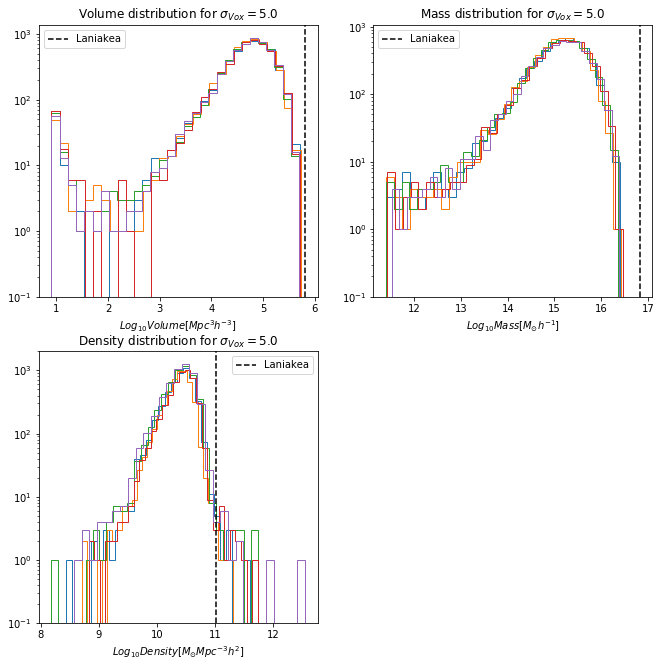

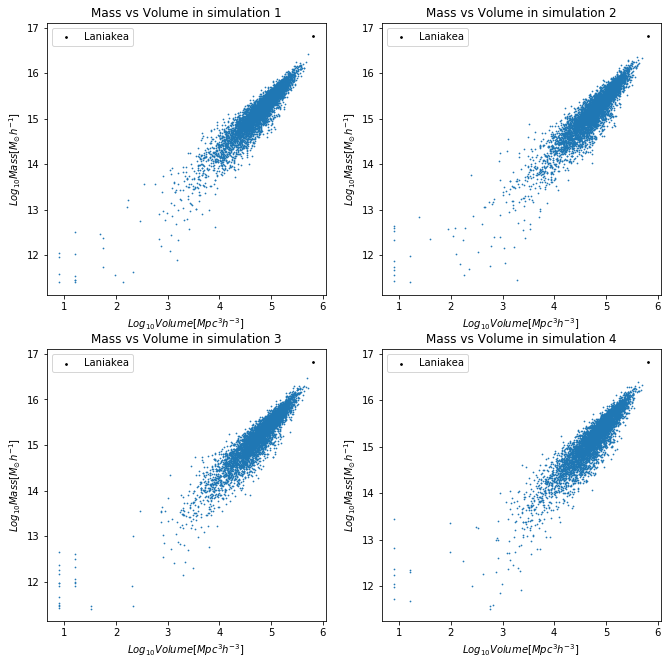

In [37]:
plt.figure(figsize = (11,11))

plt.subplot(2,2,1)
plt.axvline(np.log10(645034.5514),linestyle = '--', color = 'black', label = 'Laniakea')

for i in archivos:
    plt.hist(np.log10(volumenes[i]),log=True,bins=30, histtype = 'step')
plt.title('Volume distribution for $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$')
plt.legend()


plt.subplot(2,2,2)
plt.axvline(np.log10(0.67E17),linestyle = '--', color = 'black', label = 'Laniakea')
for i in archivos:
    plt.hist(np.log10(masas_hist[i]),log=True,bins=30,histtype = 'step')
plt.title('Mass distribution for $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Mass[M_{\odot}h^{-1}]$')
plt.legend()


plt.subplot(2,2,3)
plt.axvline(np.log10(0.67E17/645034.5514),linestyle = '--', clip_on = True, color = 'black', label = 'Laniakea')
for i in archivos:
    plt.hist(np.log10(densidades[i]),log=True,bins=30,histtype = 'step')
    plt.title('Density distribution for $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Density[M_{\odot}Mpc^{-3}h^{2}]$')
plt.legend()

plt.savefig('mass_vol_hist_agrup.png')

plt.figure(figsize = (11,11))

for i in archivos[1:]:
    plt.subplot(2,2,i)
    plt.scatter(np.log10(645034.5514),np.log10(0.67E17),c = 'black', marker = 'o',label = 'Laniakea', s= 3)
    plt.scatter(np.log10(volumenes2[i][masas2[i]!=0]), np.log10(masas_hist[i]),s=0.5)
    plt.title('Mass vs Volume in simulation {}'.format(i))
    plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$')
    plt.ylabel('$Log_{10}Mass[M_{\odot}h^{-1}]$')
    plt.legend()
plt.savefig('mass_vol.png')